In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#constants
tf=0.24*2*pi
xif=2.0
xii=1.0
MaxReach=3.0
points_x=2001
points_t=501
x=linspace(-MaxReach/sqrt(xif),MaxReach/sqrt(xif),points_x) #debe tener un numero impar de elemntos para que sirva NInteg
t=linspace(0,tf,points_t)
dx=(MaxReach/sqrt(xif)-(-MaxReach/sqrt(xif)))/(points_x*1.0)
dt=tf/points_t


print(dt/dx**2)

669.537731288


In [4]:
#functions

##boundary condditions for the states
def psi(x):
    return (pi**(-1.0/4.0))*exp(-(x**2)/2.0)
def psiI(x):
    return (xii**(1.0/4.0))*psi(sqrt(xii)*x)

def psiF(x):
    return (xif**(1.0/4.0))*psi(sqrt(xif)*x)
    #return x*psiI(x)/sqrt(2)

##interpolating function
def eta(t):
    return ((t**3.0)/(tf**3.0))*(1 + 3.0*(1 - (t/tf)) + 6.0*(1 - (t/tf))**2.0)

##Time dependent Density
def rho(x,t):
    rho0=(1 - eta(t))*psiI(x) + eta(t)*psiF(x) 
    Z=trapz(rho0**2)*dx
    return rho0/sqrt(Z)

def kt(t):
    return (1 - eta(t))*xii + eta(t)*xif 

def VT(x,t):
    return 0.5*kt(t)*x**2
##energy terms change if the wave functions are not gaussian 
def phi(t):
        return (t/tf)*(1 - (t/tf))*((0.5*xif + 0.5*xii)*t - 0.5*xii*tf)
    
def VI(x):
    return 0.5*(xii**2)*x**2

def VF(x):
    return 0.5*(xif**2)*x**2

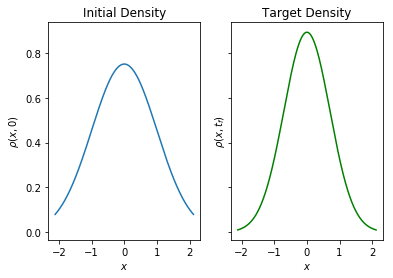

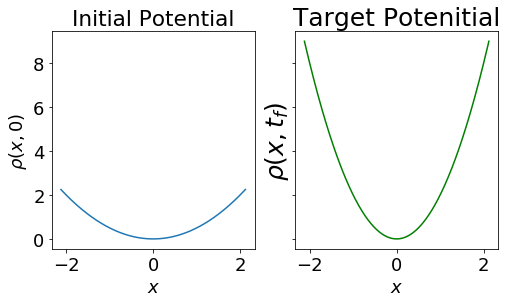

In [5]:
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x,sqrt(psiI(x)**2))
ax1.set_title('Initial Density')
ax1.set_ylabel(r'$\rho (x,0)$')
ax1.set_xlabel(r'$x$')
ax2.plot(x,sqrt(psiF(x)**2),c='g')
ax2.set_title('Target Density')
ax2.set_ylabel(r'$\rho (x,t_{f})$')
ax2.set_xlabel(r'$x$')

show()
matplotlib.rcParams.update({'font.size': 18})
pylab.rcParams['figure.figsize'] = (8, 4)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x,VI(x))
ax1.set_title('Initial Potential')
ax1.set_ylabel(r'$\rho (x,0)$')
ax1.set_xlabel(r'$x$')
ax2.plot(x,VF(x),c='g')
ax2.set_title('Target Potenitial',size=25)
ax2.set_ylabel(r'$\rho (x,t_{f})$',size=25)
ax2.set_xlabel(r'$x$')

show()

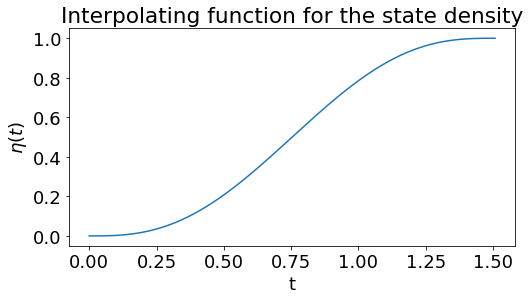

In [6]:
#interpolating function
title("Interpolating function for the state density")
ylabel(r"$\eta(t)$")
xlabel("t")
plot(t,eta(t))
show()



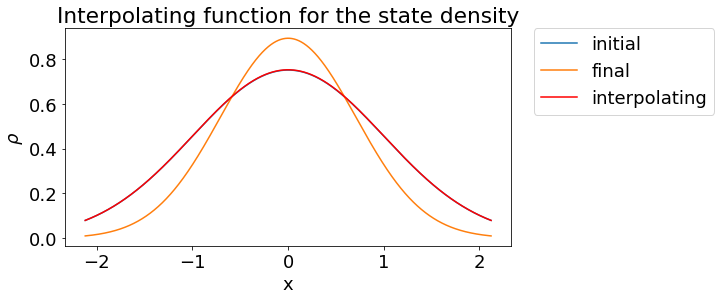

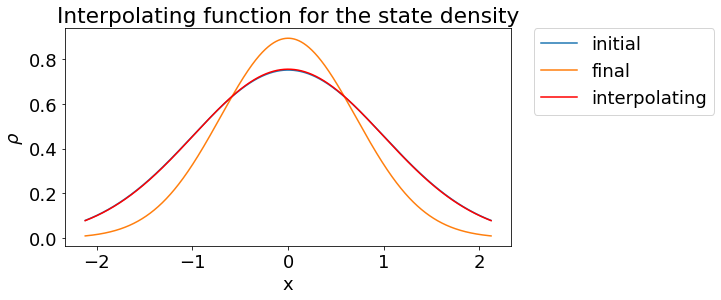

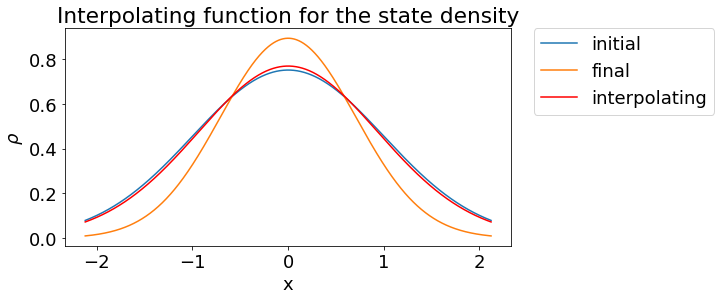

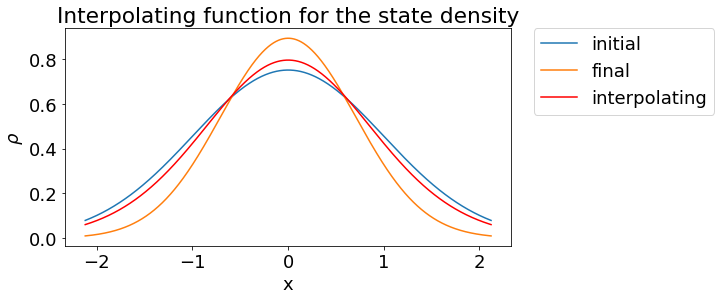

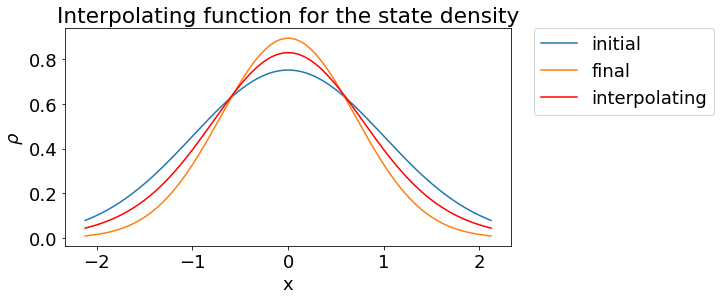

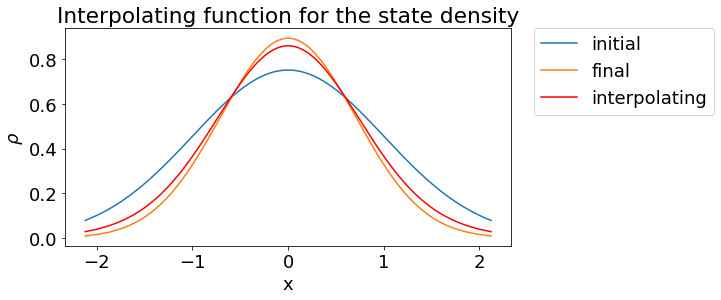

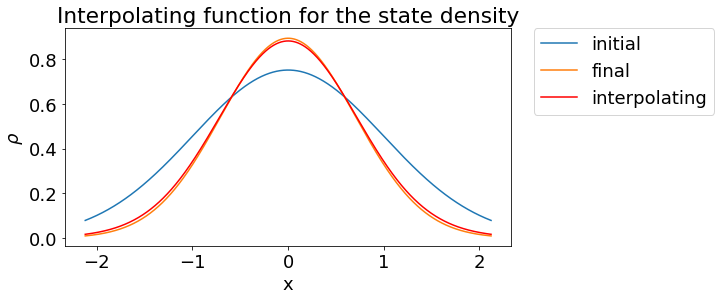

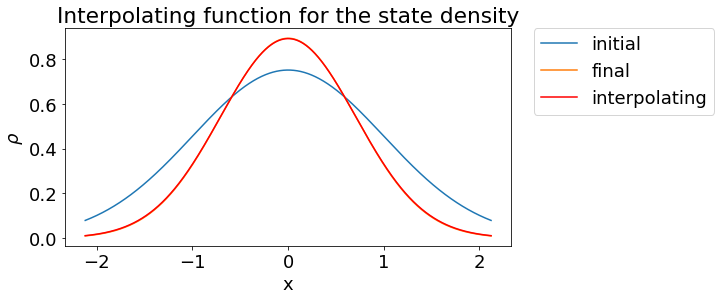

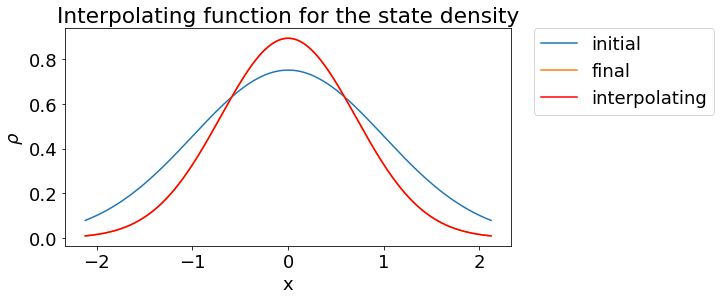

In [7]:
#interpolating function
slices=9
for i in range(0,slices):
    title("Interpolating function for the state density")
    ylabel(r"$\rho$")
    xlabel("x")
    plot(x,psiI(x),label="initial")
    plot(x,psiF(x),label="final")
    plot(x,rho(x,i*tf/float(slices-1)),label="interpolating",c='r')
    legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    show()




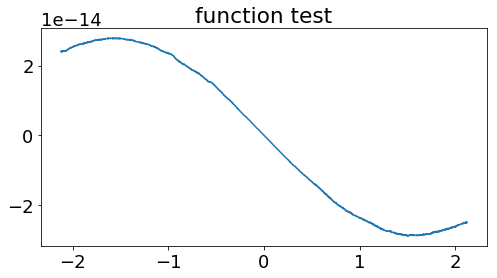

In [8]:
from scipy.interpolate import UnivariateSpline
#numerical definite integral
def Ninteg0(x,func,x0,xf,dx):
    init=argmin((x-x0)**2)

    finit=zeros(size(xf))
    for i in range(0,size(xf)):
        finit[i]=argmin((x-xf[i])**2)
    finit=finit.astype(int)
    arginit=where(finit==init)[0][0]

    finitl=finit[0:arginit+1]
    finith=finit[arginit:]
    
    intfunc=zeros(size(xf))
    #for i in range(size(finitl)):
    intfunc[0]=-trapz(func[init::-1])*dx #for some weird reason when reading the array backwards I cant use indices to read the full array backwards starting at one index
    for i in finitl:
        intfunc[i+1]=-trapz(func[init:i:-1])*dx #to include i
    for i in finith:
        intfunc[i]=trapz(func[init:i+1])*dx  #to include i
 
    return intfunc
   
    
def Ninteg(x,func,x0,xf,dx):
    spl = UnivariateSpline(x,func, k=3, s=0)
    derivativas=spl.derivative()
    intfunc=zeros(size(xf))
    for i in range(size(xf)):
        intfunc[i]=spl.integral(0, xf[i])
 
    return intfunc
title("function test")

plot(x,Ninteg(x,cos(x),0,x,dx)-sin(x))




In [9]:

def Nderivat01(func,di):
 
    return gradient(func,di)

def Nderivat20(func,di):
    driv=zeros(size(func))
    diffcent=-diff(diff(func)[::-1])[::-1]
    driv[1:-1]=diffcent
    driv[0]=diffcent[0]
    driv[-1]=diffcent[-1]
    return driv/(di**2)


def Nderivat(func,x):
    spl = UnivariateSpline(x,func, k=3, s=0)
    derivativas=spl.derivative()
    return derivativas(x)

def Nderivat2(func,x):
    Nderivat(func,x)
    return  Nderivat( Nderivat(func,x),x)
size(Nderivat(psiI(x),x))

2001

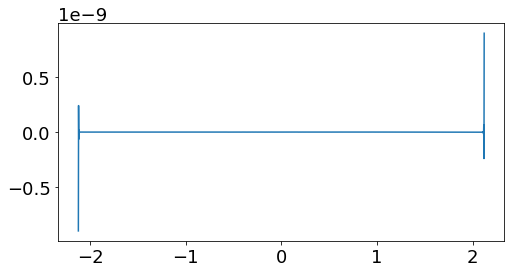

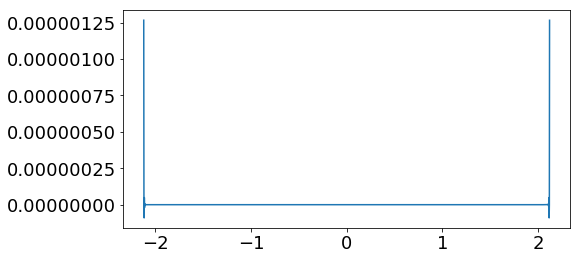

In [10]:
#title("function test, differentiating the initial wavefunction")
plot(x,Nderivat(cos(x),x)+sin(x))
show()
plot(x,Nderivat2(cos(x),x)+cos(x))
show()




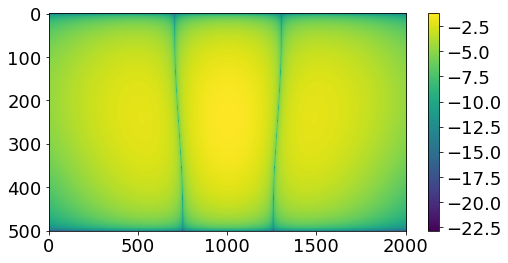

/opt/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log


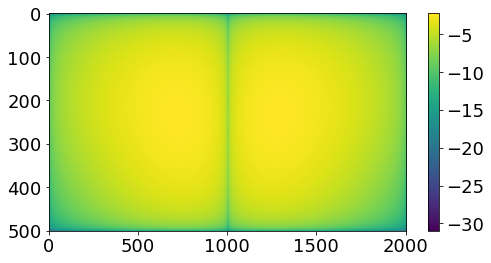

In [11]:
##now we're going to calculate the hydrodinamic velocity
rhogrid=array([rho(x,tau) for tau in t] )



Temp=[]
for element in rhogrid.T:
    Temp.append(Nderivat(element**2,t))
    
imshow(log(abs(array(Temp))).T, interpolation='nearest', aspect='auto')
plt.colorbar()
show()

Temp21=[]
for element2 in array(Temp).T:
    Temp21.append(Ninteg(x,element2,0,x,dx))
imshow(log(abs(array(Temp21))), interpolation='nearest', aspect='auto')
plt.colorbar()
show()

'''
Temp=[]
for element in rhogrid:
    Temp.append(Ninteg(x,element**2,0,x,dx))

imshow(log(abs(array(Temp))), interpolation='nearest', aspect='auto')
plt.colorbar()
show()

Temp21=[]
for element2 in array(Temp).T:
    Temp21.append(Nderivat(element2,t))
    
imshow(log(abs(array(Temp21))), interpolation='nearest', aspect='auto')
plt.colorbar()
show()

'''


up=array(Temp21)

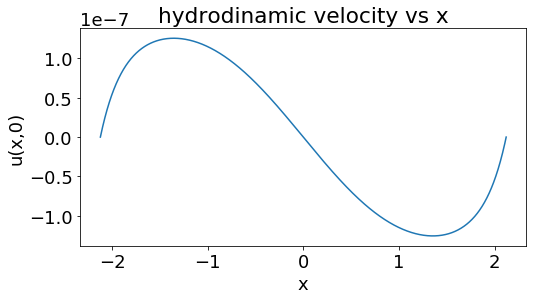

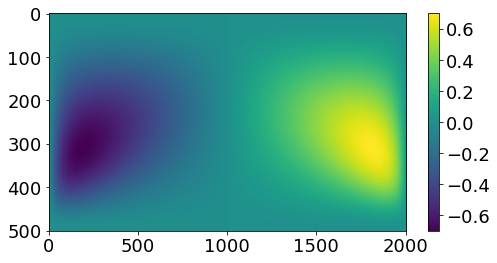

In [12]:
rhosq=rhogrid**2
#rhosq[where(rhosq<10**-9)]=0.0
#up[where(abs(up)<10**-9)]=0.0
u=up/rhosq
#u[isnan(u)]=0.0
#u[isinf(u)]=0.0
#plot(x,array(Temp).T[0,:])
#plot(x,Ninteg(x,Temp2[199],0,x,dx))
title("hydrodinamic velocity vs x")
ylabel("u(x,0)")
xlabel("x")
plot(x,u[0,:])
plt.show()

plt.imshow(u, interpolation='nearest', aspect='auto')
plt.colorbar()



In [13]:

## first term
'''
Temp3=[]
for element3 in u:
    Temp3.append(Ninteg(x,element3,0,x,dx))
Temp4=[]
for element4 in array(Temp3).T:
    Temp4.append(Nderivat(element4,t))
first=array(Temp4).T
print(shape(Temp4))
'''
Temp3=[]
for element3 in u.T:
    Temp3.append(Nderivat(element3,t))
Temp4=[]
for element4 in array(Temp3).T:
    Temp4.append(Ninteg(x,element4,0,x,dx))
first=array(Temp4)
print(shape(Temp4))


## second term
Temp5=[]
for element5 in rhogrid:
    Temp5.append(Nderivat2(element5,x))

second=0.5*array(Temp5)/rhogrid
## third term
third=-0.5*u**2
##fourth term
fourth=-array([Nderivat(phi(t),t) for r in x]).T



(501, 2001)


In [14]:
V=second+fourth+third+first

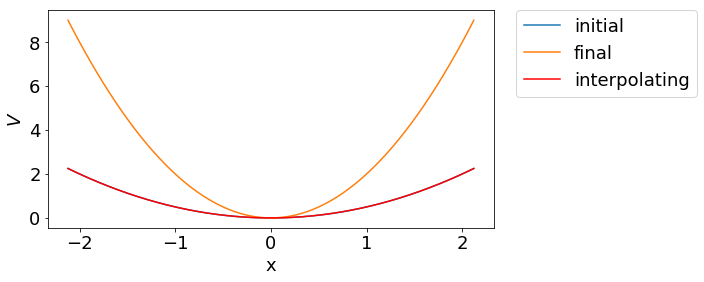

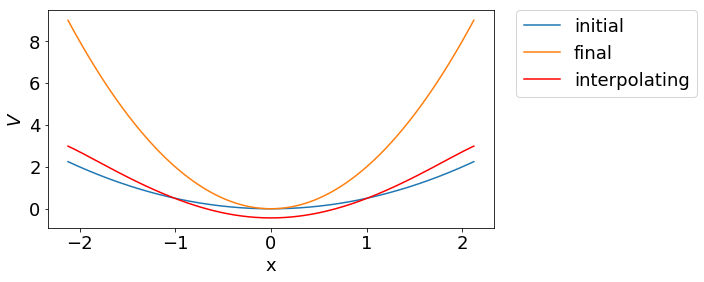

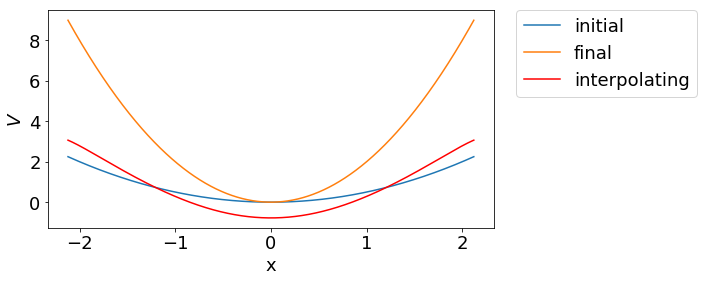

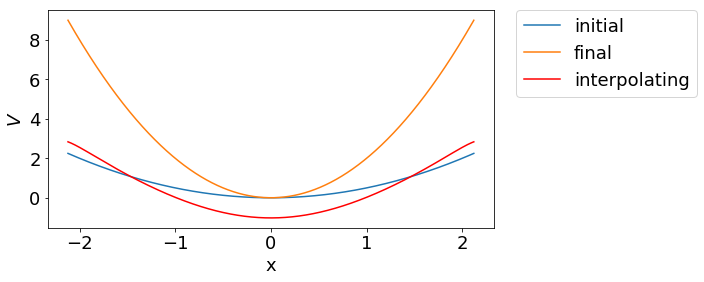

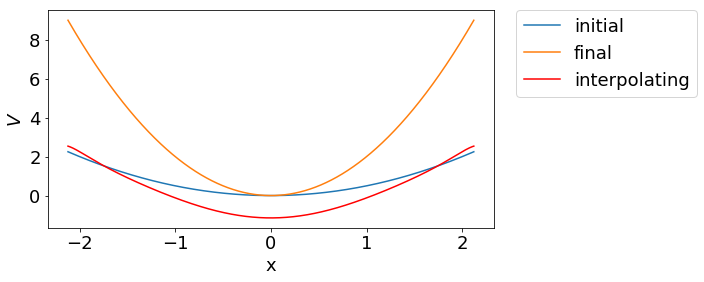

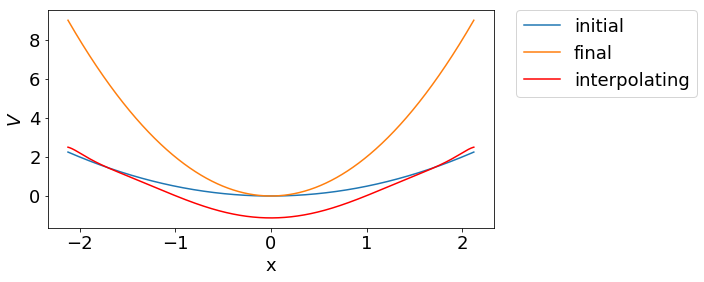

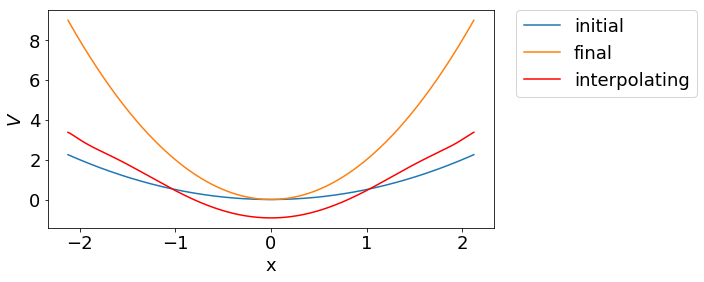

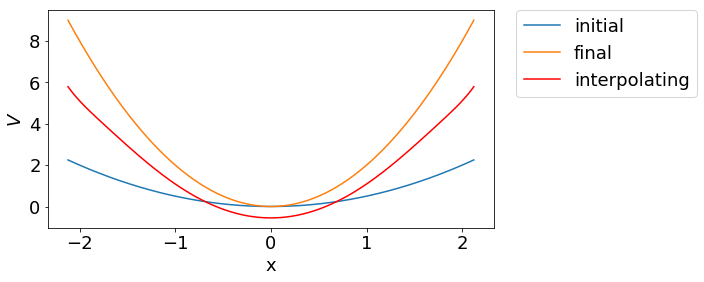

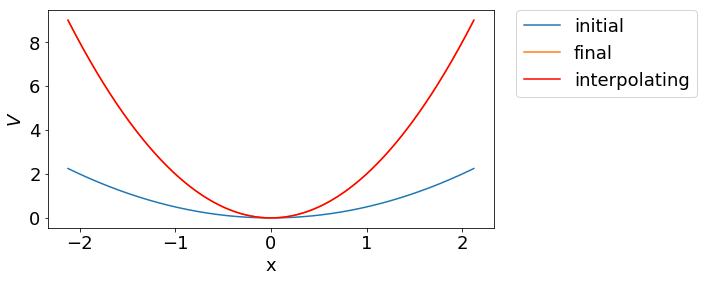

In [15]:
slices=9
for i in range(0,slices):
    #title("Interpolating function for the state density")
    ylabel(r"$V$")
    xlabel("x")
    plot(x,VI(x),label="initial")
    plot(x,VF(x),label="final")
    #ylim([-7.5,7.5])
    #xlim([-5,5])
    plot(x,V[int(i*(size(t)-1)/(slices-1)),:],label="interpolating",c='r')
    legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    show()



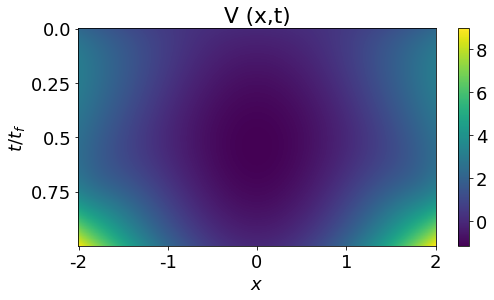

In [16]:
# Two subplots, unpack the axes array immediately
bounds=1
plt.imshow(V[:,bounds:-bounds], interpolation='nearest', aspect='auto')
plt.title('V (x,t)')
plt.ylabel(r'$t/t_{f}$')
plt.xlabel(r'$x$') 
plt.xticks(arange(0,(shape(V)[1]-2*bounds+1),(shape(V)[1]-2*bounds)/4),arange(-2,4))
plt.yticks(arange(0,shape(V)[0],shape(V)[0]/4.0),linspace(0,1,5))
plt.colorbar()

plt.show()
'''
plt.imshow(log10(abs(V)), interpolation='nearest', aspect='auto')
plt.title('log|V (x,t)|')
plt.ylabel(r'$t/t_{f}$')
plt.xlabel(r'$x$')
plt.xticks(arange(0,(shape(V)[1]+1),(shape(V)[1])/6),arange(-3,5))
plt.yticks(arange(0,shape(V)[0],shape(V)[0]/4.0),linspace(0,1,5))
plt.colorbar()
'''

plt.show()



In [17]:
Temp6=[]
for element5 in u:
    Temp6.append(Ninteg(x,element5,0,x,dx))
phase=array(Temp6)

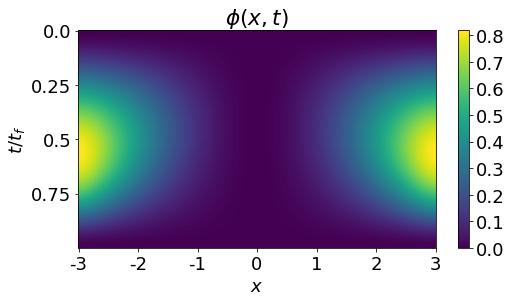

In [18]:
bounds=1
plt.imshow(phase[:,bounds:-bounds], interpolation='nearest', aspect='auto')
plt.title(r'$\phi(x,t)$')
plt.ylabel(r'$t/t_{f}$')
plt.xlabel(r'$x$')
plt.xticks(arange(0,(shape(V)[1]-2*bounds+1),(shape(V)[1]-2*bounds)/6),arange(-3,4))
plt.yticks(arange(0,shape(V)[0],shape(V)[0]/4.0),linspace(0,1,5))
plt.colorbar()

plt.show()

In [19]:
exp_energy=zeros(size(t))
for i in range(0,size(t)):
    T_exp=trapz(-rhogrid[i,:]*cos(phase[i,:])*Nderivat2(rhogrid[i,:]*cos(phase[i,:]),x)-rhogrid[i,:]*sin(phase[i,:])*Nderivat2(rhogrid[i,:]*sin(phase[i,:]),x))*dx
    V_exp=trapz(rhogrid[i,:]*rhogrid[i,:]*V[i,:])*dx
    exp_energy[i]=T_exp+V_exp


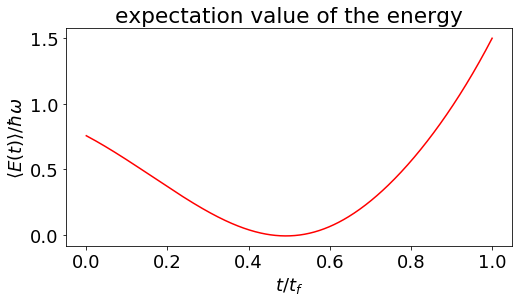

In [20]:
plt.title('expectation value of the energy')
plt.ylabel(r'$\langle E(t) \rangle / \hbar \omega$')
plt.xlabel(r'$t/t_{f}$')
plt.plot(t/tf,exp_energy,c='r')
plt.show() 

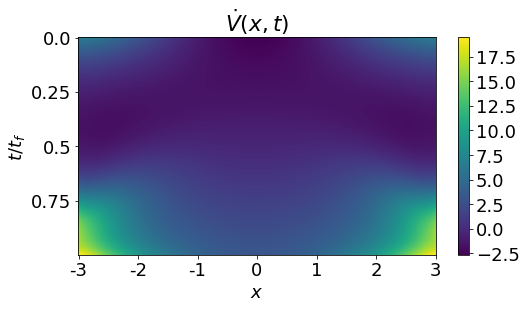

In [21]:
Temp7=[]
for element3 in V.T:
    Temp7.append(Nderivat(element3,t))
Vdot=array(Temp7).T
plt.imshow(Vdot[:,bounds:-bounds], interpolation='nearest', aspect='auto')
plt.title(r'$\dot{V}(x,t)$')
plt.ylabel(r'$t/t_{f}$')
plt.xlabel(r'$x$')
plt.xticks(arange(0,(shape(V)[1]-2*bounds+1),(shape(V)[1]-2*bounds)/6),arange(-3,4))
plt.yticks(arange(0,shape(V)[0],shape(V)[0]/4.0),linspace(0,1,5))
plt.colorbar()

In [22]:
workdot=zeros(size(t))
for i in range(0,size(t)):
    T_exp=trapz(-rhogrid[i,:]*cos(phase[i,:])*Nderivat2(rhogrid[i,:]*cos(phase[i,:]),x)-rhogrid[i,:]*sin(phase[i,:])*Nderivat2(rhogrid[i,:]*sin(phase[i,:]),x))*dx
    V_exp=trapz(rhogrid[i,:]*rhogrid[i,:]*Vdot[i,:])*dx
    workdot[i]=T_exp+V_exp


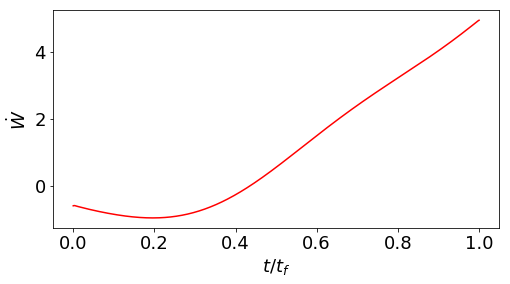

1.64697606784


In [23]:

plt.ylabel(r'$\dot{W}$')
plt.xlabel(r'$t/t_{f}$')
plt.plot(t/tf,workdot,c='r')
plt.show() 
print(trapz(workdot)*dt)

In [62]:
###initialization symmetric potentials

from scipy import linalg as la
steps=2000
hbar=1.0
m=1.0
W=10.0
#d=0.5
#cent=-0.0
d=4
cent=0
# divide by two so a well from -W to W is of input width
W=W/2.0
# create x-vector from -W to W
xvec=np.linspace(-W,W,steps)
    # get step size
h=xvec[1]-xvec[0]


In [63]:
#potential library
def window(xvec,d,cent):
    return 0.5*((np.sign(xvec+d/2.0-cent))-(np.sign(xvec-d/2.0-cent)))

def Vpike(A,xvec,d,cent):
    return A*((1-2*(xvec-cent)/d)*window(xvec,d/2,cent+d/4)+(1+2*(xvec-cent)/d)*window(xvec,d/2,cent-d/4))

def Vsq(A,xvec,d,cent):
    return A*window(xvec,d,cent)

def VJar(A1,A2,A3, xvec,cent):
    return A1*(xvec**4 - 0.5*(A2*(xvec)**2*(np.sign( (xvec-cent) )+1)+A3*(xvec)**2*(np.sign( -(xvec-cent) )+1)))

def Vharm(mw2,xvec,cent):
    return 0.5*mw2*(xvec-cent)**2

Vharm_arr=0.5*(xvec*W)**2
Vpike_arr=300*((1-2*(xvec-cent)/d)*window(xvec,d/2,cent+d/4)+(1+2*(xvec-cent)/d)*window(xvec,d/2,cent-d/4))
Vsq_arr=300.0*window(xvec,d,cent)
VJar_arr=xvec**4 - 0.5*(10*(xvec)**2*(np.sign( (xvec-cent) )+1)+10*(xvec)**2*(np.sign( -(xvec-cent) )+1))

In [64]:
##
def DiagonHam(V):
    Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)
        +np.diag(np.ones(steps-1),-1))/(float)(h**2)
    # create Hamiltonian
    Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + np.diag(V)
    valuesF=la.eigh(Hamiltonian)
    return valuesF[0],valuesF[1].T

In [65]:
#V1=VJar(1,10,10, xvec,cent)
V1=Vharm(1,xvec,cent)
E1,psis1=DiagonHam(V1)

In [66]:
#V2=VJar(1,20,20, xvec,cent)
V2=Vharm(2,xvec,cent)
E2,psis2=DiagonHam(V2)

0.49999921804


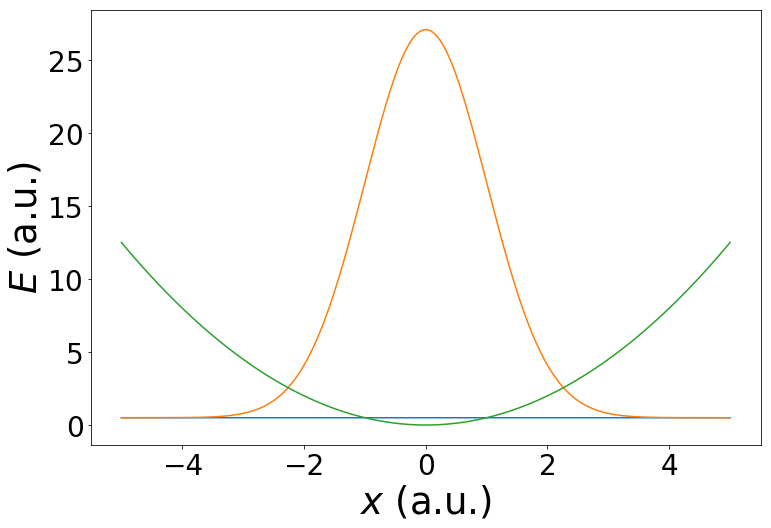

2.12131252321


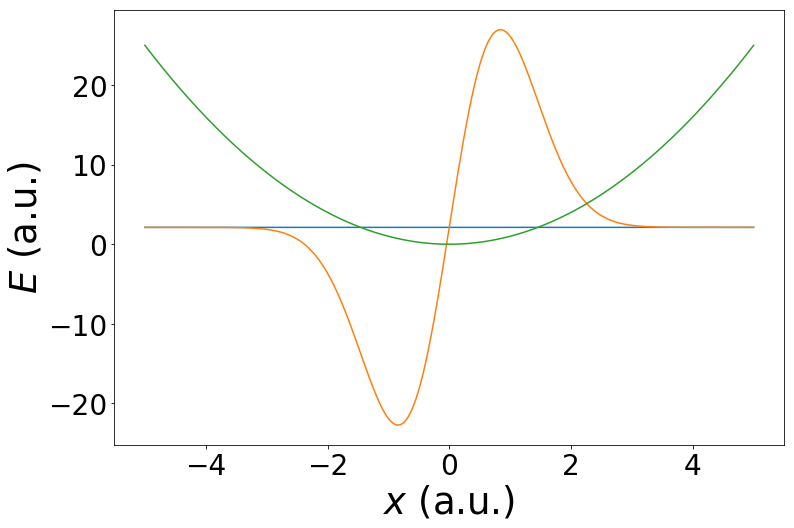

In [67]:
for i in range(0,1):
    
    plot(xvec,E1[i]*xvec/xvec)
    plot(xvec,psis1[i]/0.002+E1[i])
    

    print(E1[i])
plot(xvec,V1)
#plot(xvec,Vpike_arr)
ylabel("$E$ (a.u.)",size=37)
xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 28})
plt.show()


for i in range(1,2):
    
    plot(xvec,E2[i]*xvec/xvec)
    plot(xvec,psis2[i]/0.002+E2[i])
    

    print(E2[i])
plot(xvec,V2)
#plot(xvec,Vpike_arr)
ylabel("$E$ (a.u.)",size=37)
xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 28})

In [68]:
def Shortcut(x,psiI,psiF, E_I, E_F, eta):
    PsiI= UnivariateSpline(x,psiI, k=5, s=0)
    PsiF= UnivariateSpline(x,psiF, k=5, s=0)
    
    def rho(x,t):
        rho0=(1 - eta(t))*PsiI(x) + eta(t)*PsiF(x) 
        Z=trapz(rho0**2)*dx
        return rho0/sqrt(Z)
##energy terms change if the wave functions are not gaussian 
    def phi(t, E_I, E_F):
        return (t/tf)*(1 - (t/tf))*(( E_F + E_I)*t - E_I*tf)
    # Two subplots, unpack the axes array immediately
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.plot(x,PsiI(x))
    ax1.set_title('Initial Density')
    ax1.set_ylabel(r'$\rho (x,0)$')
    ax1.set_xlabel(r'$x$')
    ax2.plot(x,PsiF(x),c='g')
    ax2.set_title('Target Density')
    ax2.set_ylabel(r'$\rho (x,t_{f})$')
    ax2.set_xlabel(r'$x$')

    show()
    rhogrid=array([rho(x,tau) for tau in t] )

    Temp=[]
    for element in rhogrid.T:
        Temp.append(Nderivat(element**2,t))
    

    Temp21=[]
    for element2 in array(Temp).T:
        Temp21.append(Ninteg(x,element2,0,x,dx))
        
    up=array(Temp21)
    rhosq=rhogrid**2
    #rhosq[where(rhosq<10**-9)]=0.0
    #up[where(abs(up)<10**-9)]=0.0
    u=up/rhosq
    #u[isnan(u)]=0.0
    #u[isinf(u)]=0.0
    title("hydrodinamic velocity vs x")
    ylabel("u(x,0)")
    xlabel("x")
    plot(x,u[0,:])
    plt.show()

    plt.imshow(u, interpolation='nearest', aspect='auto')
    plt.colorbar()
    plt.show()
    
     ## first term

    Temp3=[]
    for element3 in u.T:
        Temp3.append(Nderivat(element3,t))
    Temp4=[]
    for element4 in array(Temp3).T:
        Temp4.append(Ninteg(x,element4,0,x,dx))
    first=array(Temp4)

    ## second term
    Temp5=[]
    for element5 in rhogrid:
        Temp5.append(Nderivat2(element5,x))

    second=0.5*array(Temp5)/rhogrid
    ## third term
    third=-0.5*u**2
    ##fourth term
    fourth=-array([Nderivat(phi(t, E_I, E_F),t) for r in x]).T

    Vres=second+fourth+first+third
    
    c=14*10**5
    Vres[where( (Vres)>c )]=c
    Vres[where( (Vres)<-c )]=-c
    slices=9
    for i in range(0,slices):
    #title("Interpolating function for the state density")
        ylabel(r"$V$")
        xlabel("x")
        ylim([-100,400])
        xlim([-0.7,0.7])
        plot(x,Vres[int(i*(size(t)-1)/(slices-1)),:],label="interpolating",c='r')
        legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
        show()



    return Vres

In [69]:
def ShortcutR(x,psiI,psiF, E_I, E_F, eta):
    PsiI= UnivariateSpline(x,psiI, k=5, s=0)
    PsiF= UnivariateSpline(x,psiF, k=5, s=0)
    
    def rho(x,t):
        rho0=(1 - eta(t))*PsiI(x) + eta(t)*PsiF(x) 
        Z=trapz(rho0**2)*dx
        return rho0/sqrt(Z)
##energy terms change if the wave functions are not gaussian 
    def phi(t, E_I, E_F):
        return (t/tf)*(1 - (t/tf))*(( E_F + E_I)*t - E_I*tf)
    # Two subplots, unpack the axes array immediately
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.plot(x,sqrt(PsiI(x)**2))
    ax1.set_title('Initial Density')
    ax1.set_ylabel(r'$\rho (x,0)$')
    ax1.set_xlabel(r'$x$')
    ax2.plot(x,sqrt(PsiF(x)**2),c='g')
    ax2.set_title('Target Density')
    ax2.set_ylabel(r'$\rho (x,t_{f})$')
    ax2.set_xlabel(r'$x$')

    show()
    rhogrid=array([rho(x,tau) for tau in t] )

    

    return  rhogrid

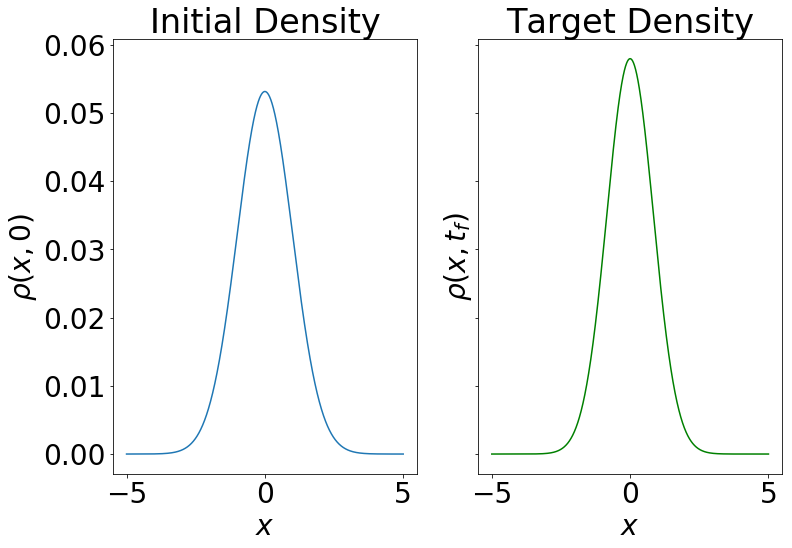

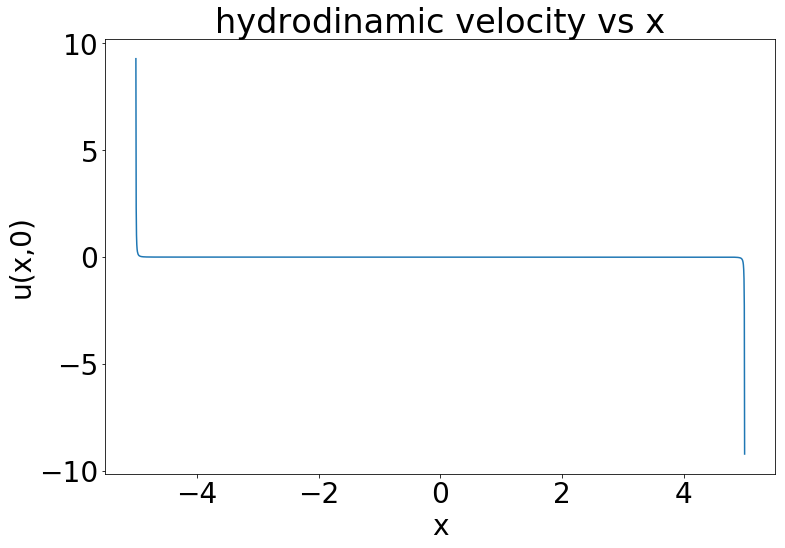

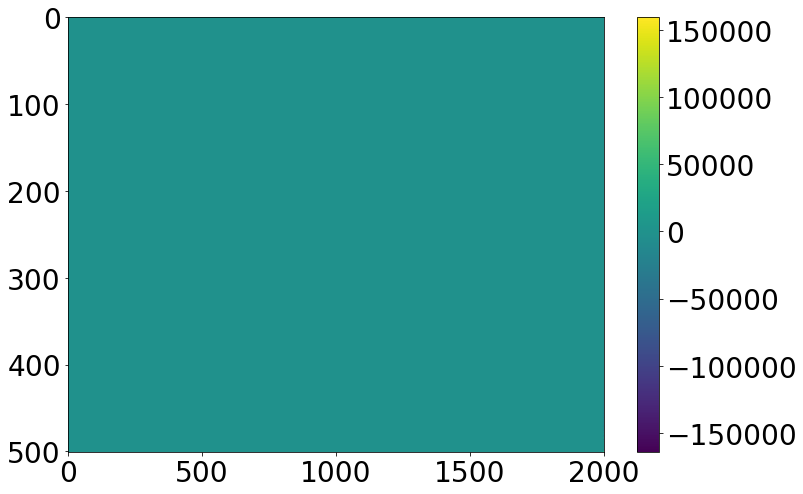

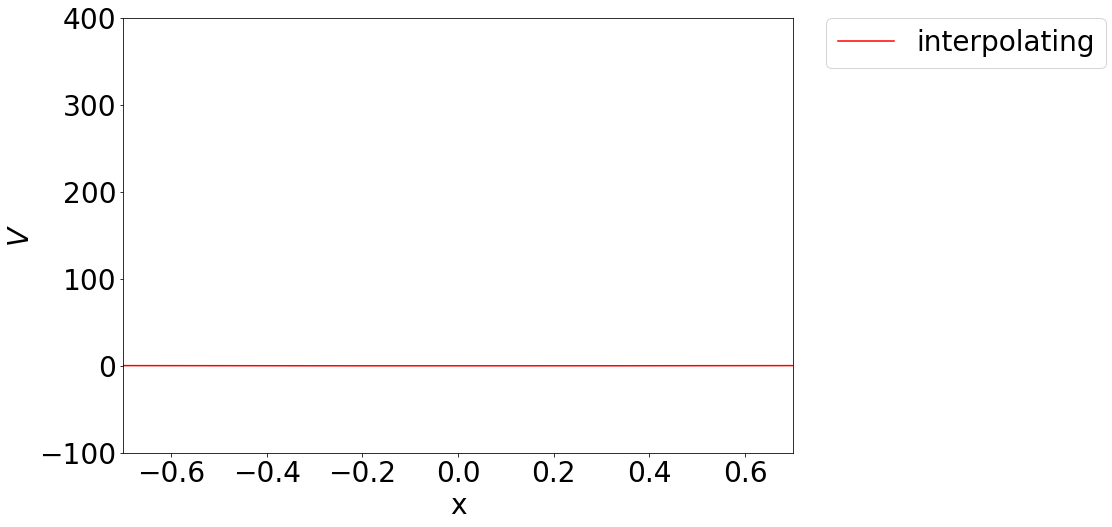

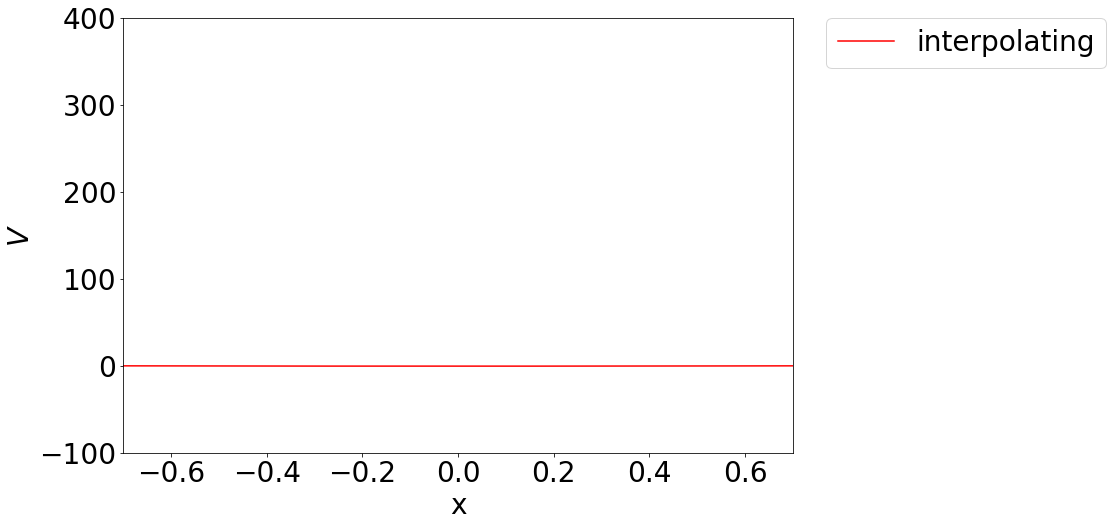

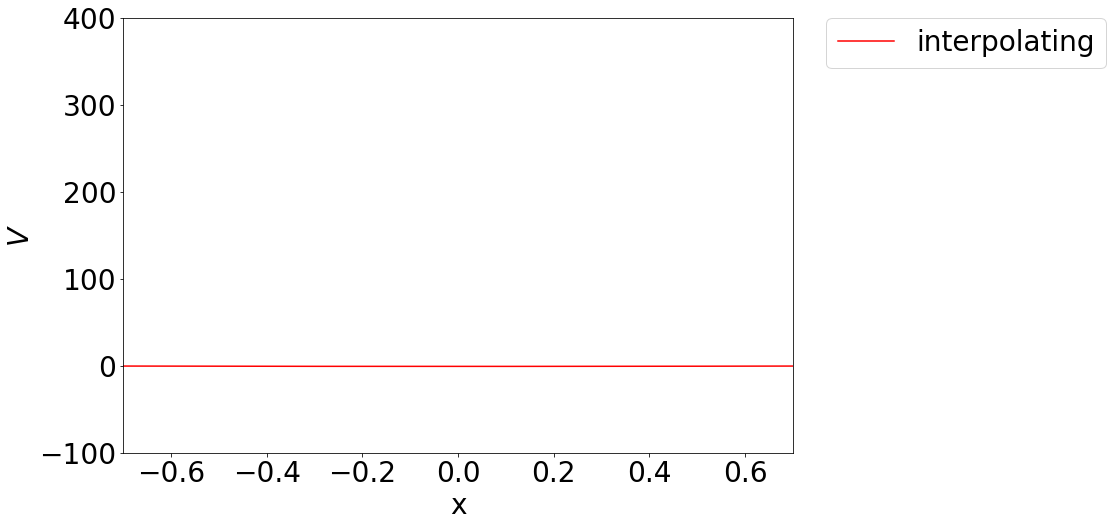

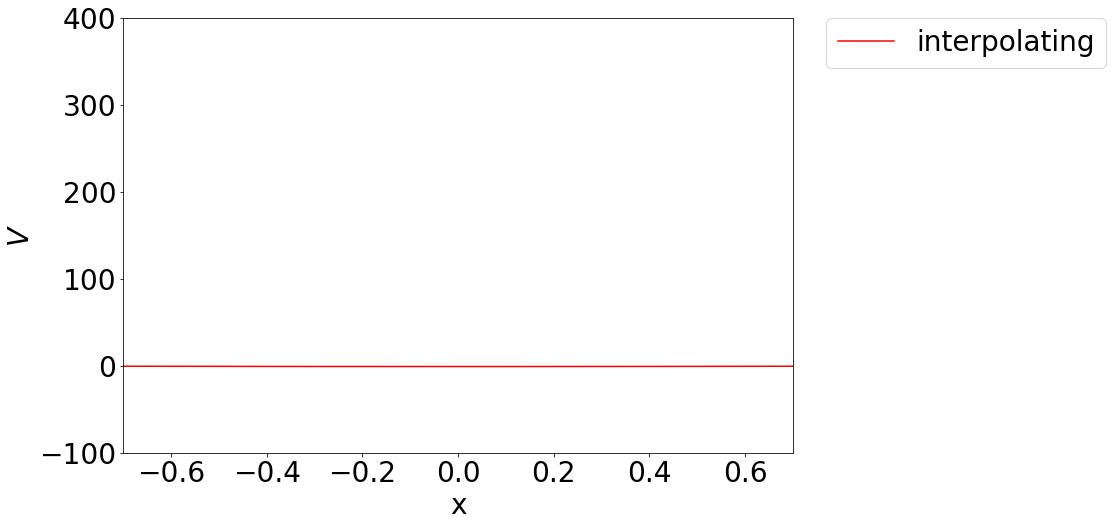

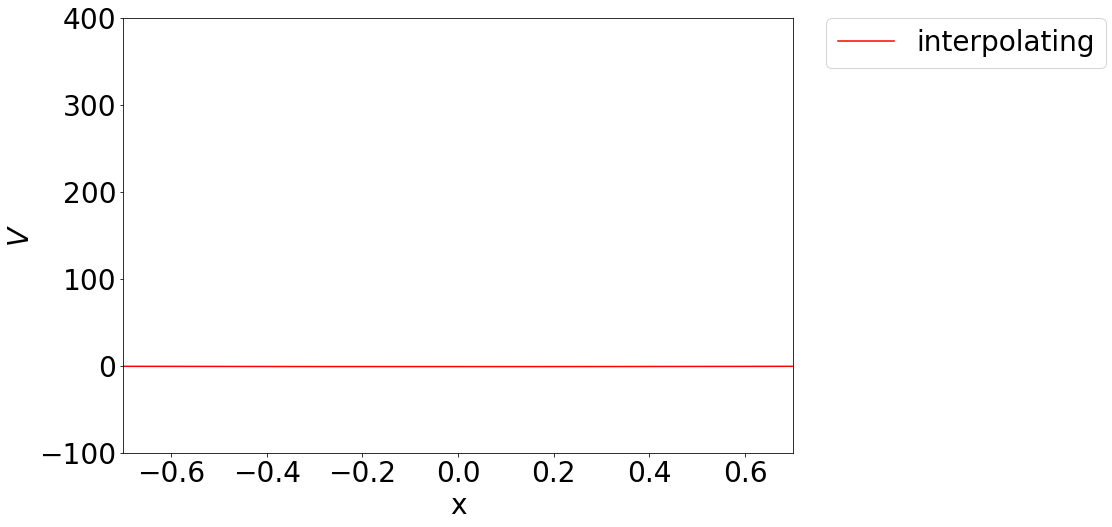

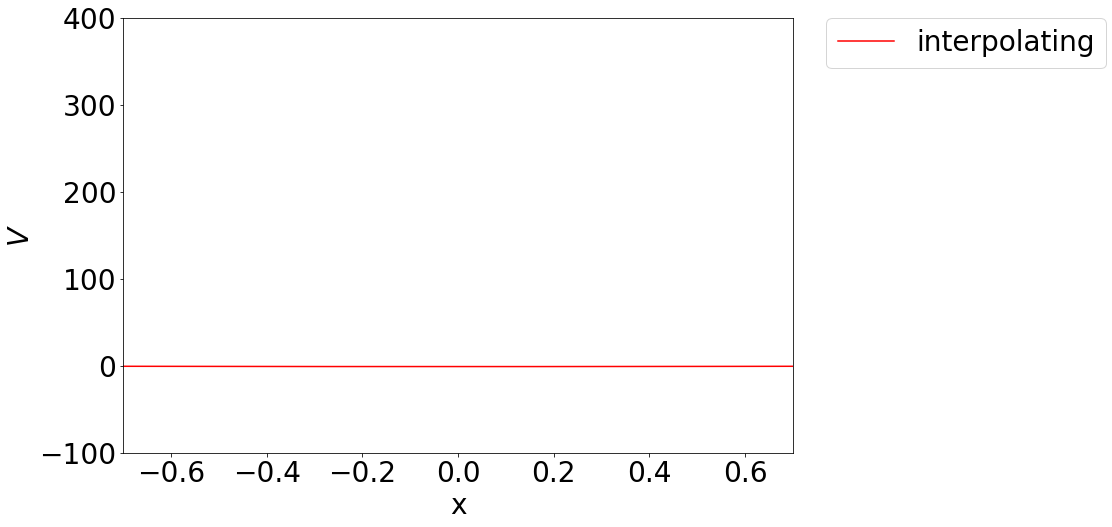

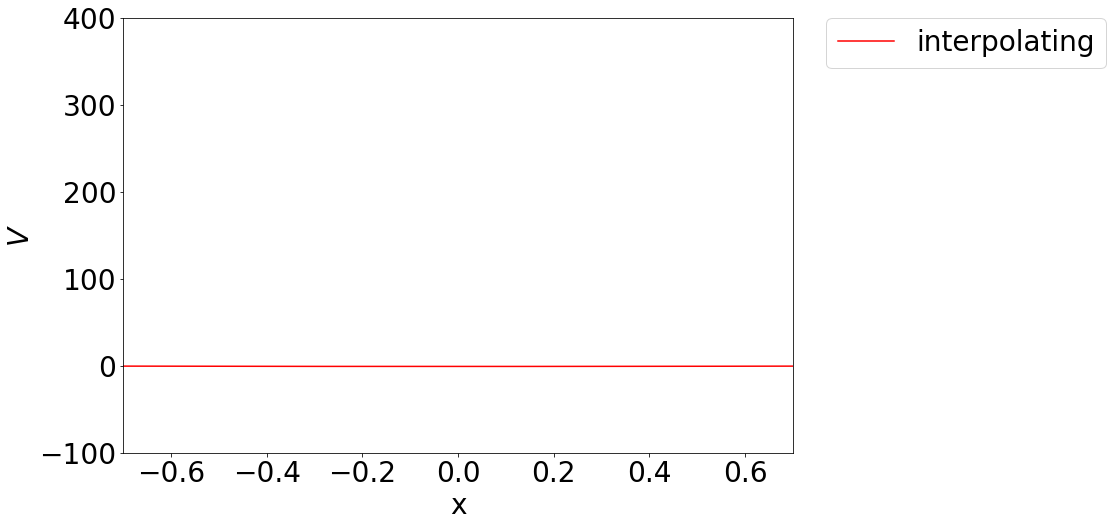

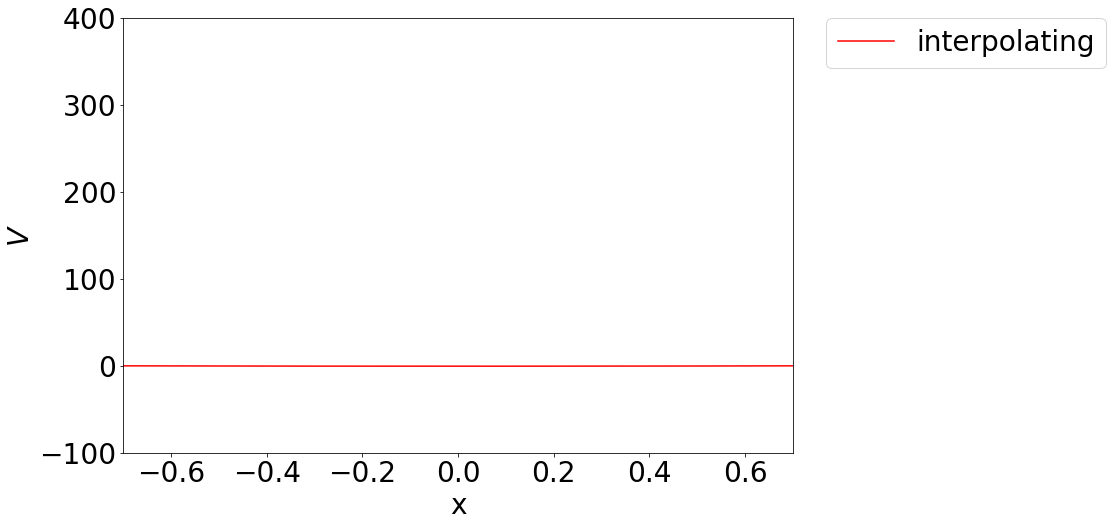

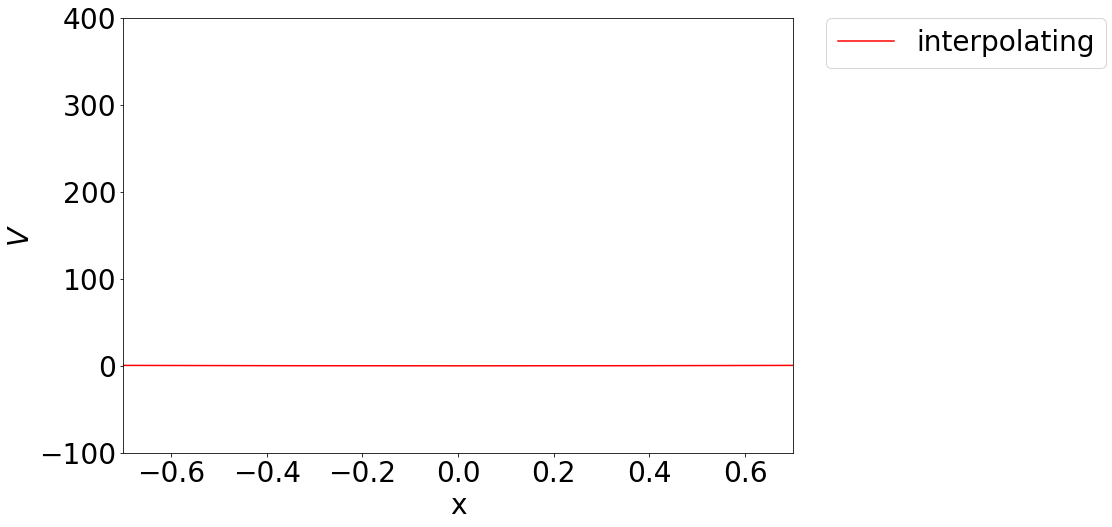

In [70]:
VR=Shortcut(xvec,psis1[0],psis2[0],E1[0],E2[0], eta)

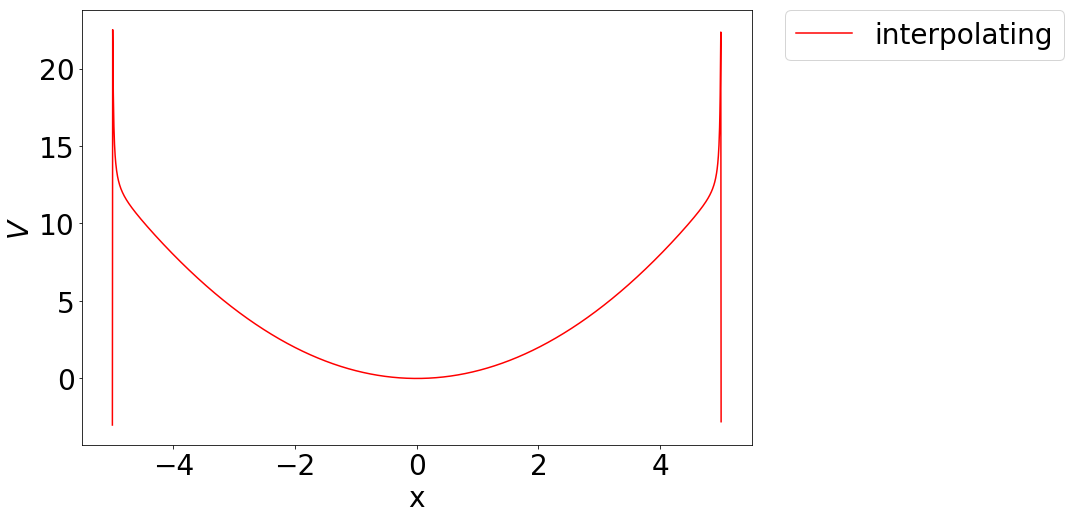

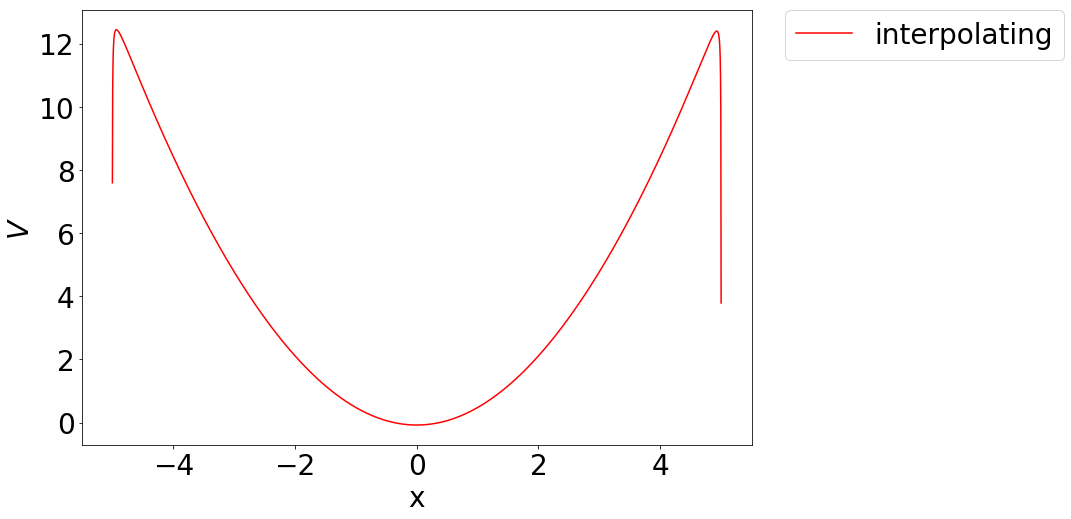

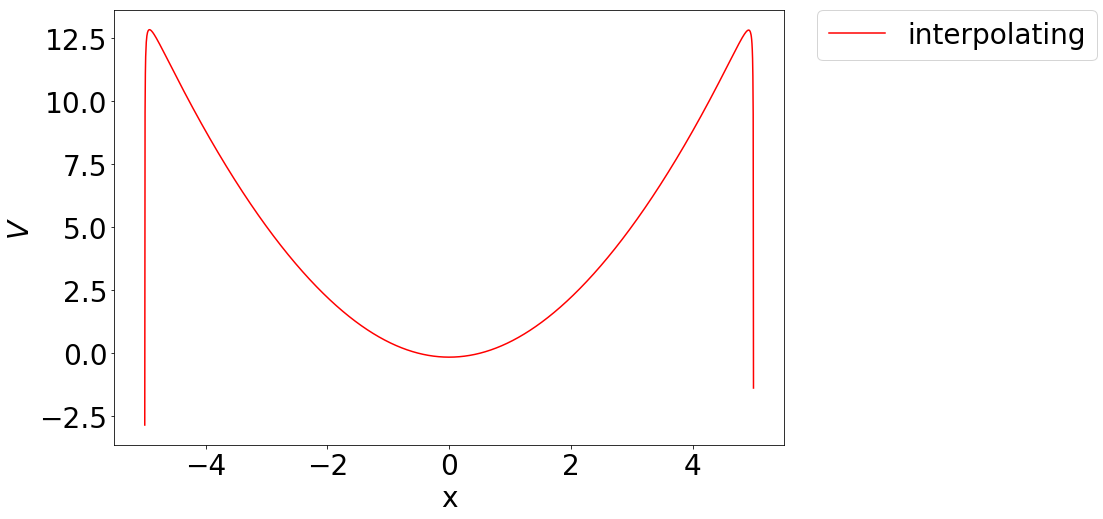

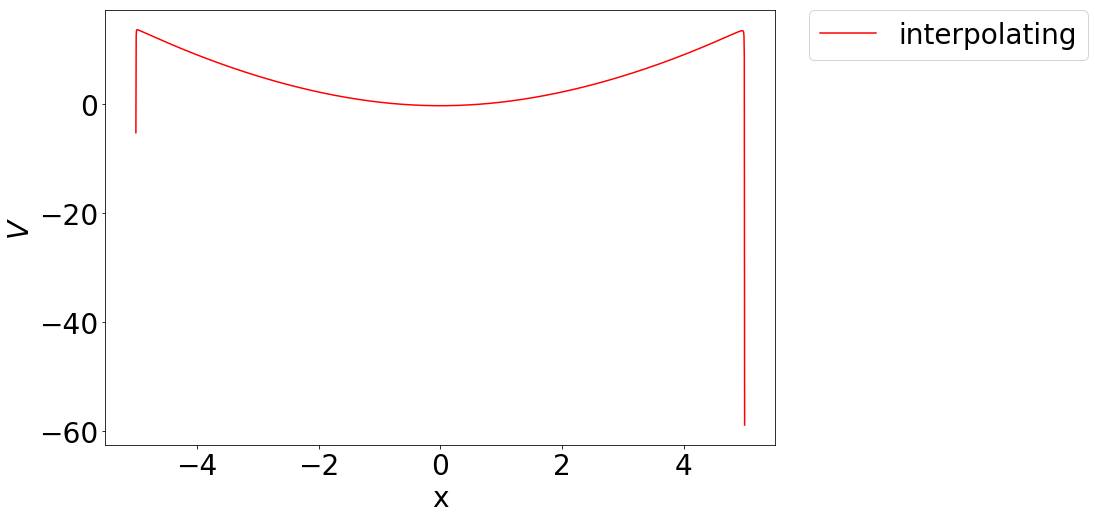

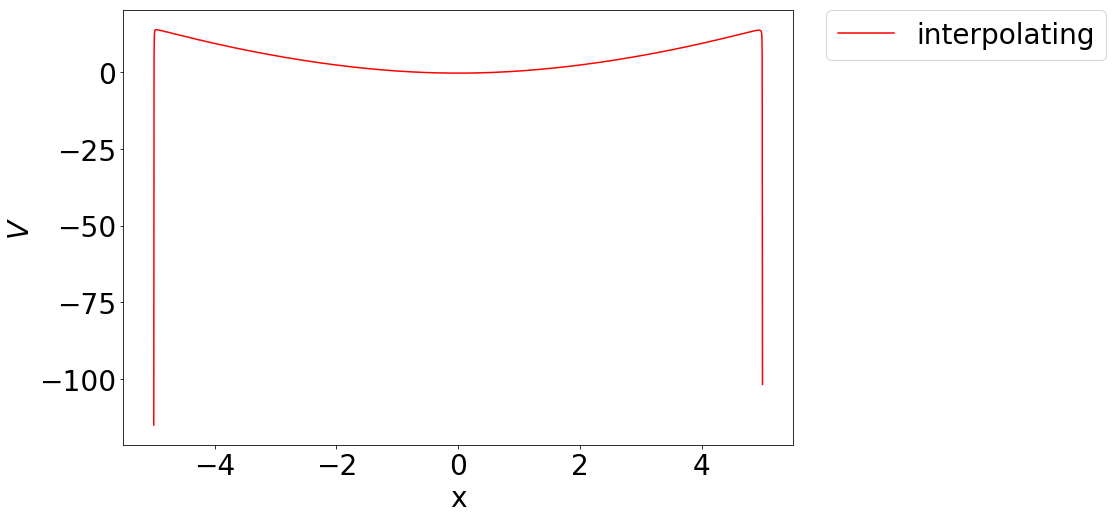

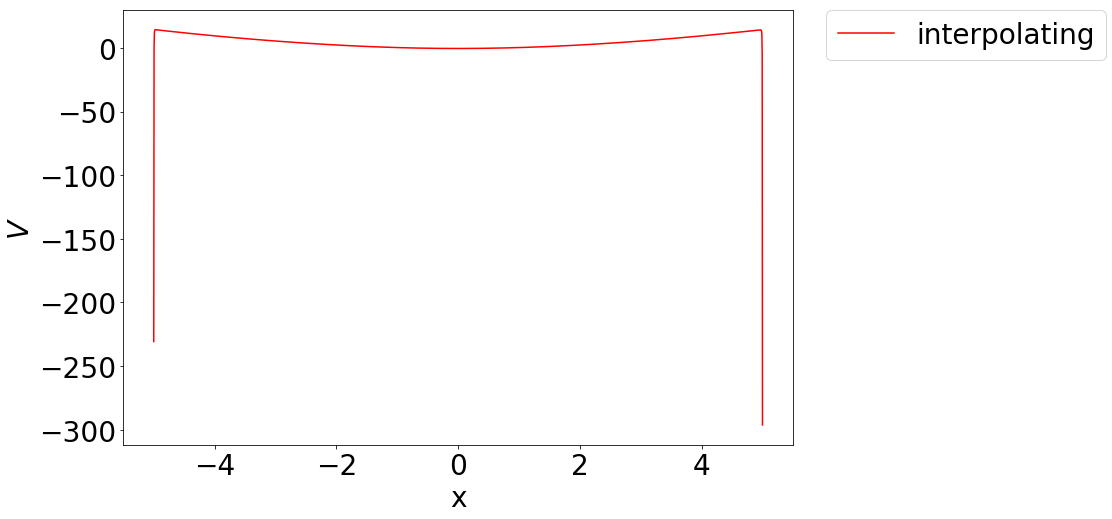

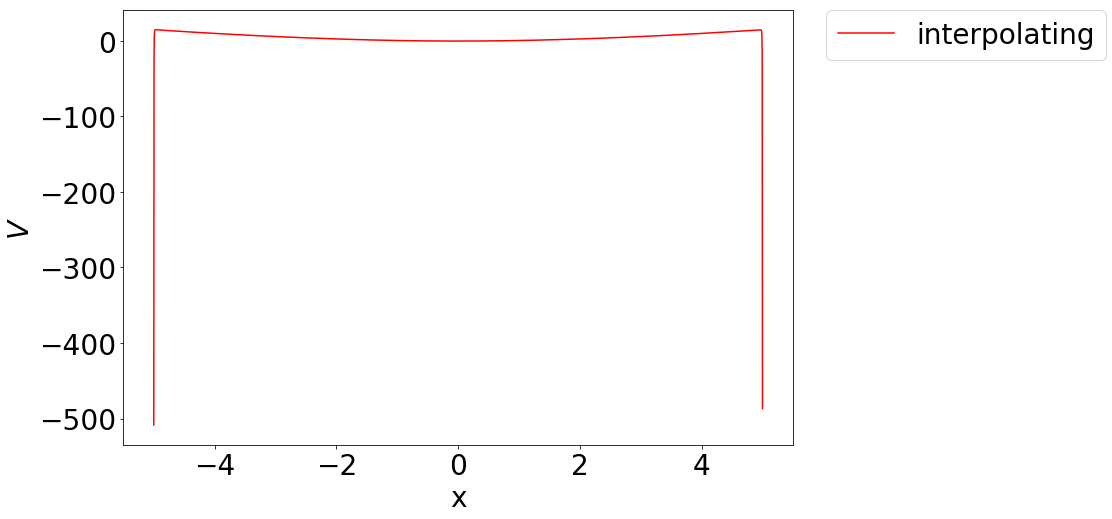

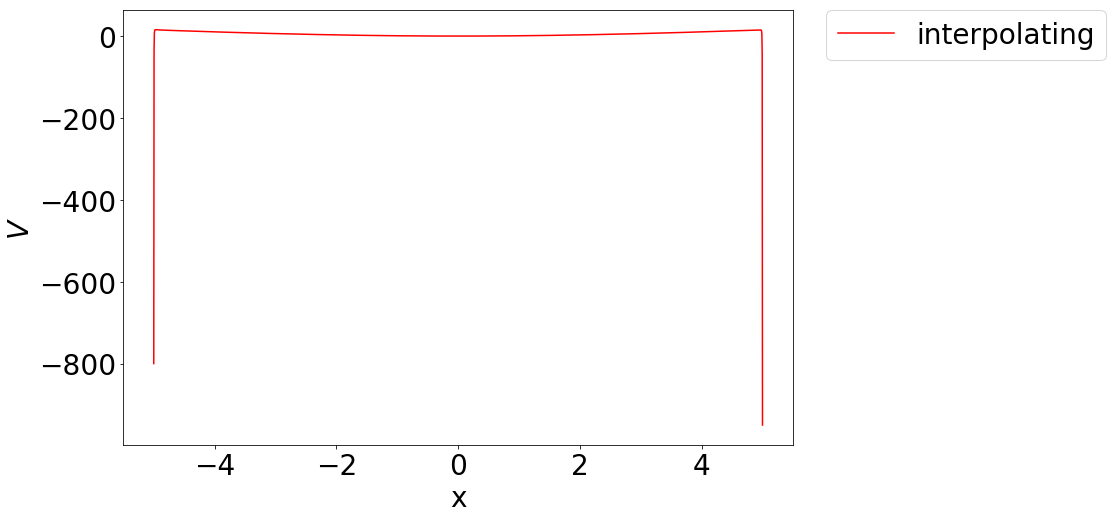

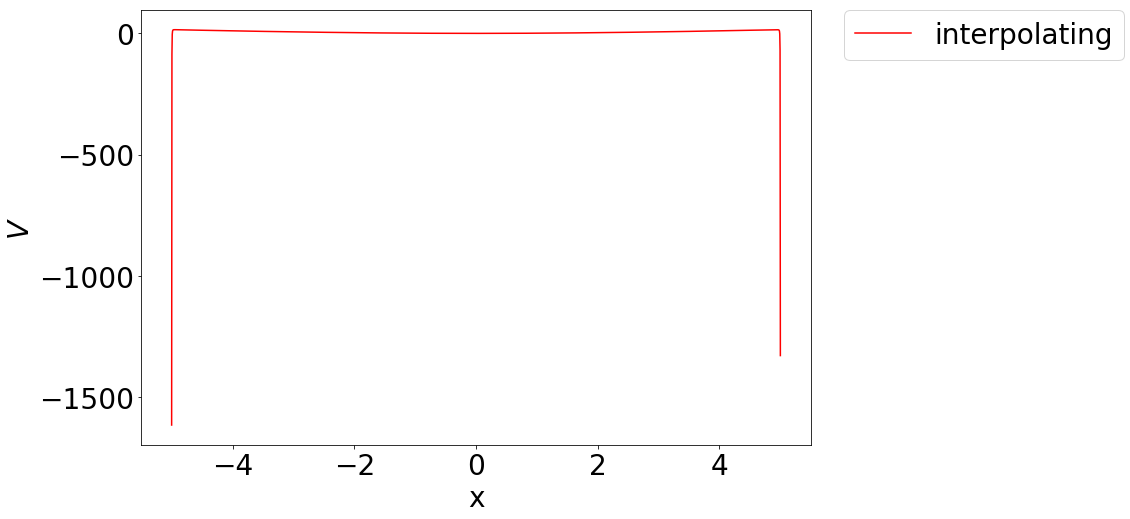

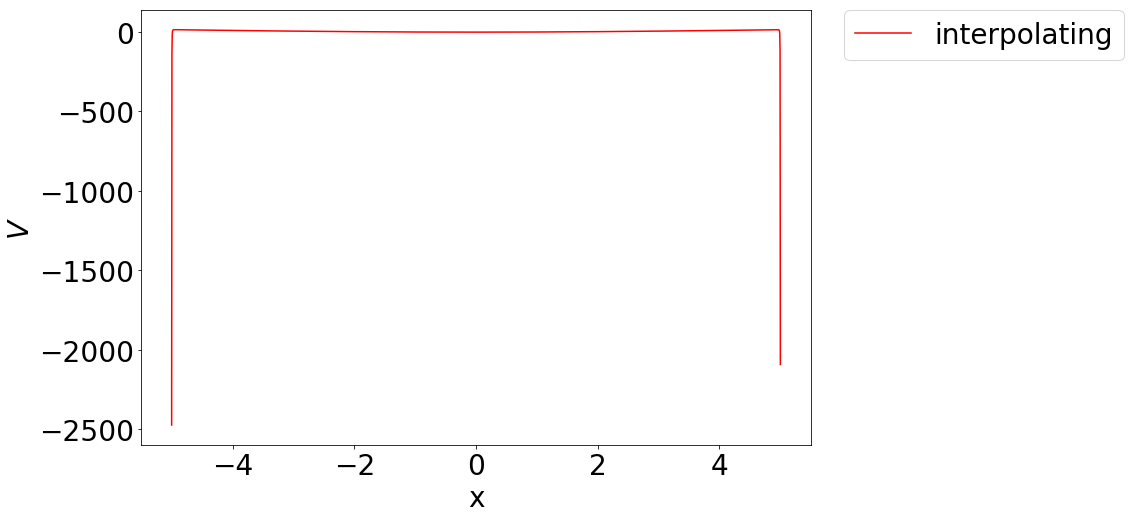

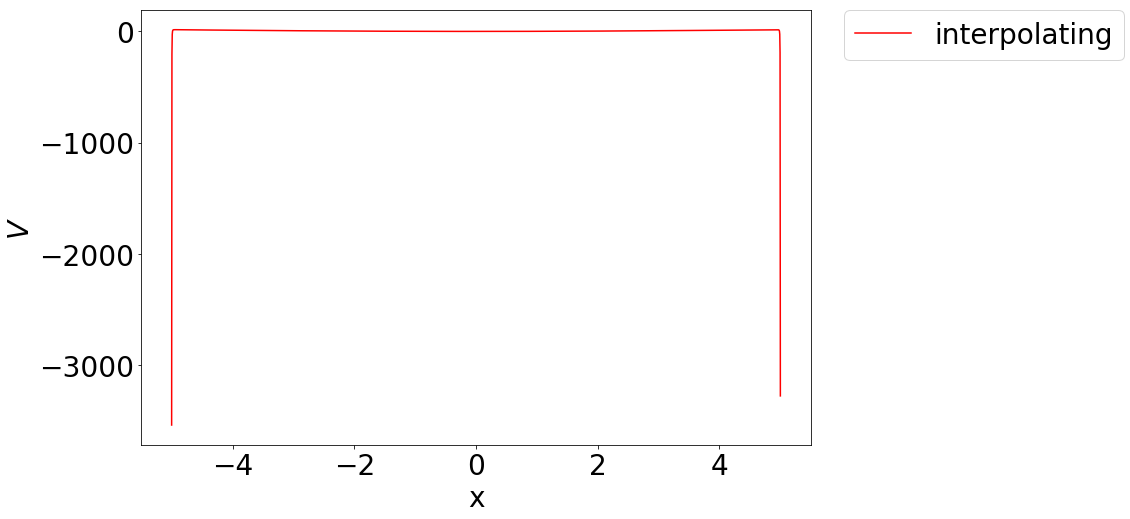

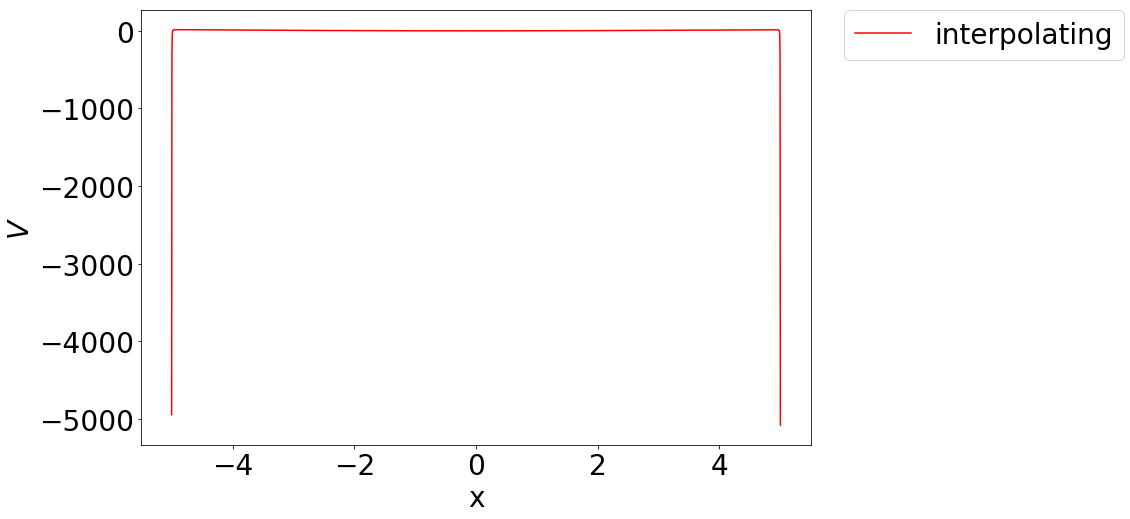

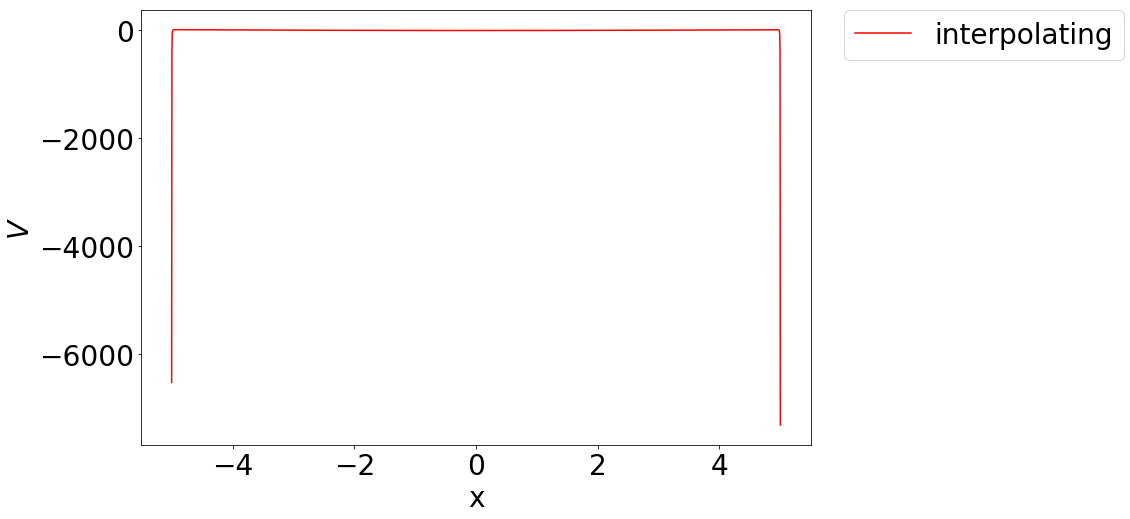

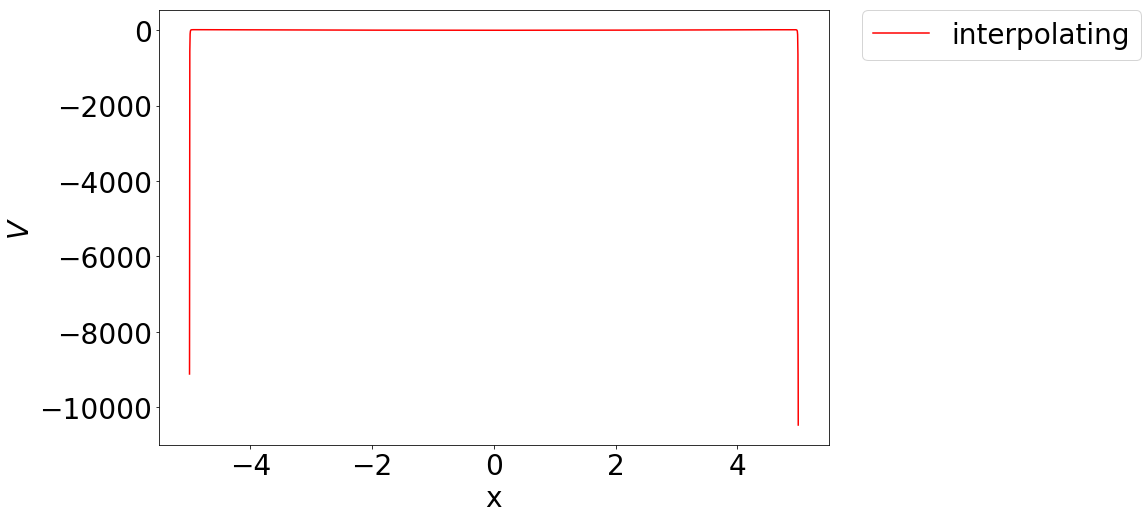

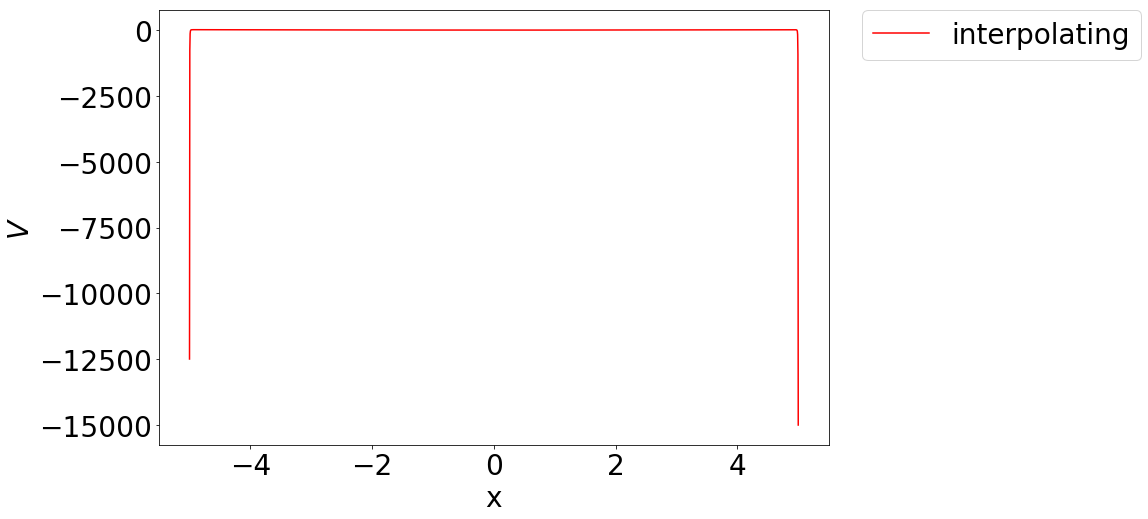

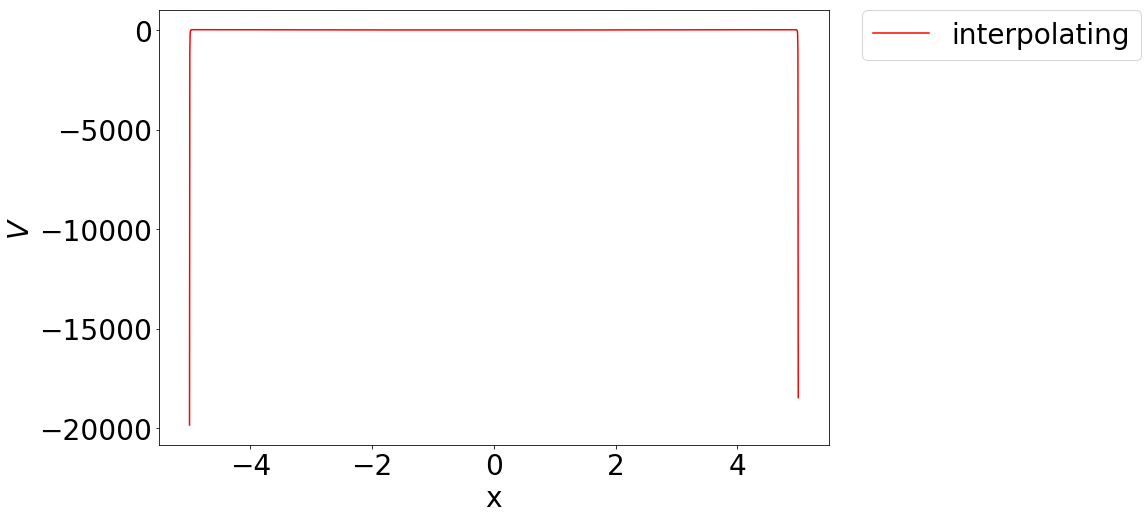

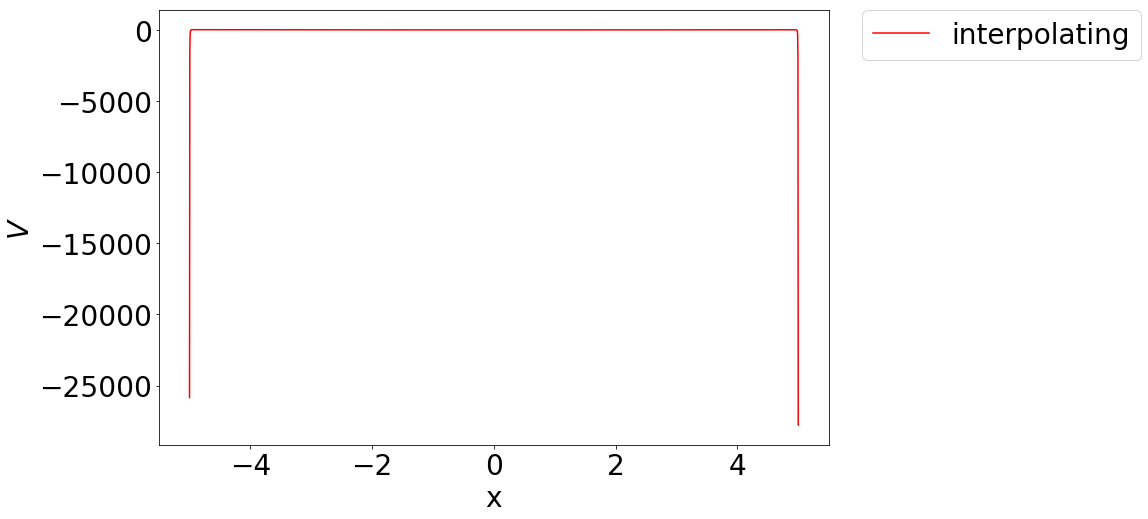

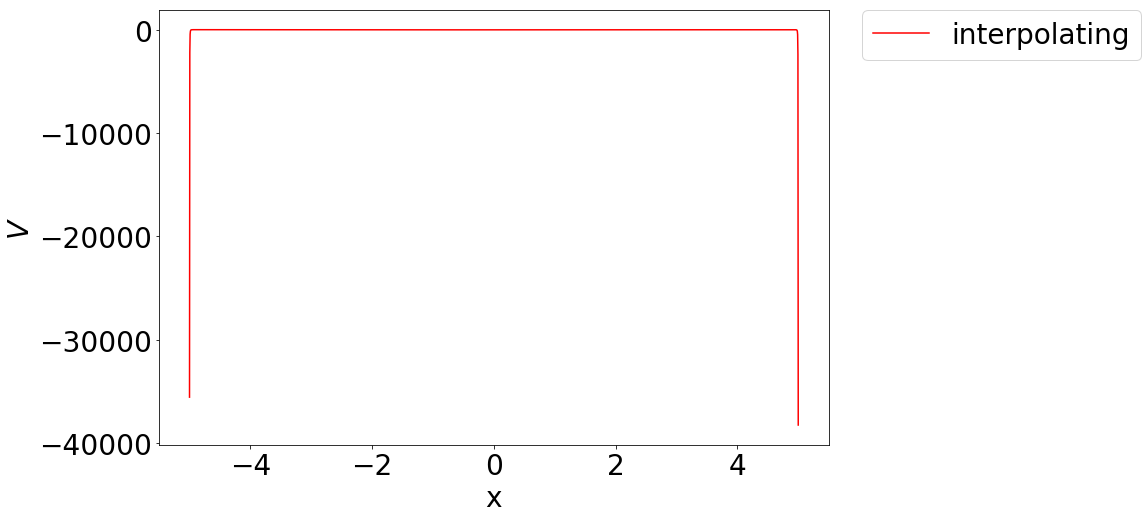

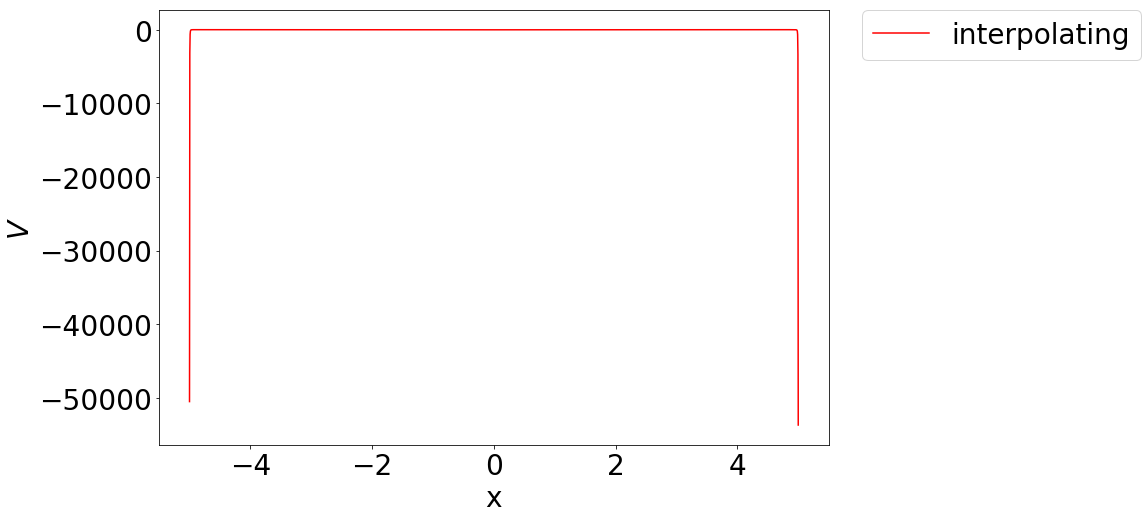

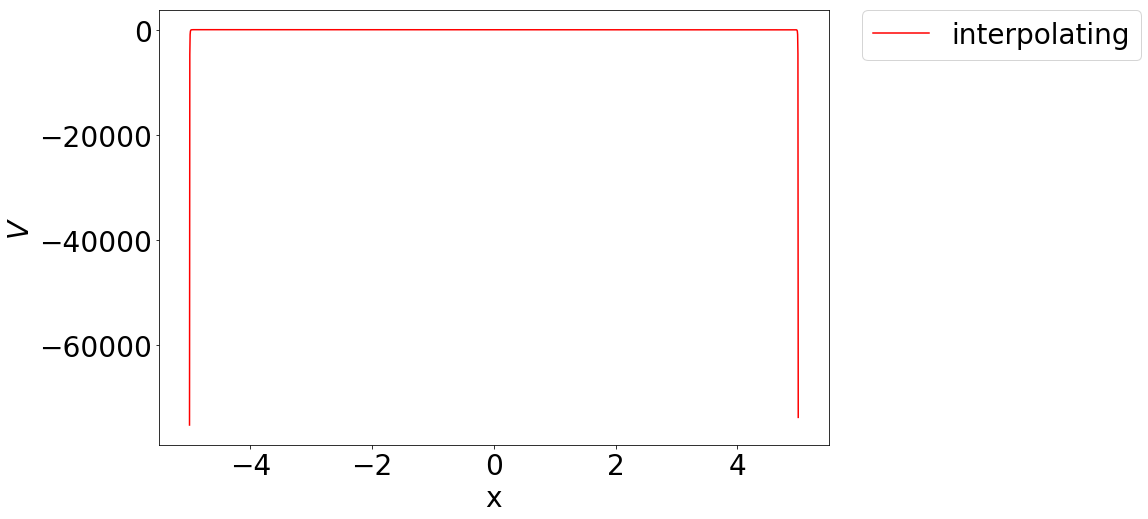

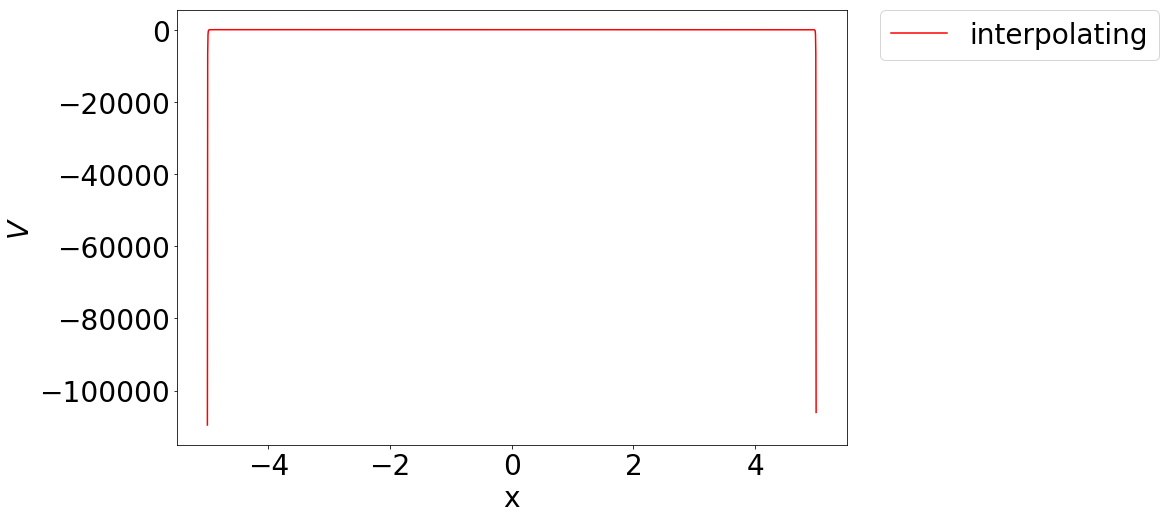

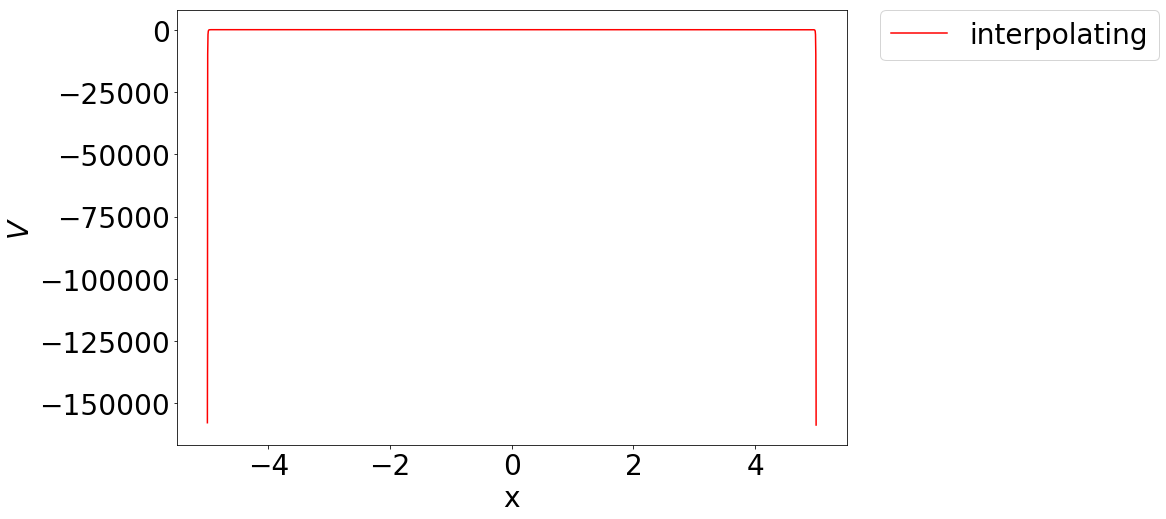

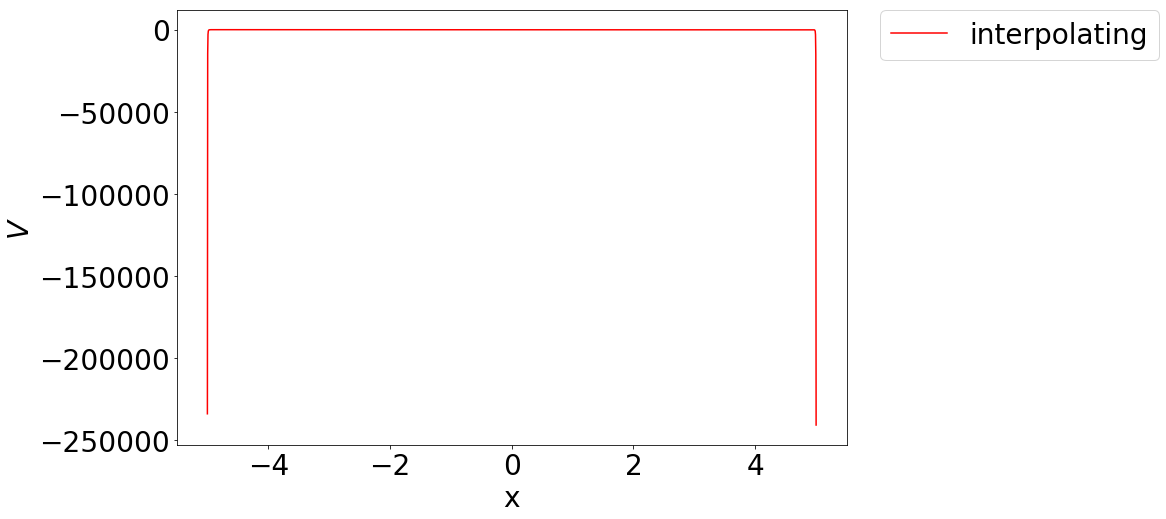

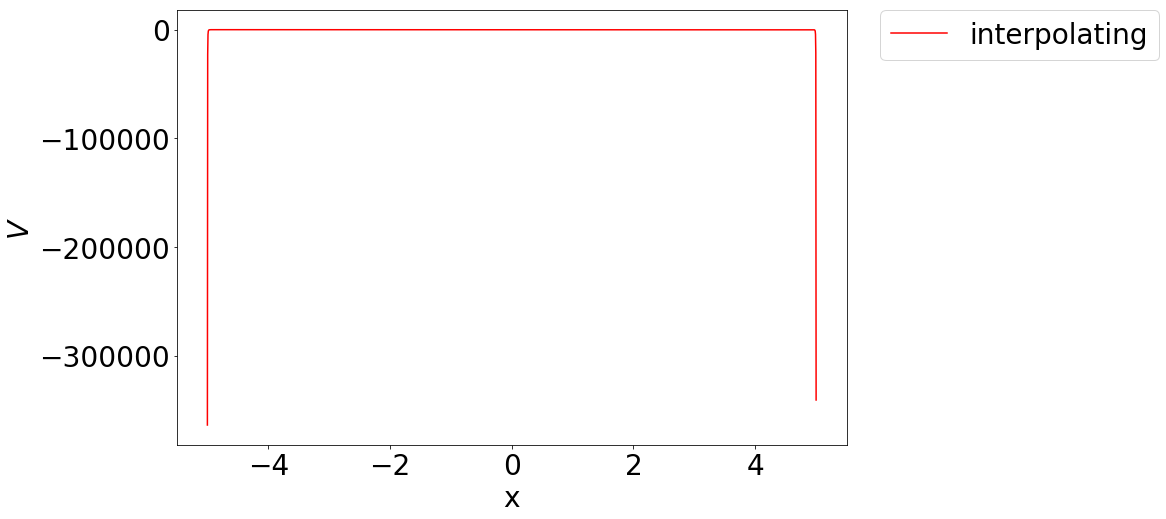

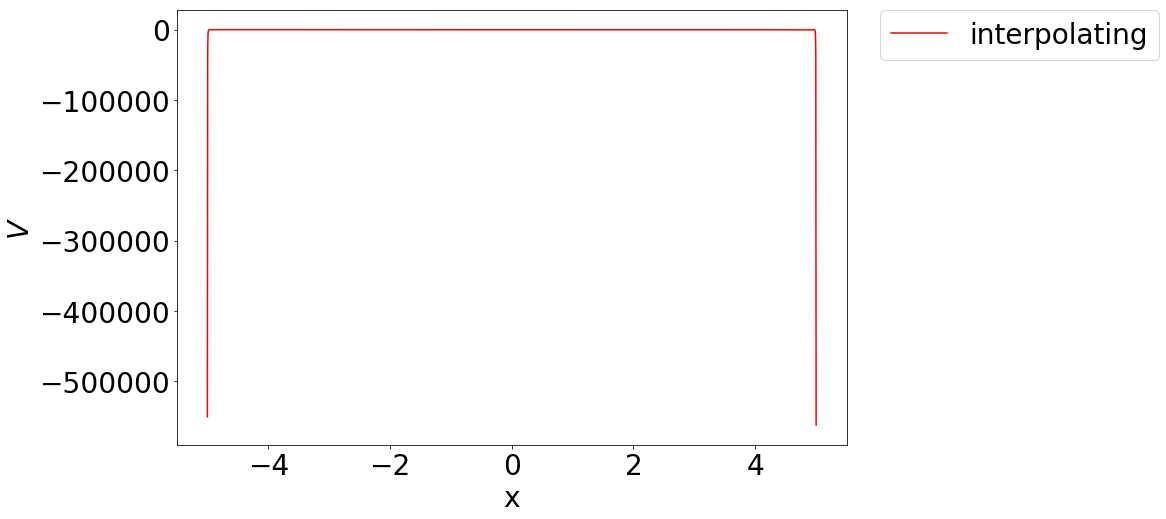

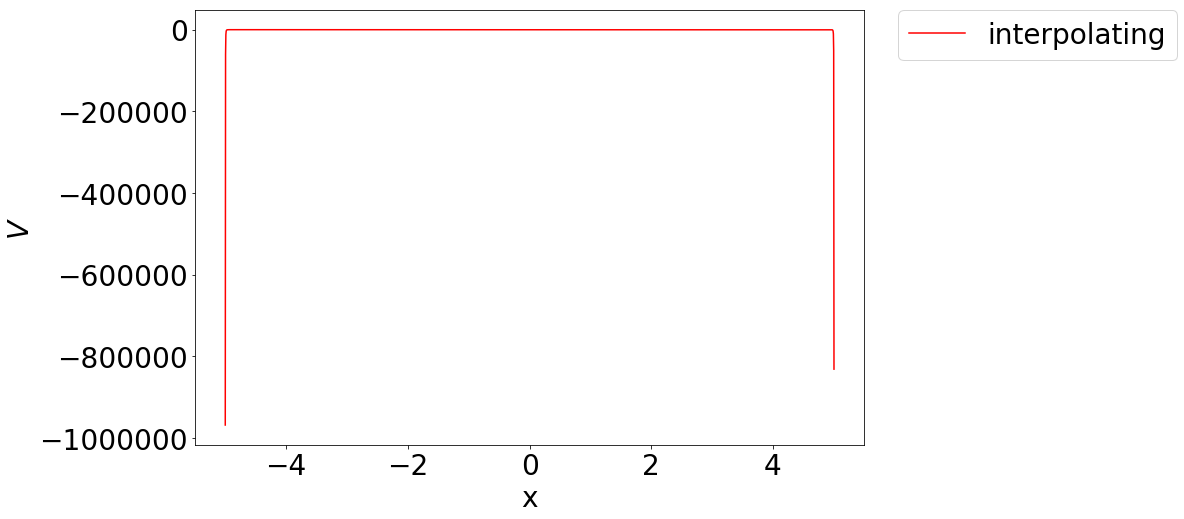

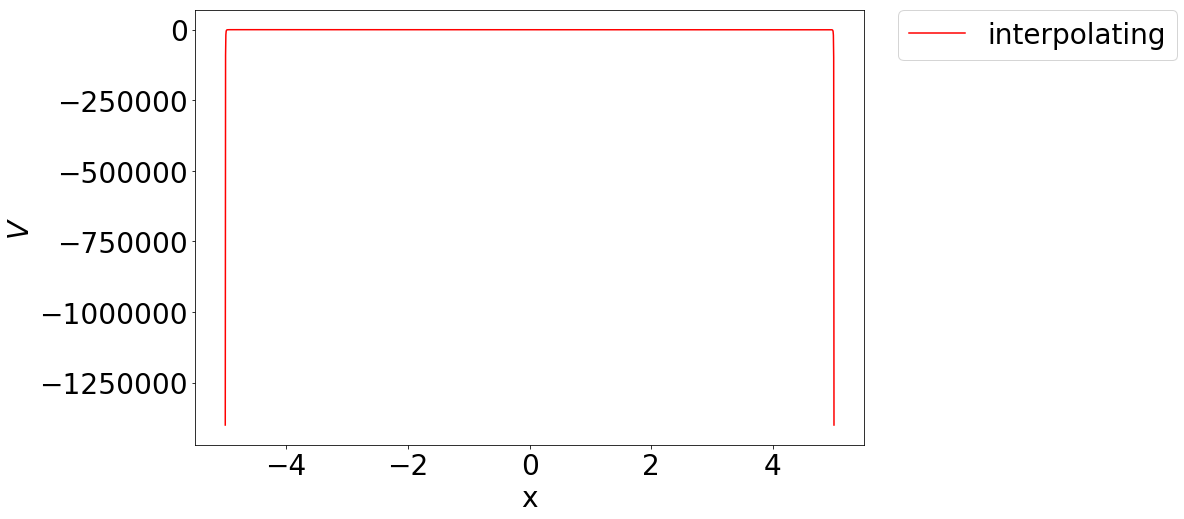

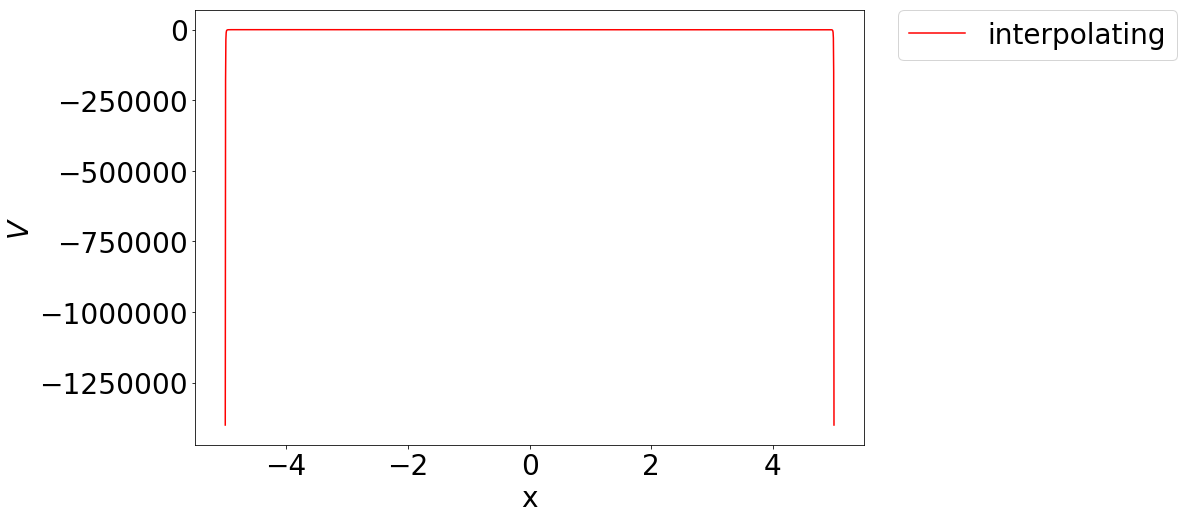

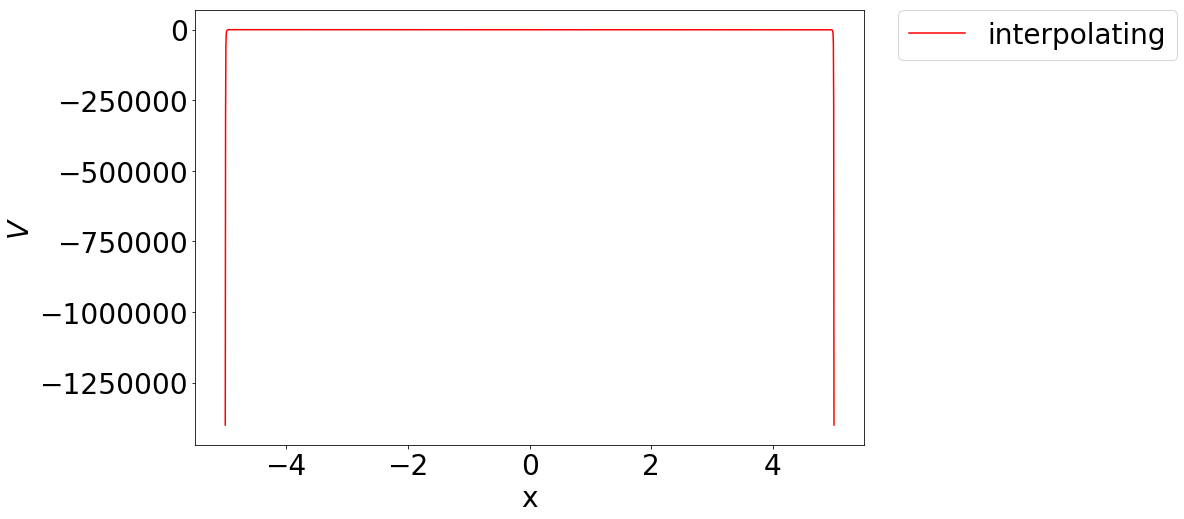

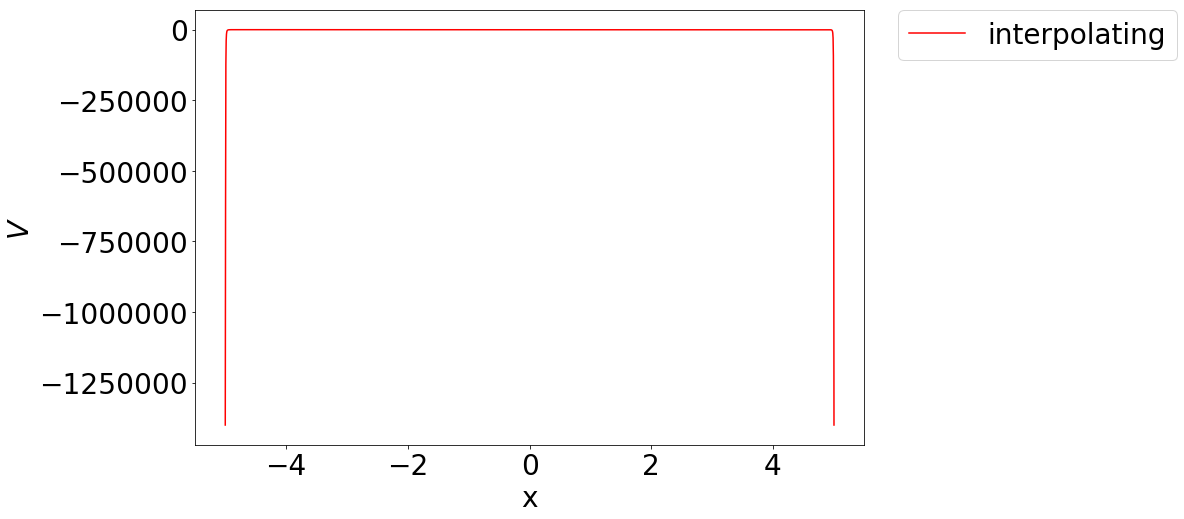

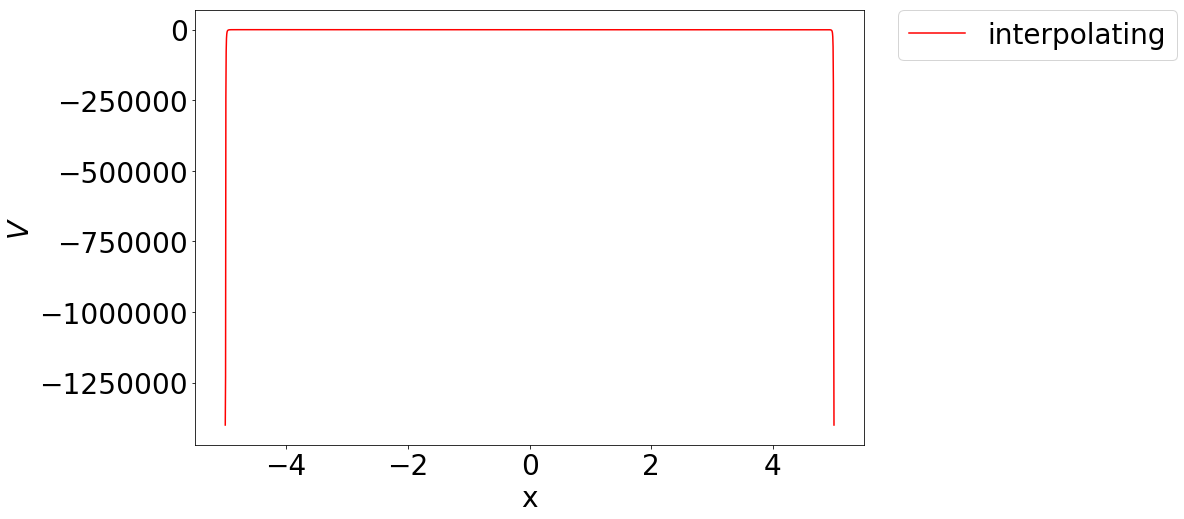

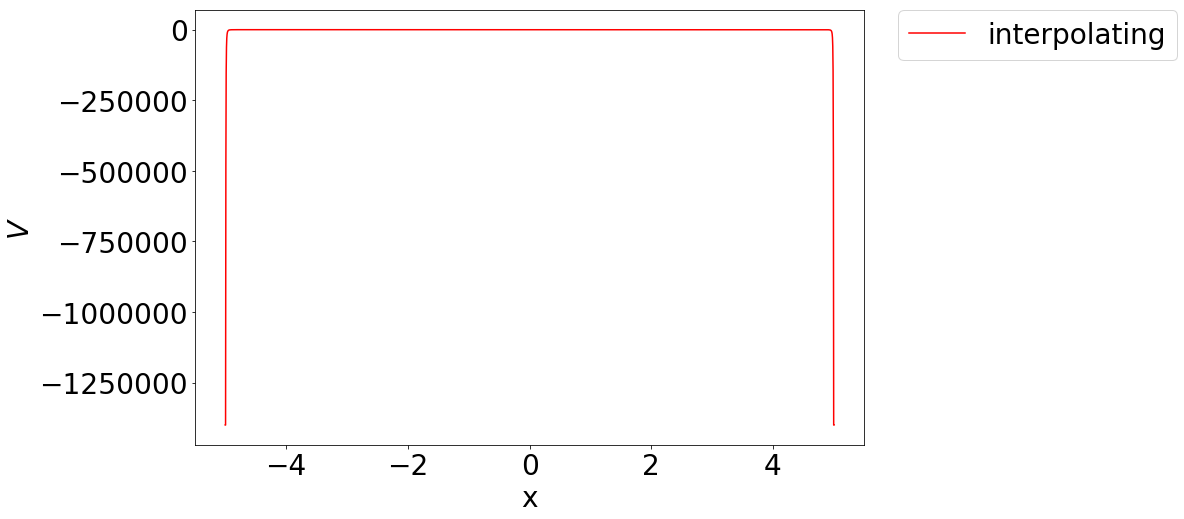

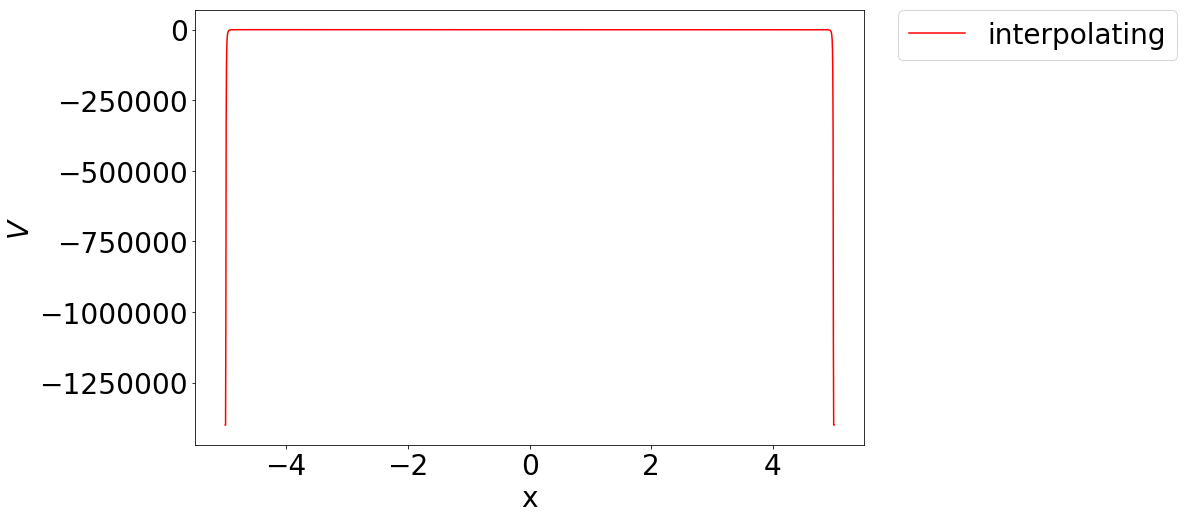

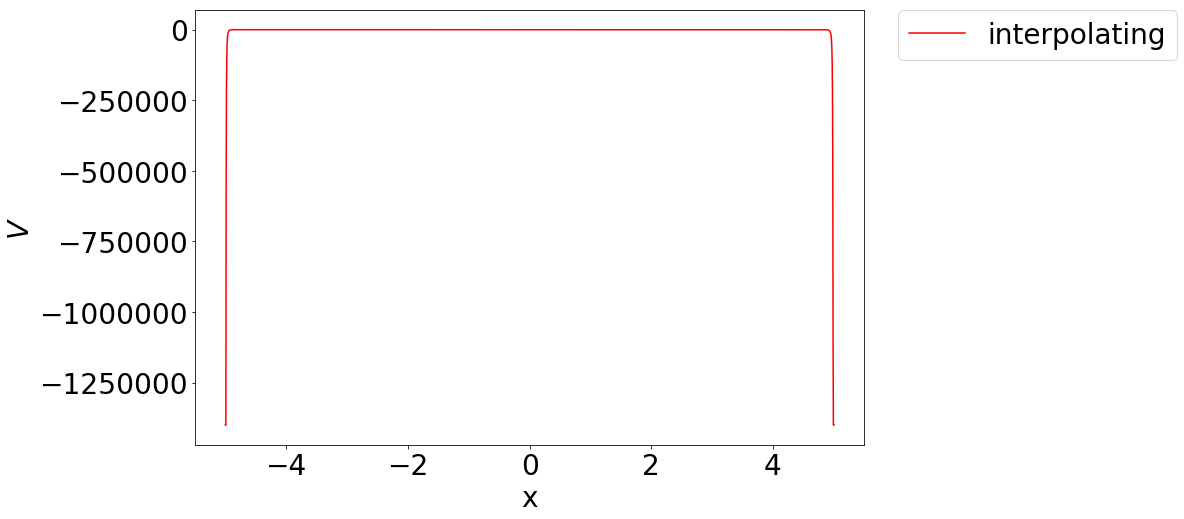

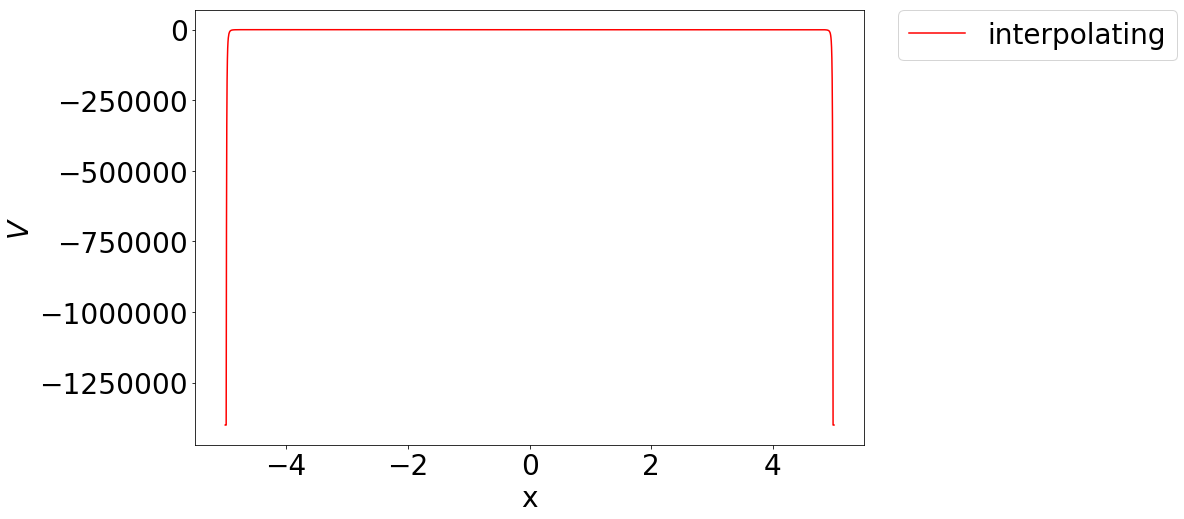

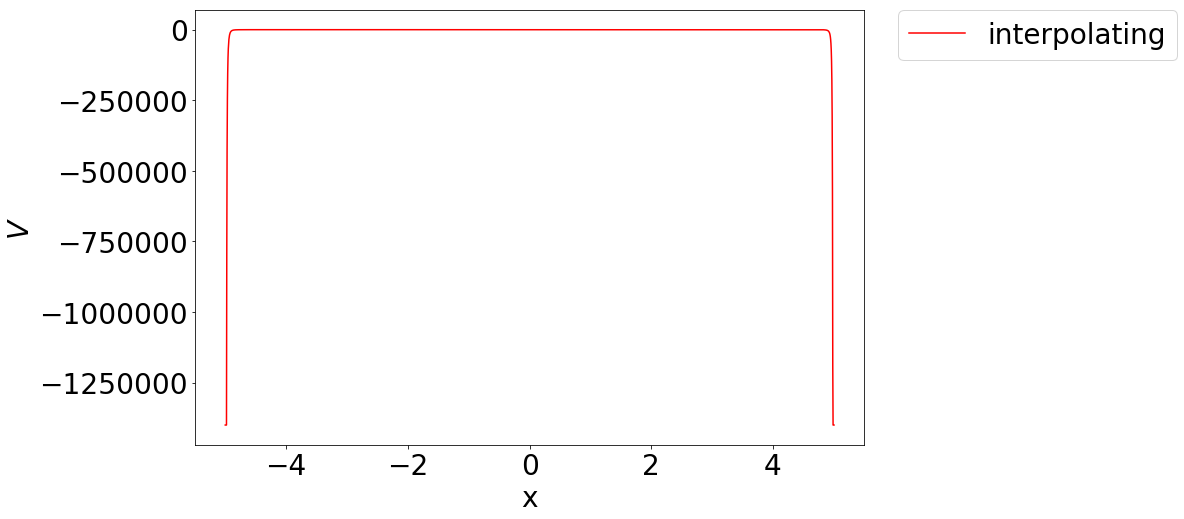

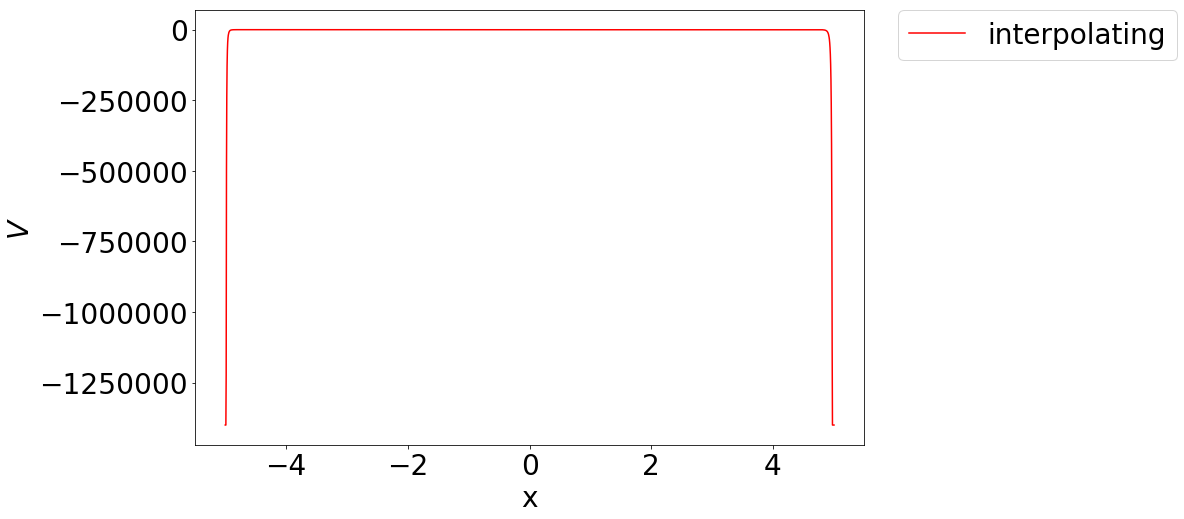

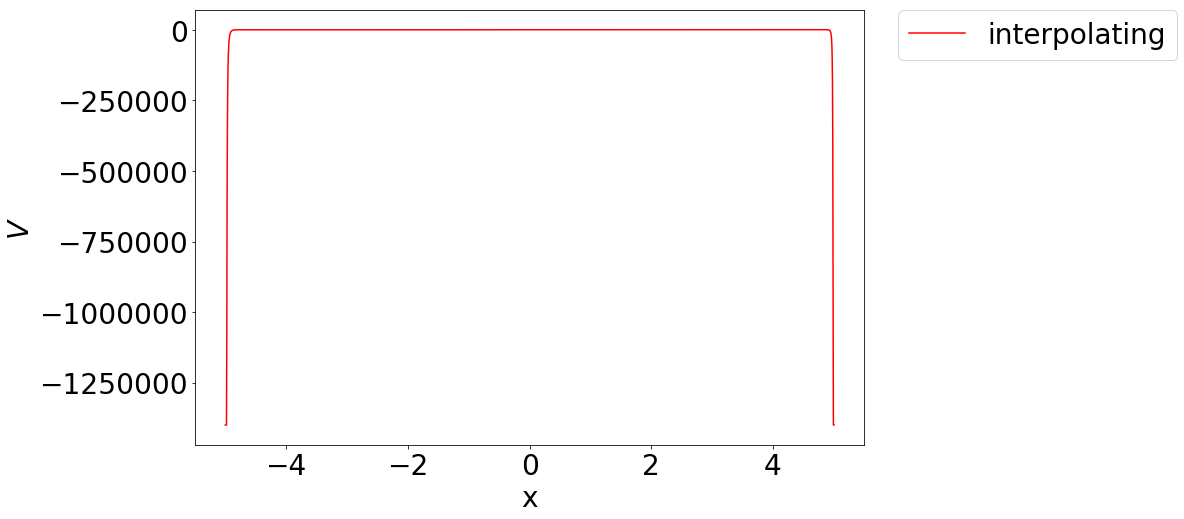

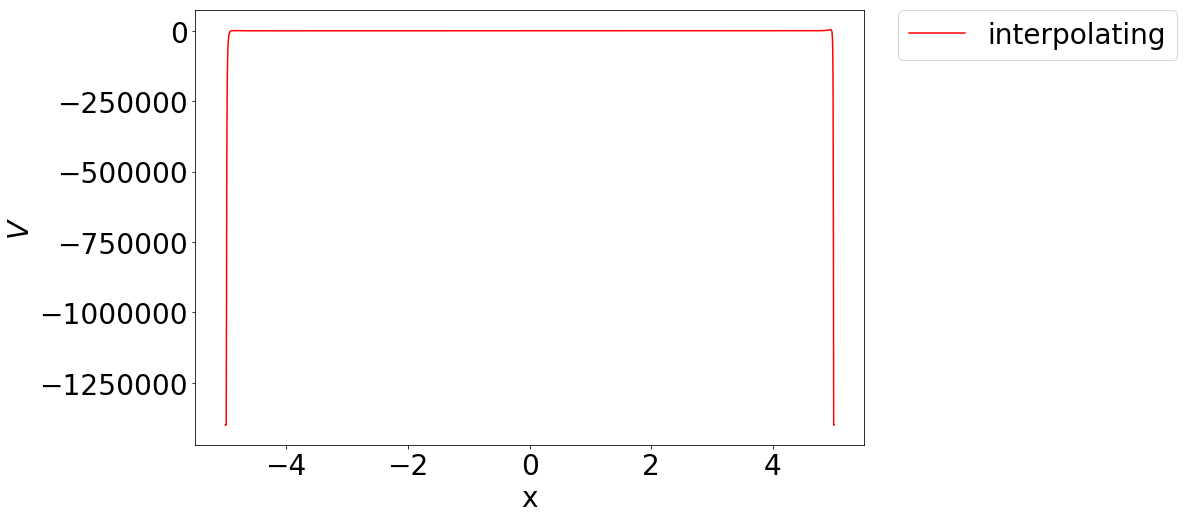

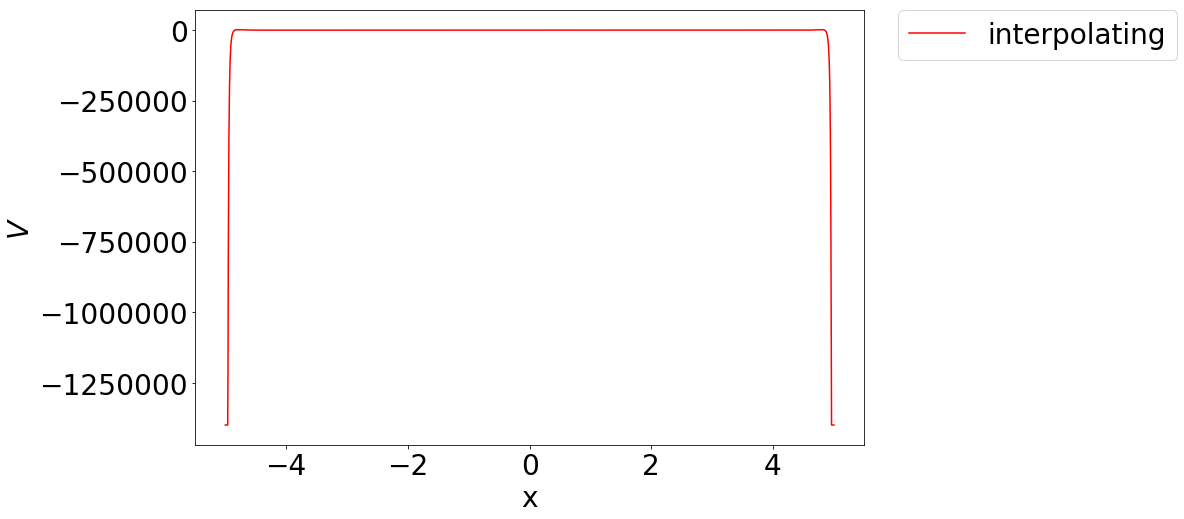

In [71]:
slices=40
for i in range(0,slices):
    #title("Interpolating function for the state density")
    ylabel(r"$V$")
    xlabel("x")
    #ylim([-500,500])
    #xlim([-0.7,0.7])
    plot(xvec,VR[int(i*(size(t)-1)/(slices-1)),:],label="interpolating",c='r')
    legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    show()

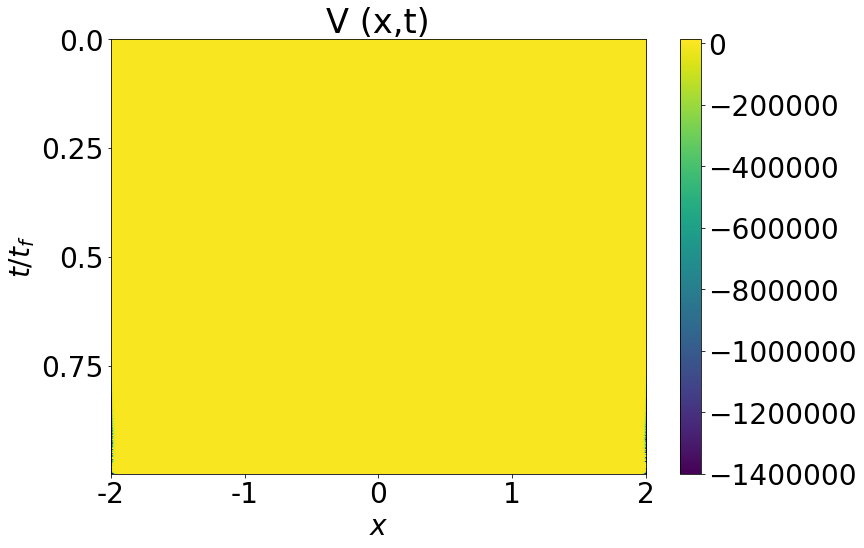

In [34]:
# Two subplots, unpack the axes array immediately
bounds=1
plt.imshow(VR[:,bounds:-bounds], interpolation='nearest', aspect='auto')
plt.title('V (x,t)')
plt.ylabel(r'$t/t_{f}$')
plt.xlabel(r'$x$') 
plt.xticks(arange(0,(shape(V)[1]-2*bounds+1),(shape(V)[1]-2*bounds)/4),arange(-2,4))
plt.yticks(arange(0,shape(V)[0],shape(V)[0]/4.0),linspace(0,1,5))
plt.colorbar()

plt.show()

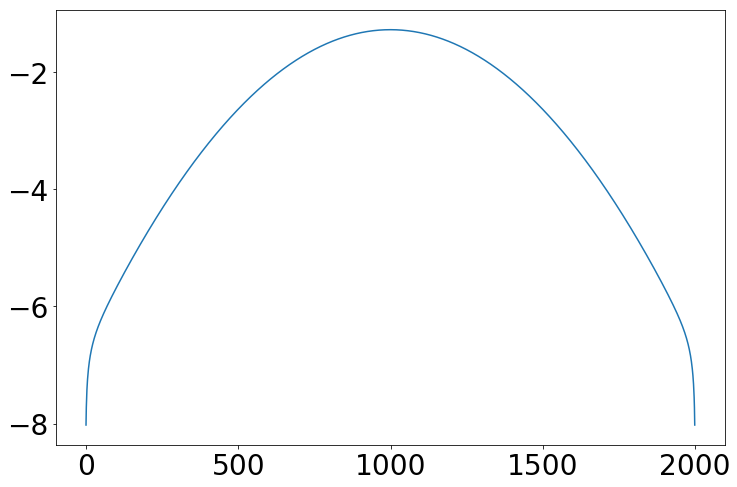

In [35]:
plot(log10(psis1[0]))


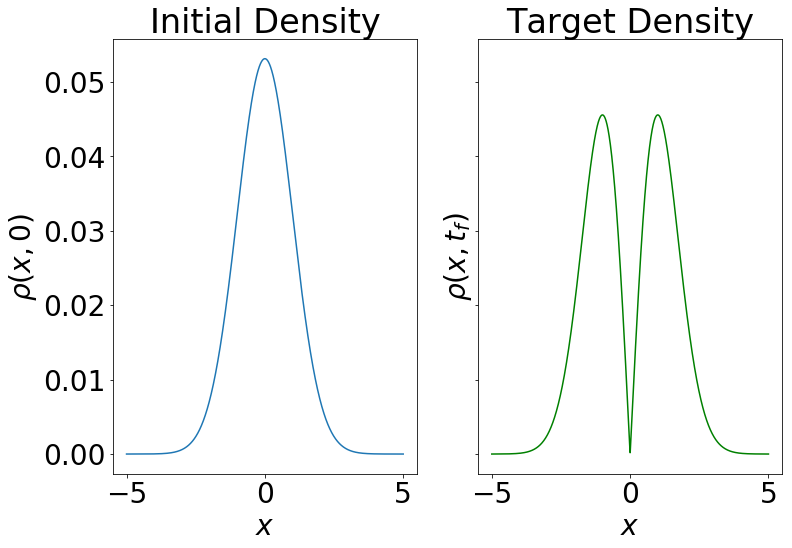

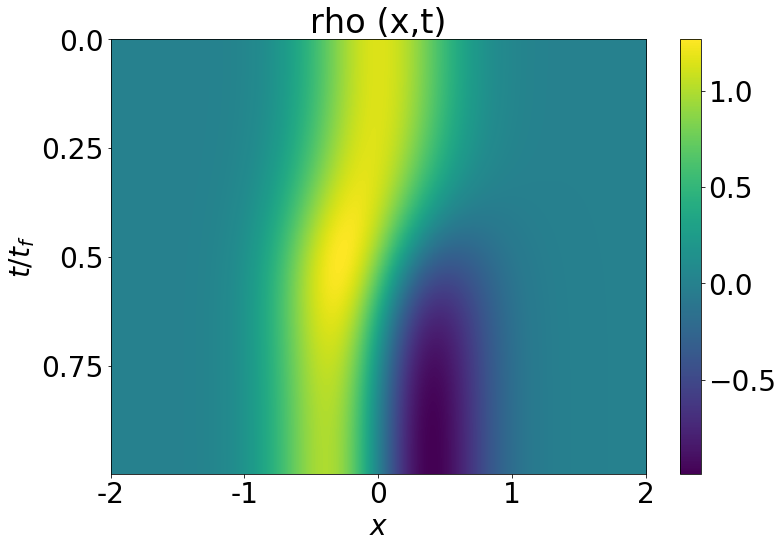

In [36]:
rhoR=ShortcutR(xvec,psis1[0],psis1[1],E1[0],E1[1], eta)
bounds=1
plt.imshow(rhoR, interpolation='nearest', aspect='auto')
plt.title('rho (x,t)')
plt.ylabel(r'$t/t_{f}$')
plt.xlabel(r'$x$') 
plt.xticks(arange(0,(shape(V)[1]-2*bounds+1),(shape(V)[1]-2*bounds)/4),arange(-2,4))
plt.yticks(arange(0,shape(V)[0],shape(V)[0]/4.0),linspace(0,1,5))
plt.colorbar()

plt.show()

In [37]:
from scipy import linalg as la
steps=2000
hbar=1.0
m=1.0
W=1.0
#d=0.5
#cent=-0.0
d=0.03
cent=-0.015
# divide by two so a well from -W to W is of input width
W=W/2.0
# create x-vector from -W to W
xvec=np.linspace(-W,W,steps)
    # get step size
h=xvec[1]-xvec[0]
    #V=2000.0*0.5*((np.sign(xvec+d/2.0-cent))-(np.sign(xvec-d/2.0-cent)))
VI=10000*0.5*(xvec-(cent-d/2.0))*((np.sign(xvec-(cent-d/2.0)))-(np.sign(xvec-(cent+d/2.0))))+10000*0.5*(d-xvec-(-cent-d/2.0))*((np.sign(xvec-(-cent-d/2.0)))-(np.sign(xvec-(-cent+d/2.0))))
Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)
        +np.diag(np.ones(steps-1),-1))/(float)(h**2)
    # create Hamiltonian
Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + np.diag(VI)
#Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + 0.0*0.5*np.diag(xvec**2)
valuesI=la.eigh(Hamiltonian)

14.1585208632
19.7993513081


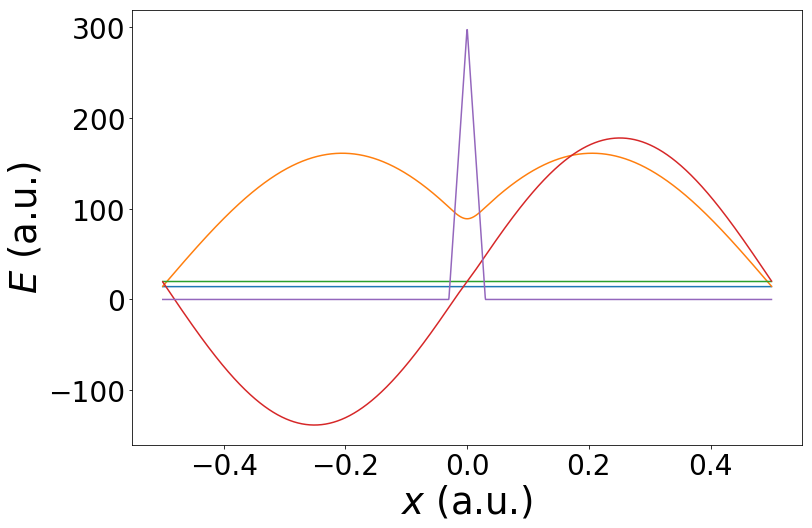

In [38]:
for i in range(0,2):
    
    plot(xvec,valuesI[0][i]*xvec/xvec)
    plot(xvec,(valuesI[1].T)[i]/0.0002+valuesI[0][i])
    

    print(valuesI[0][i])
plot(xvec,VI)
ylabel("$E$ (a.u.)",size=37)
xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 28})

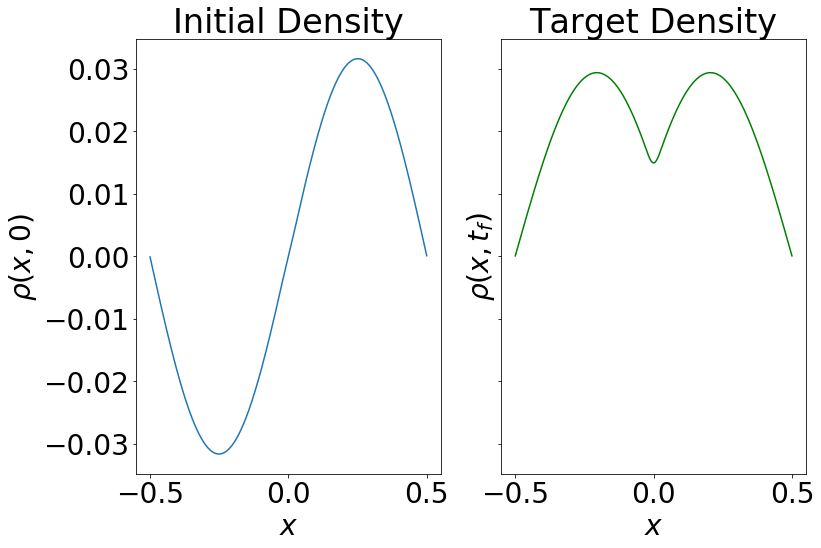

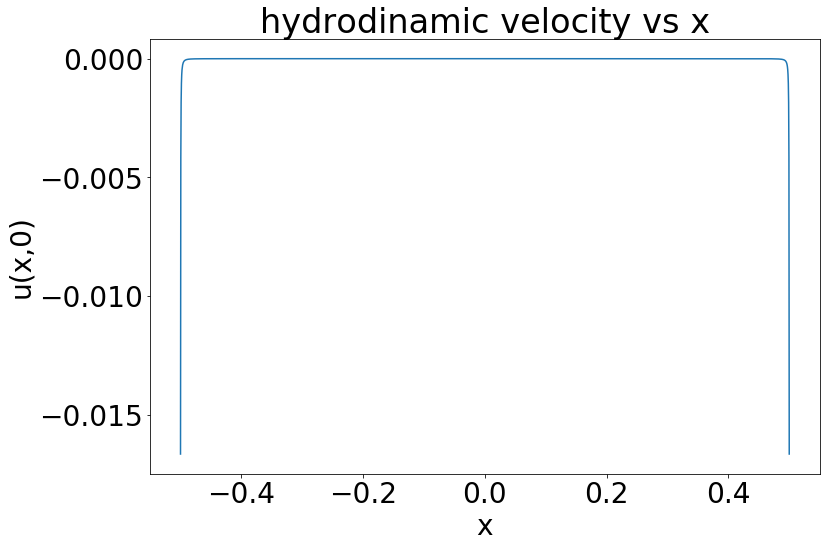

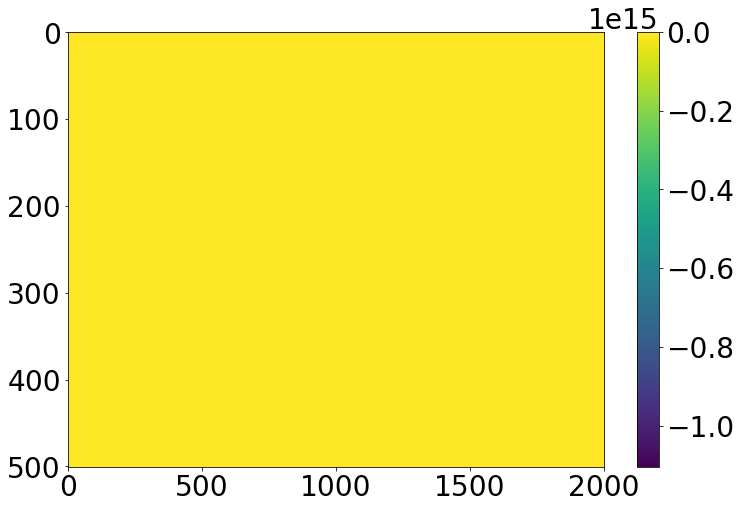

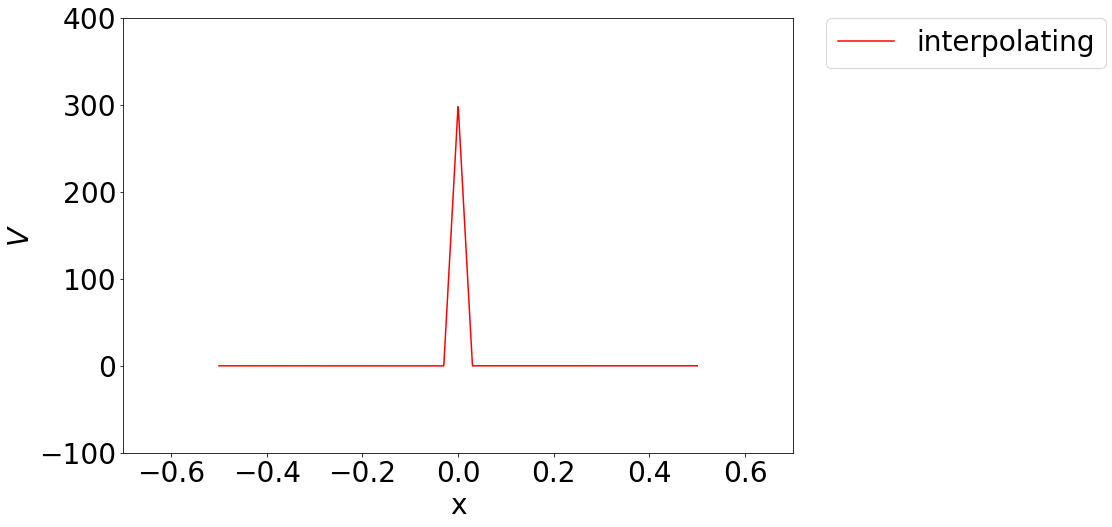

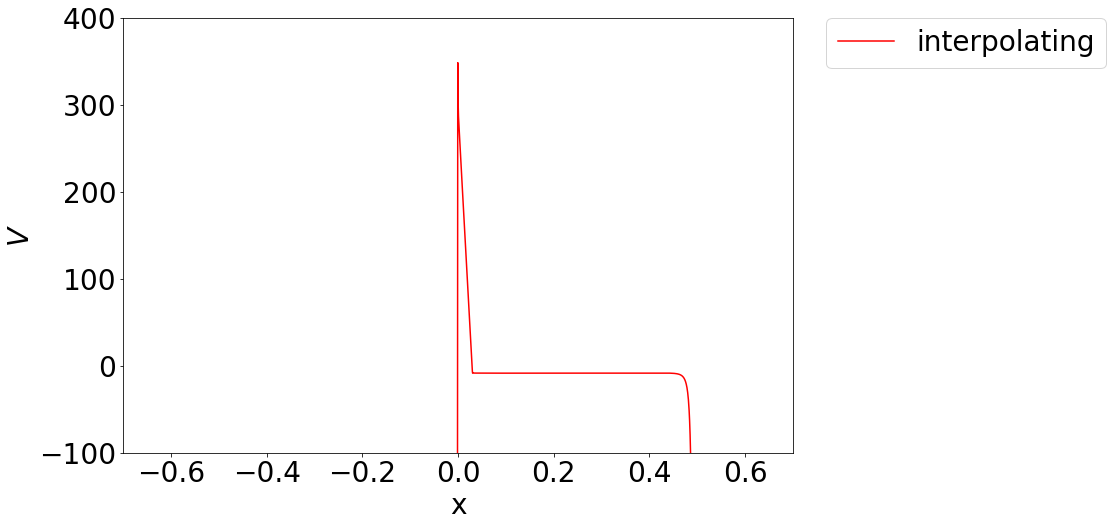

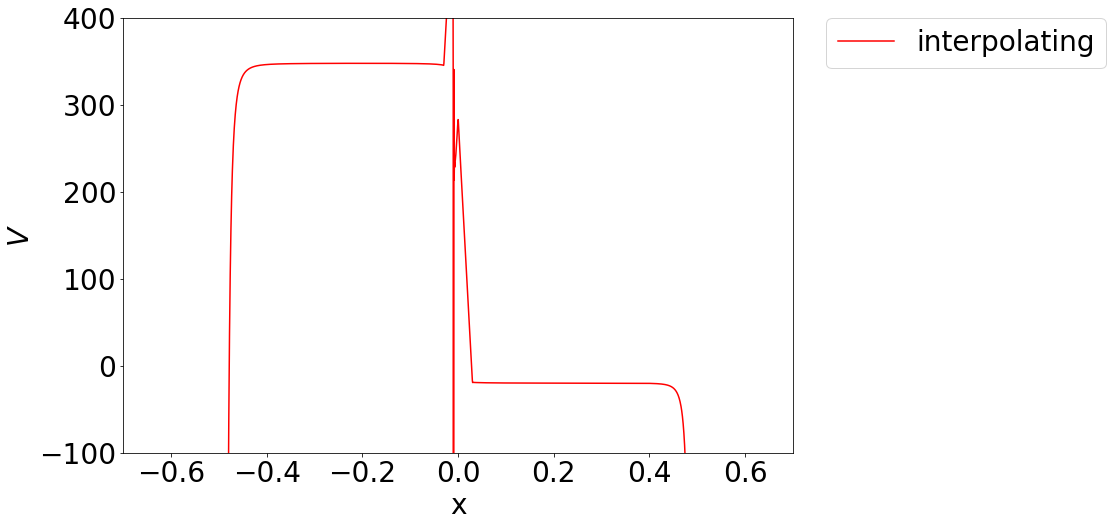

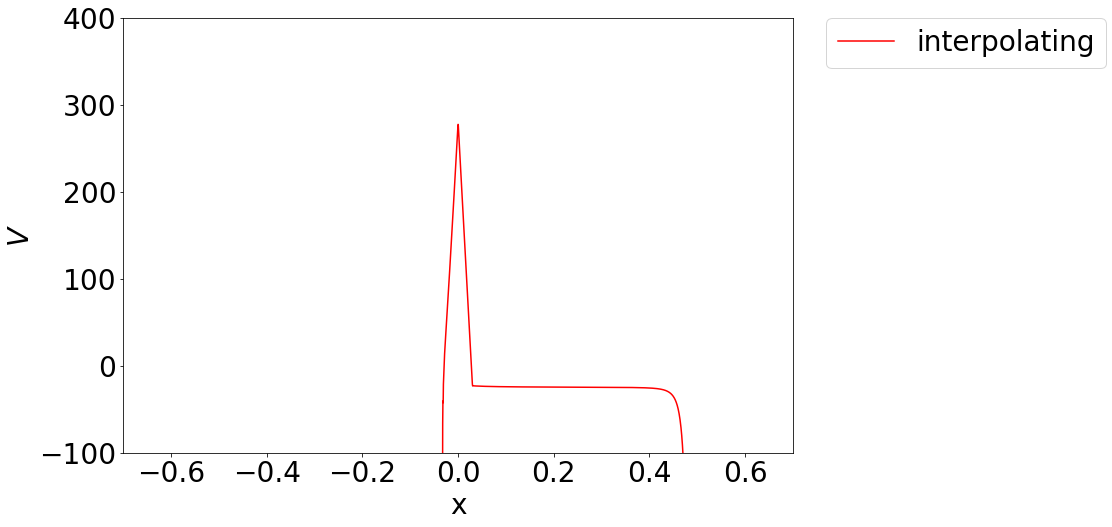

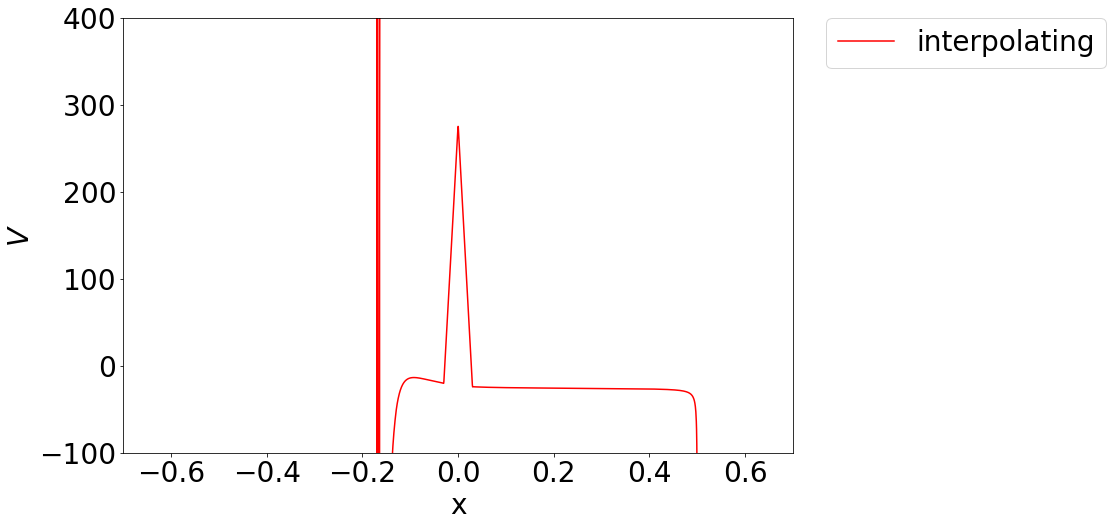

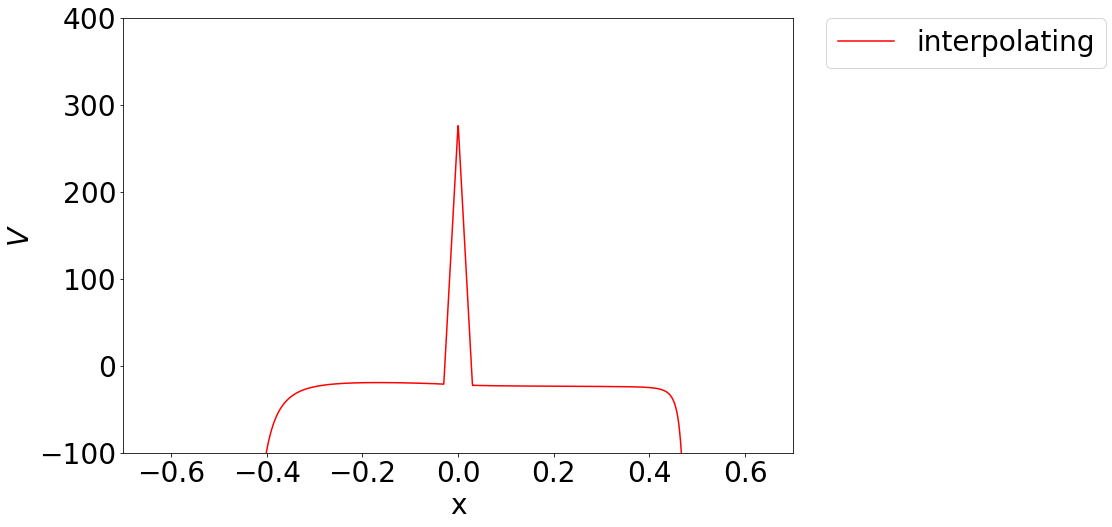

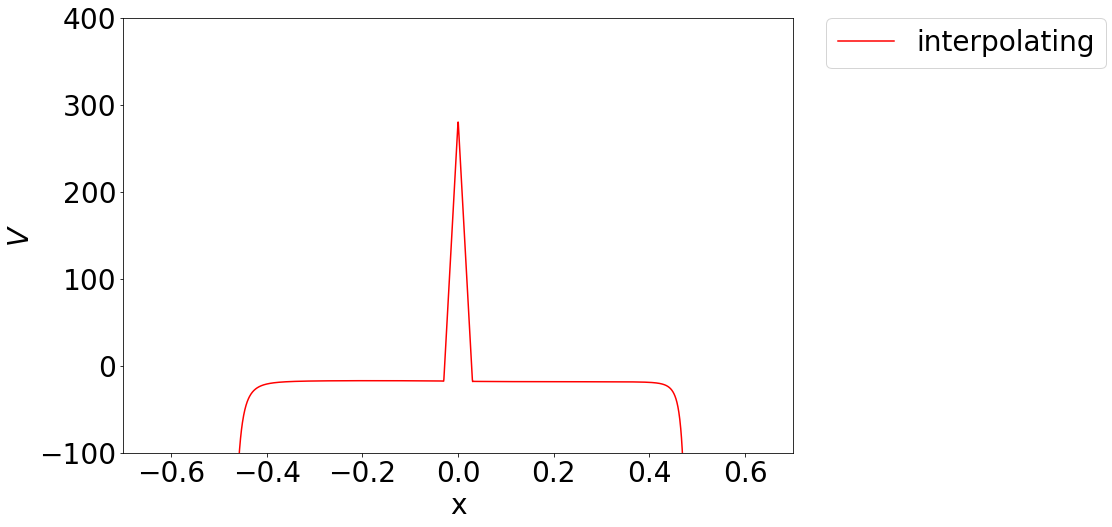

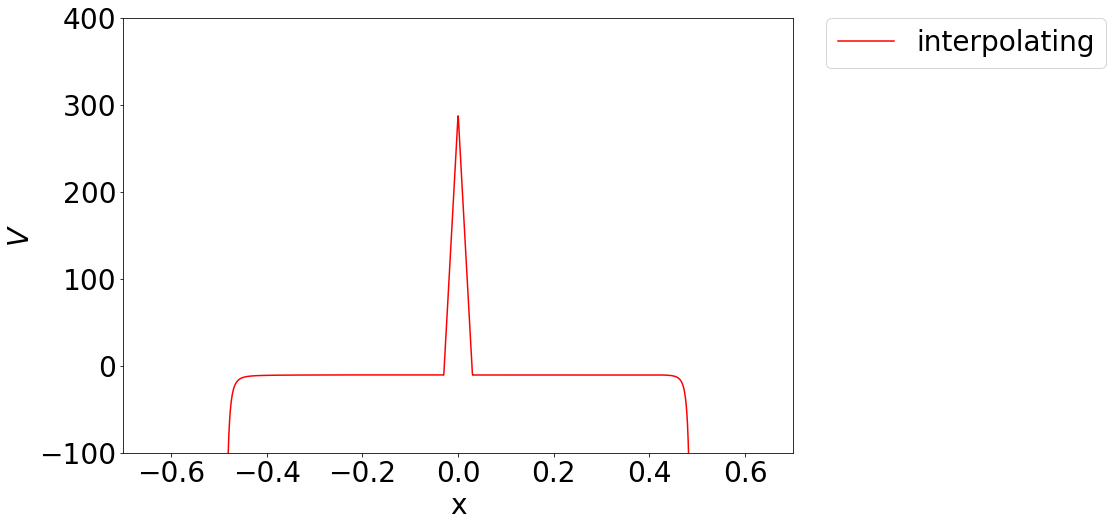

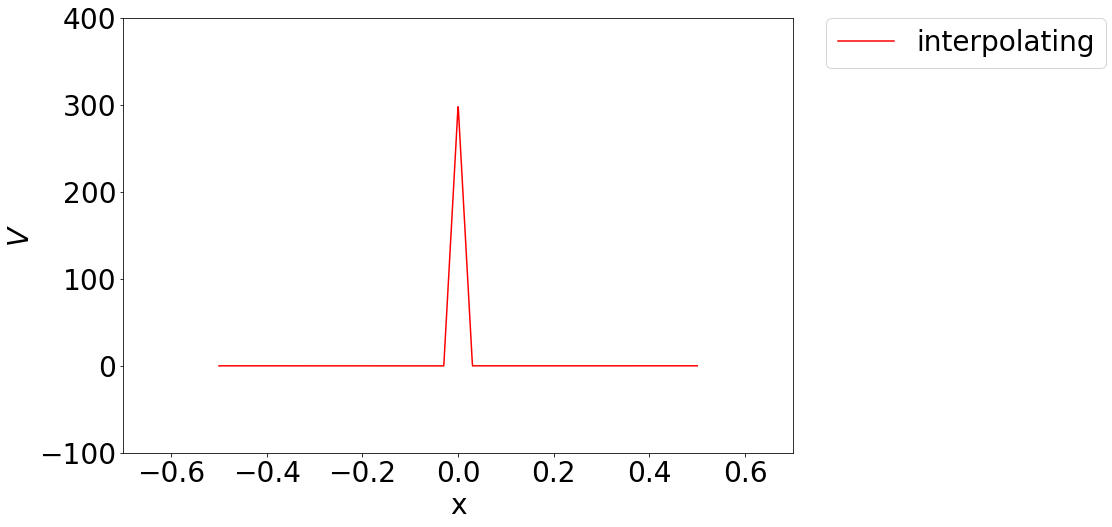

In [39]:



VR=Shortcut(xvec,(valuesI[1].T)[1],(valuesI[1].T)[0],(valuesI[0].T)[1],(valuesI[0].T)[0], eta)

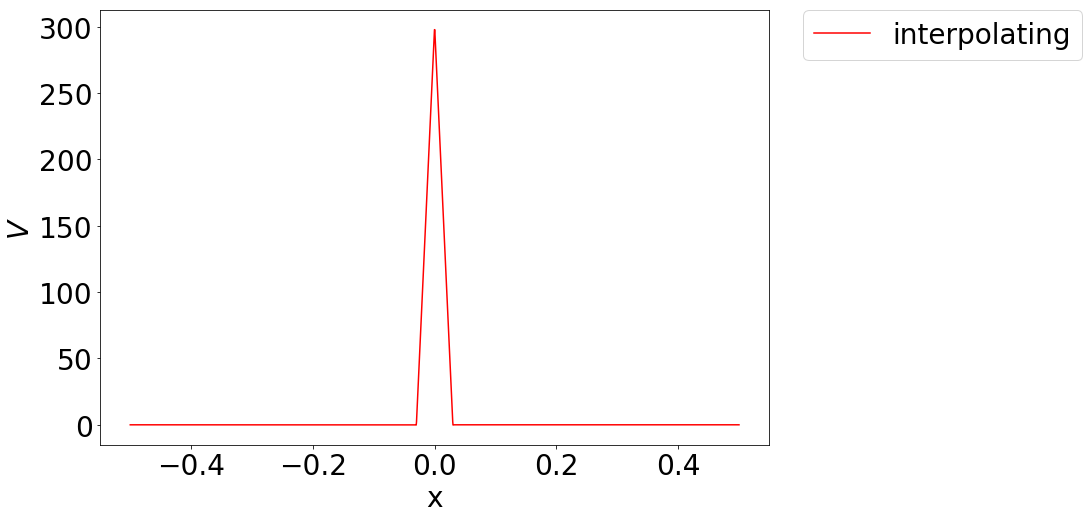

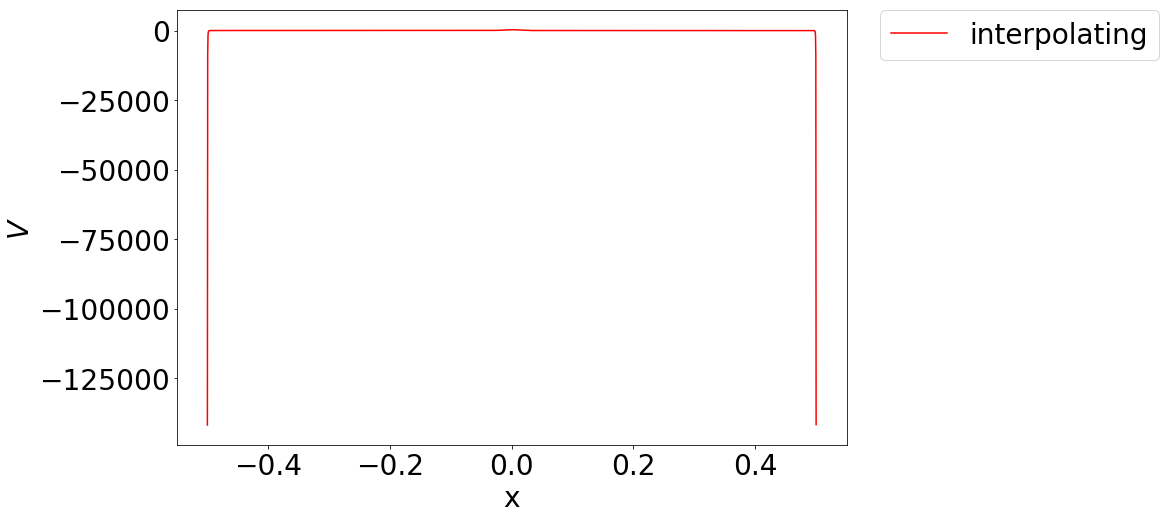

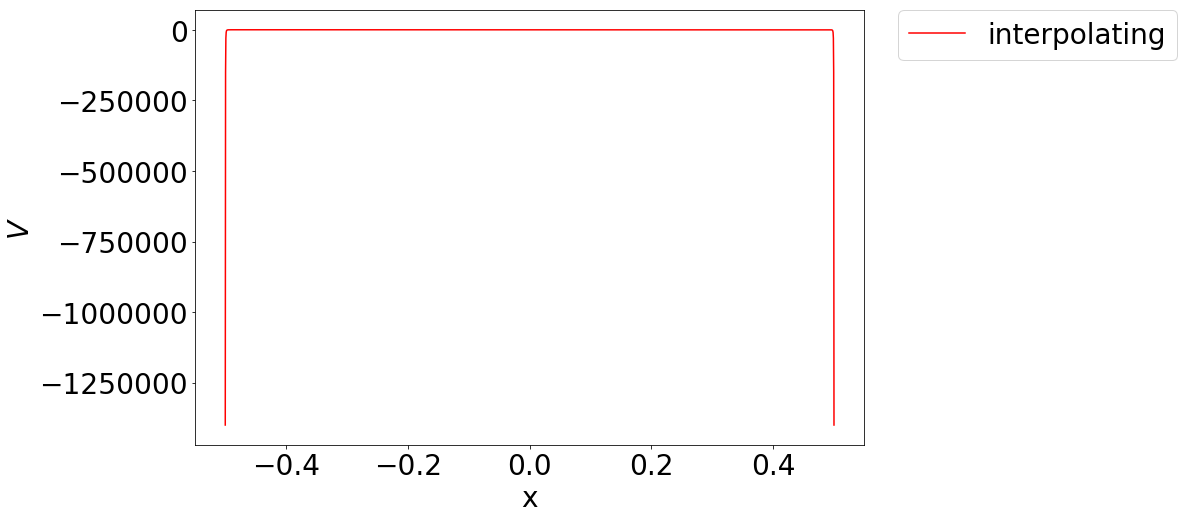

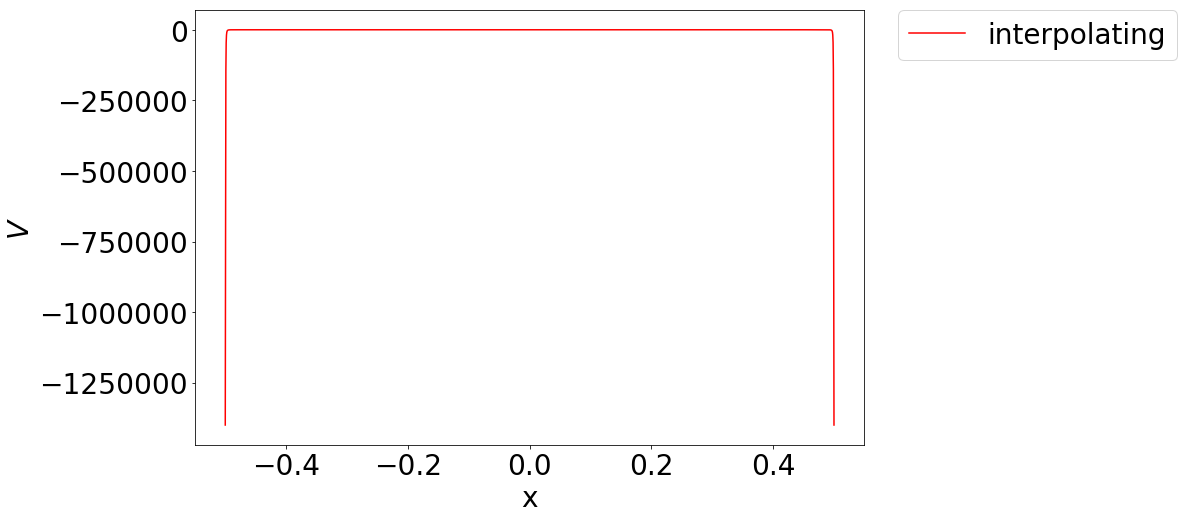

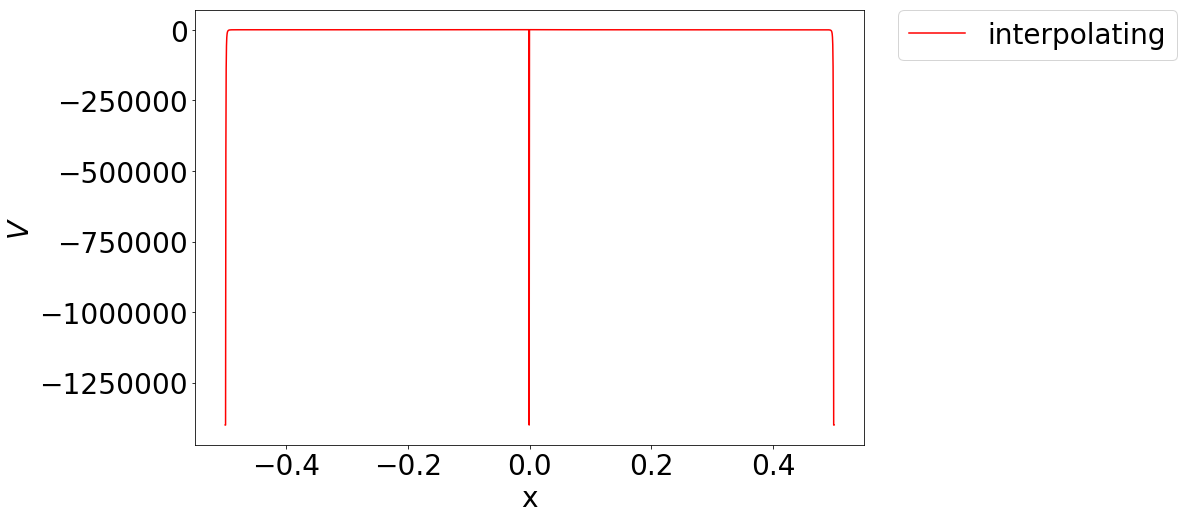

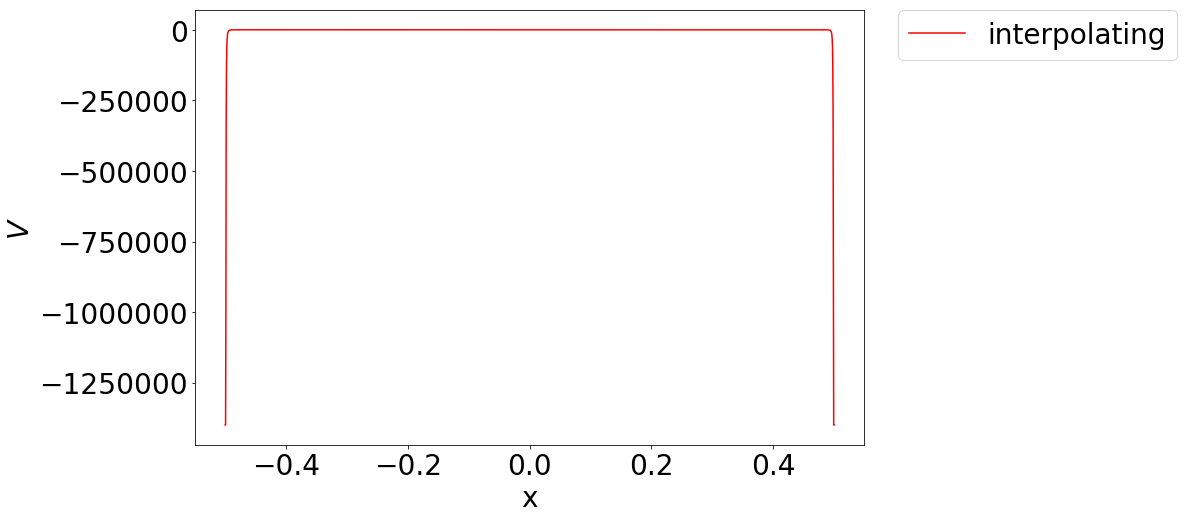

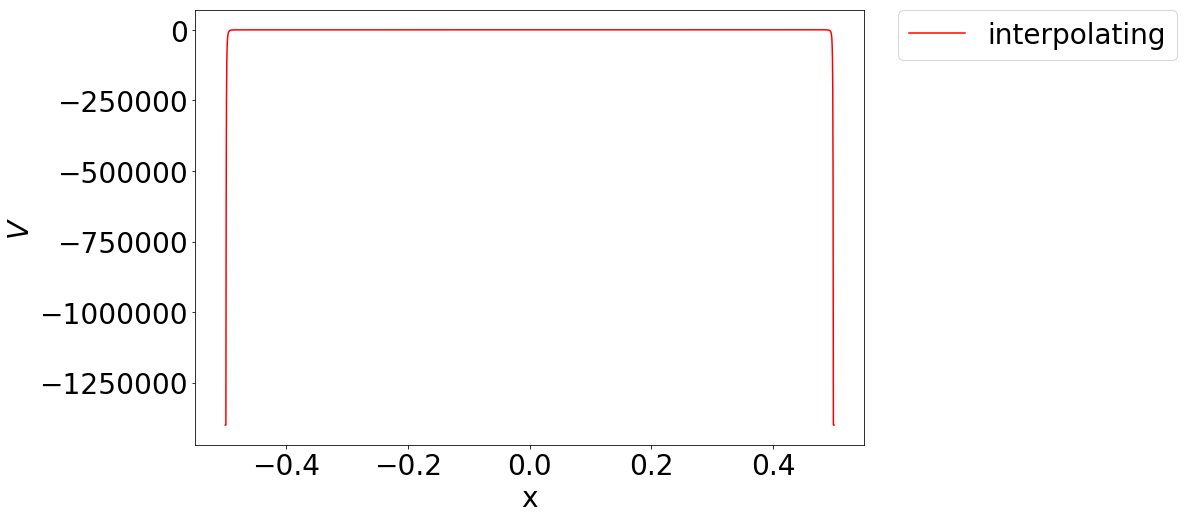

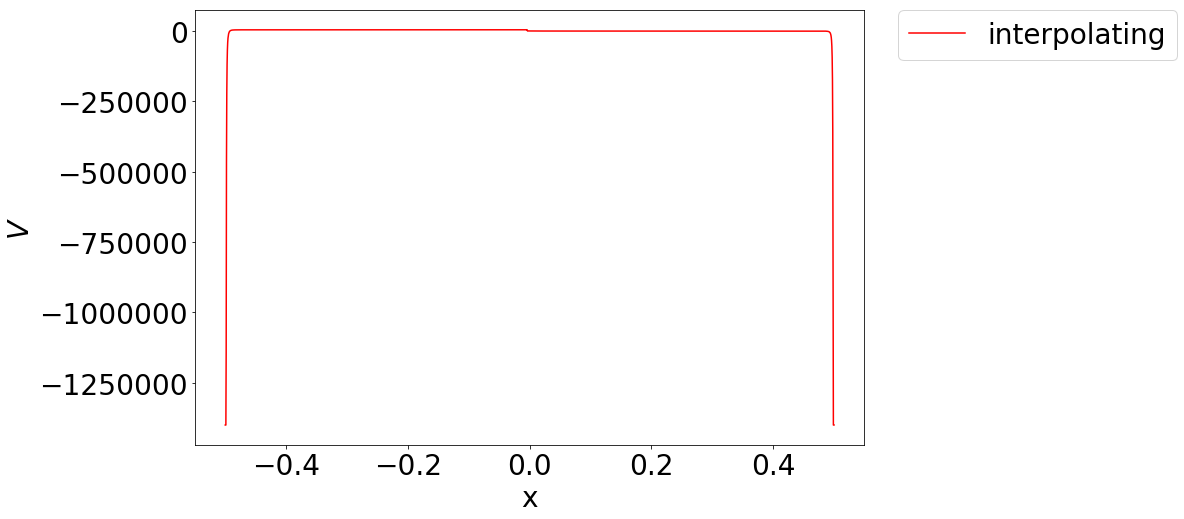

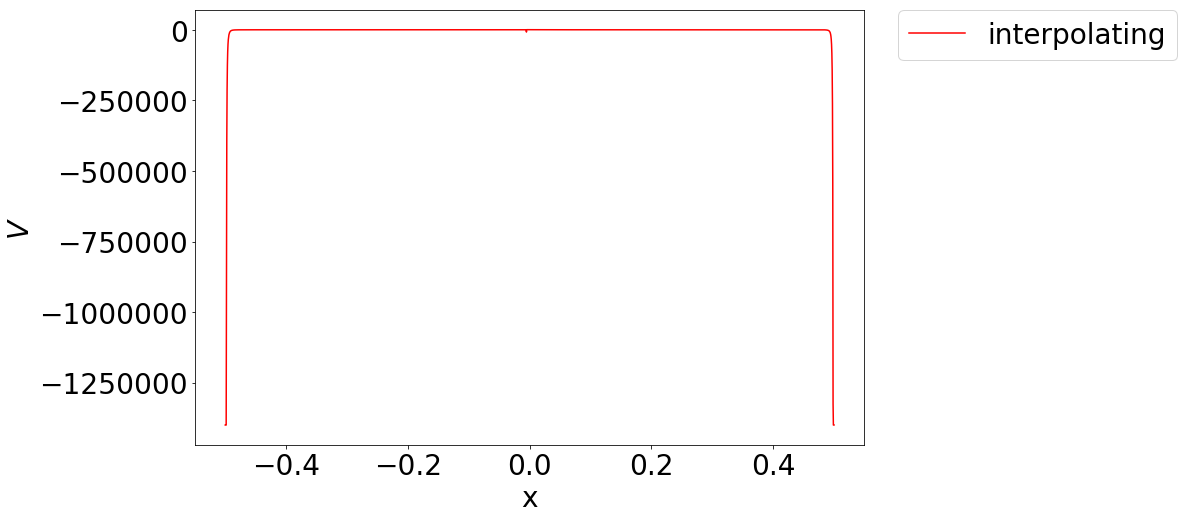

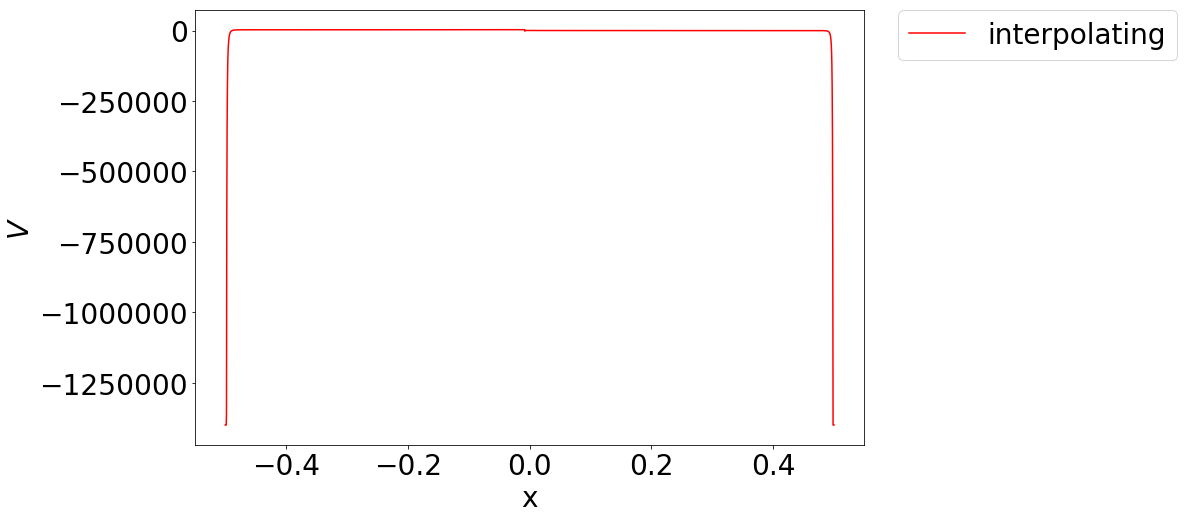

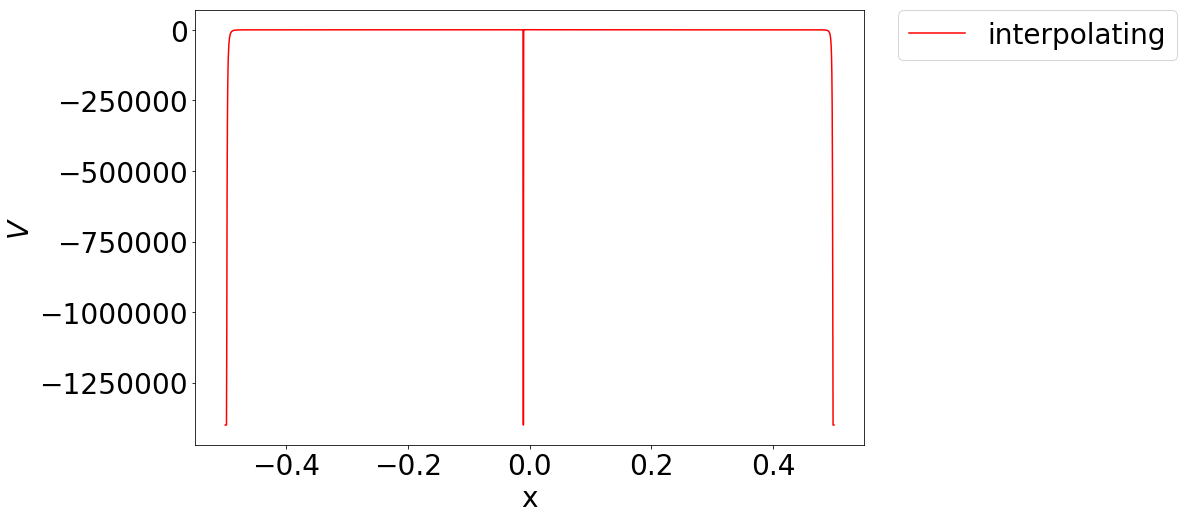

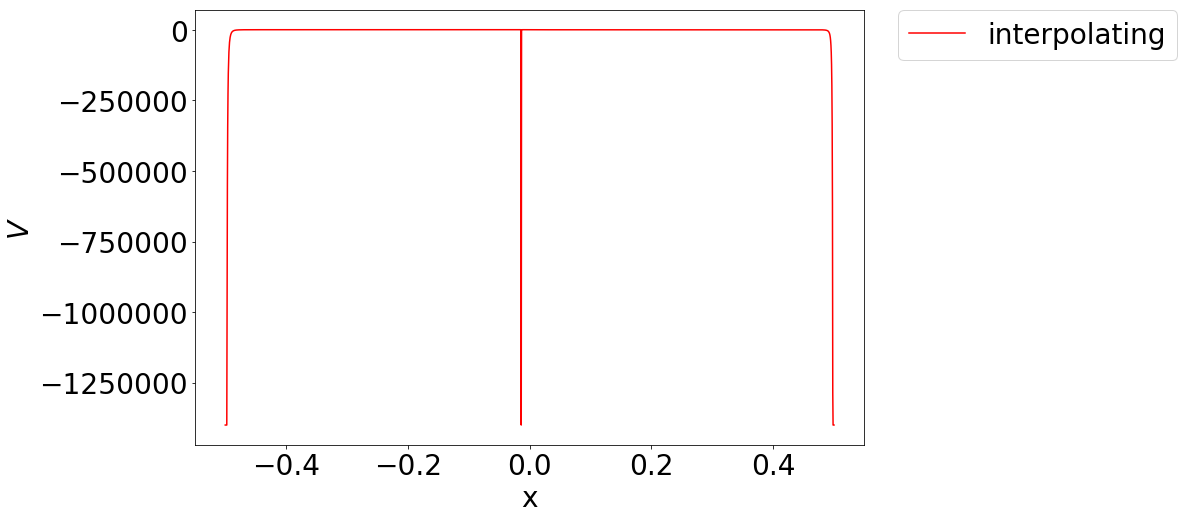

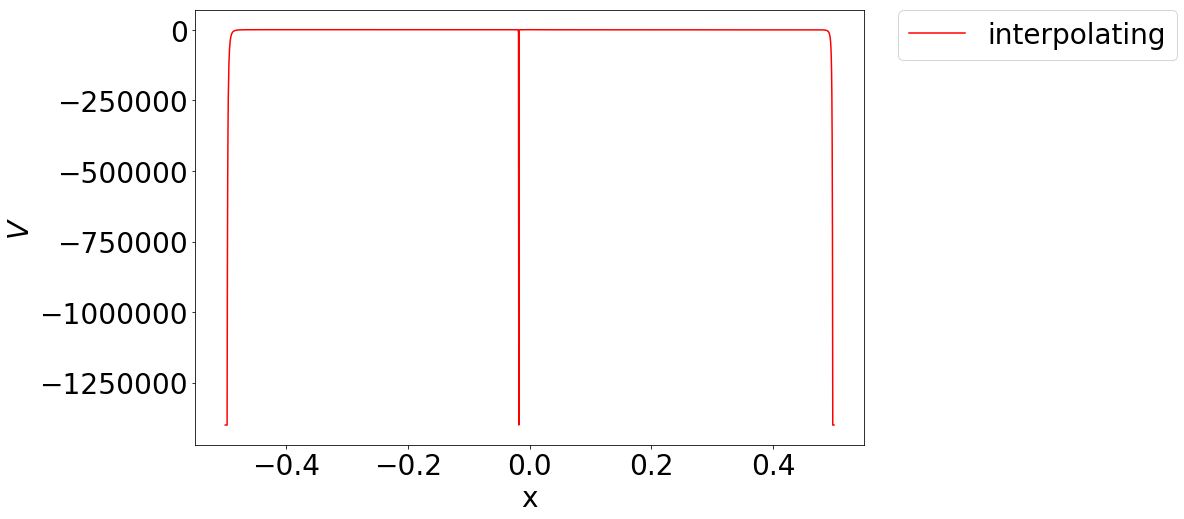

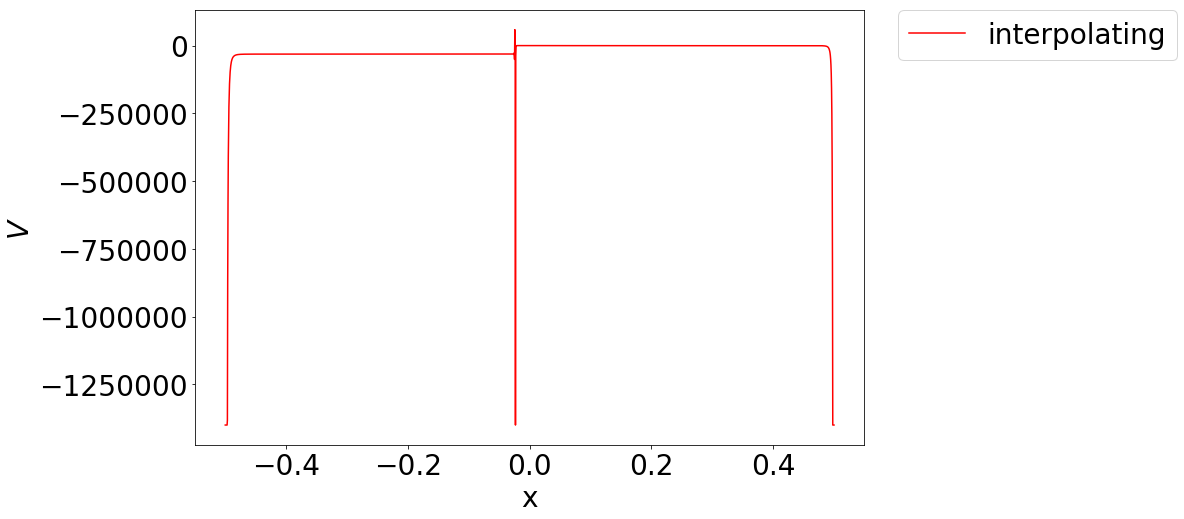

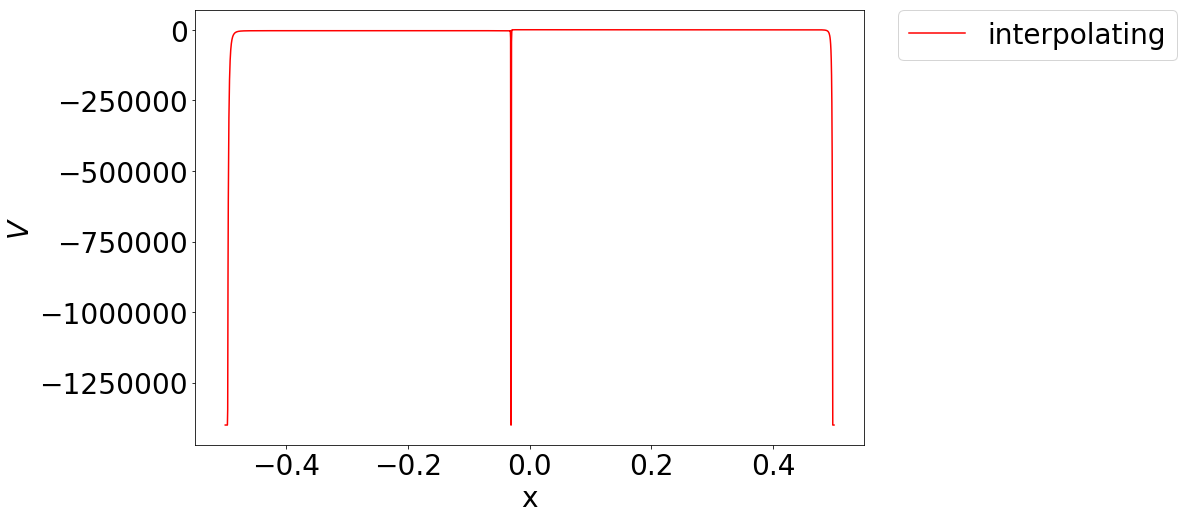

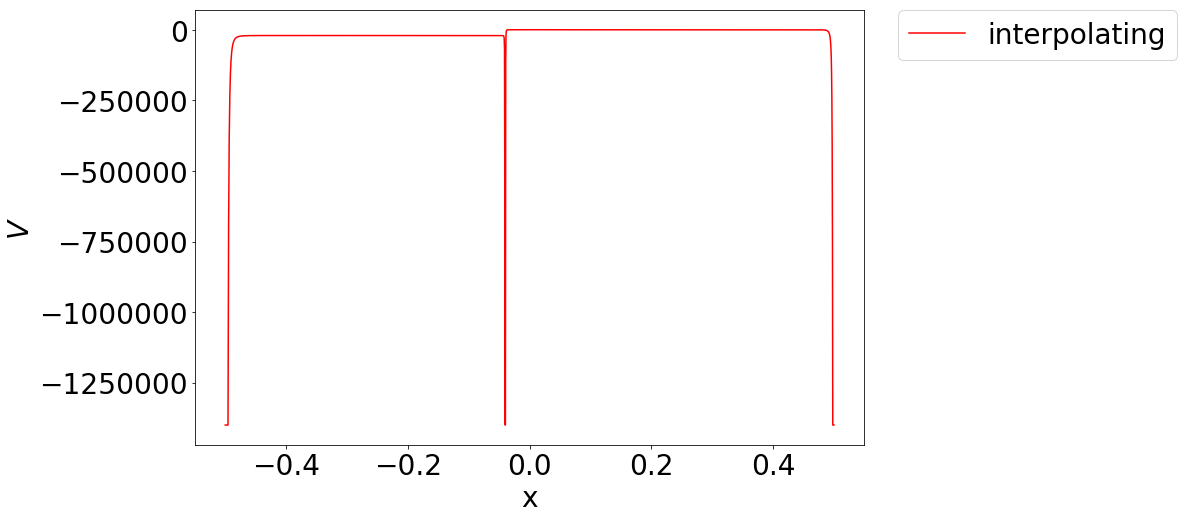

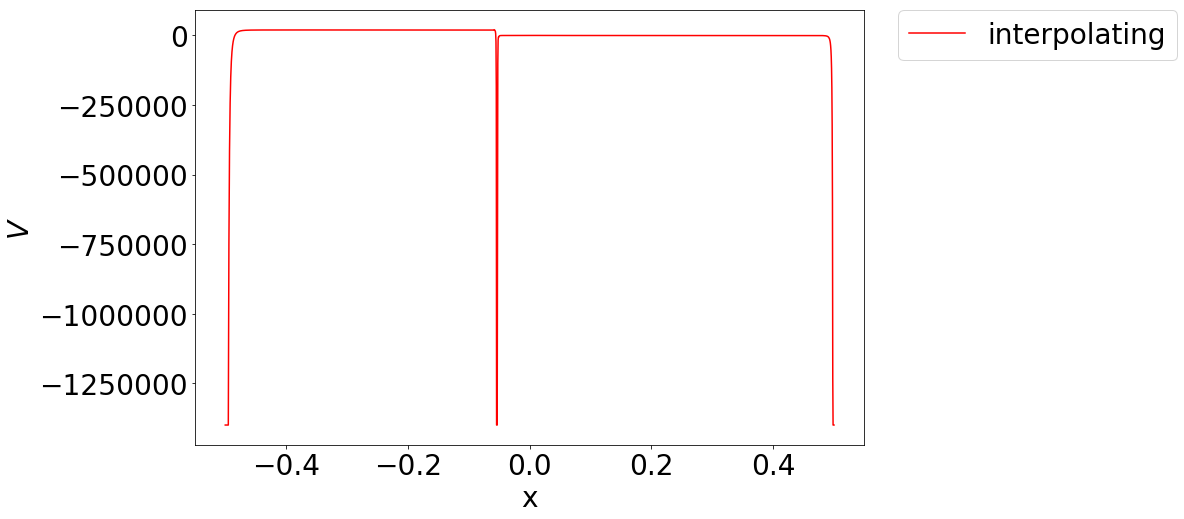

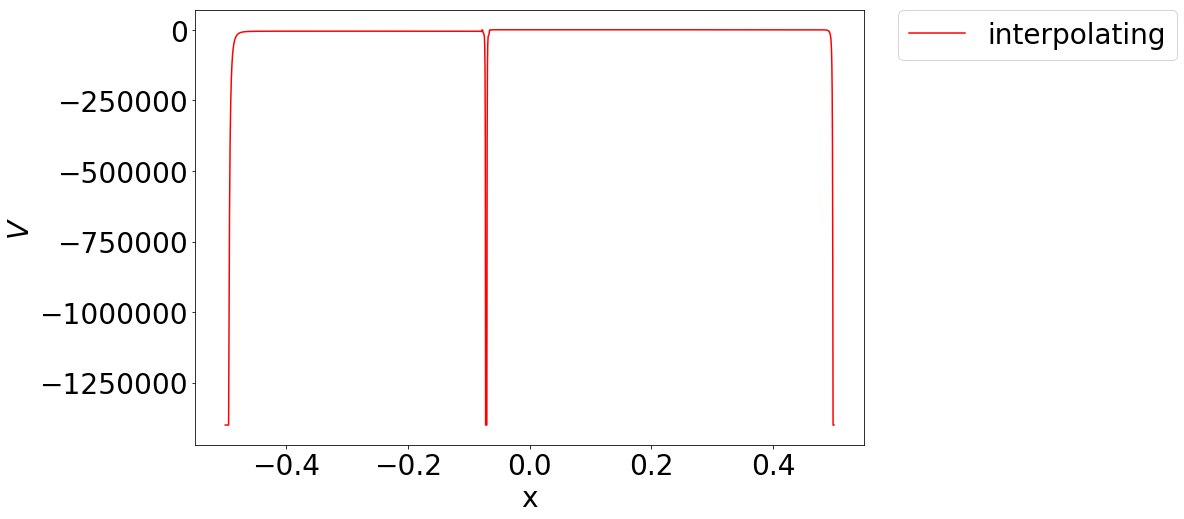

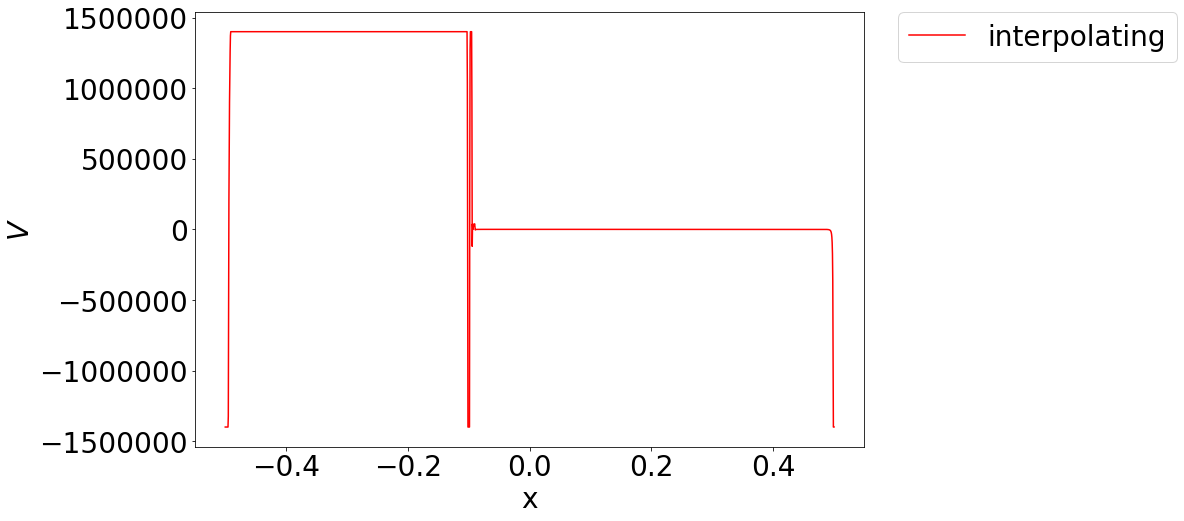

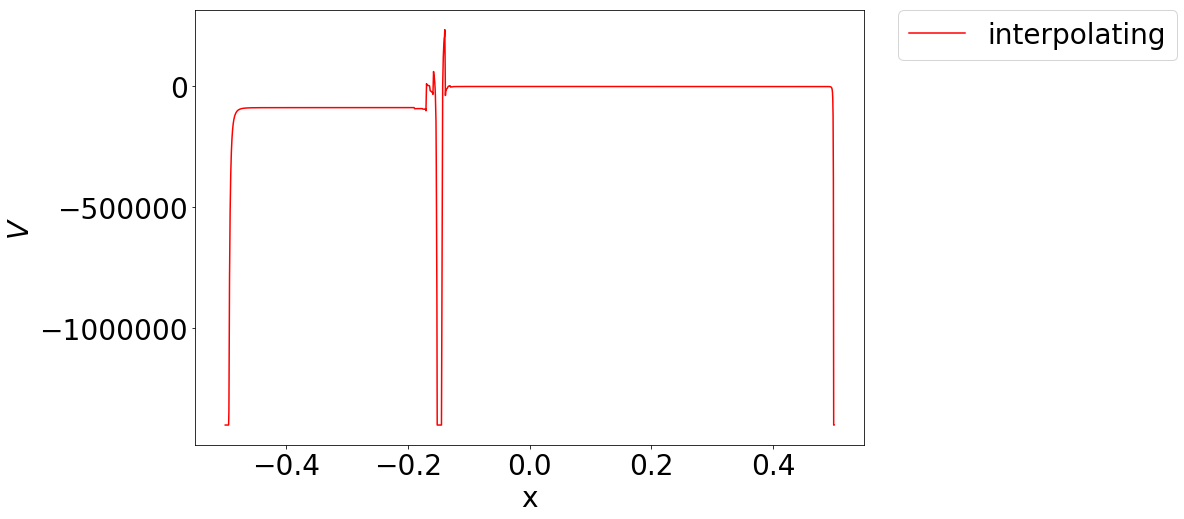

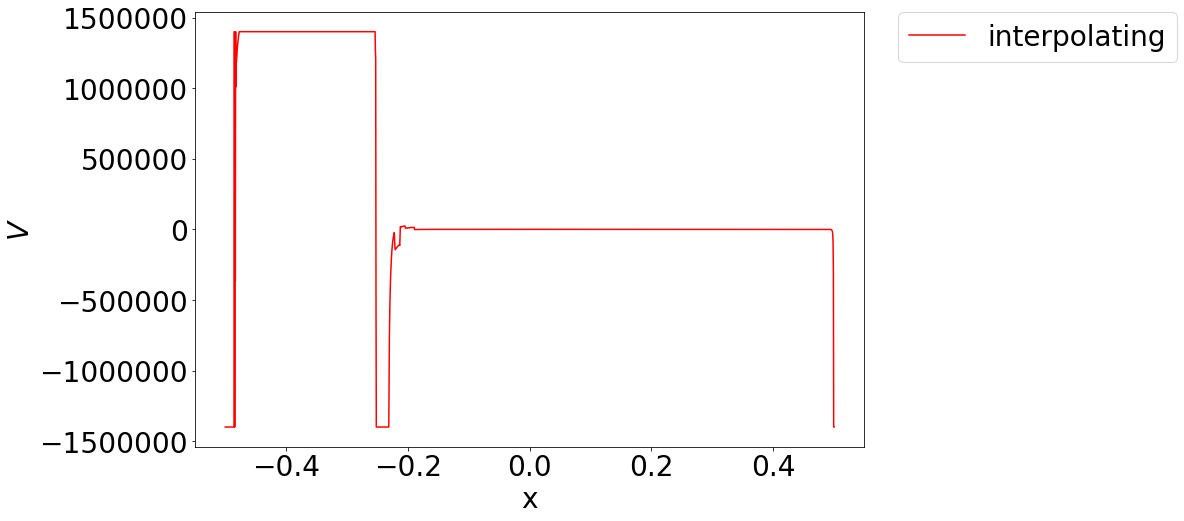

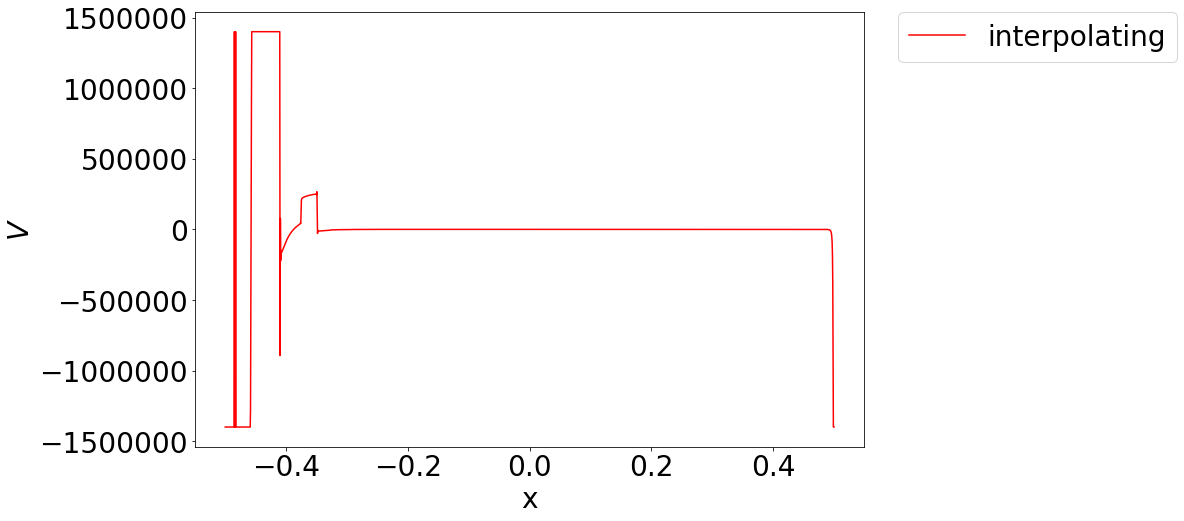

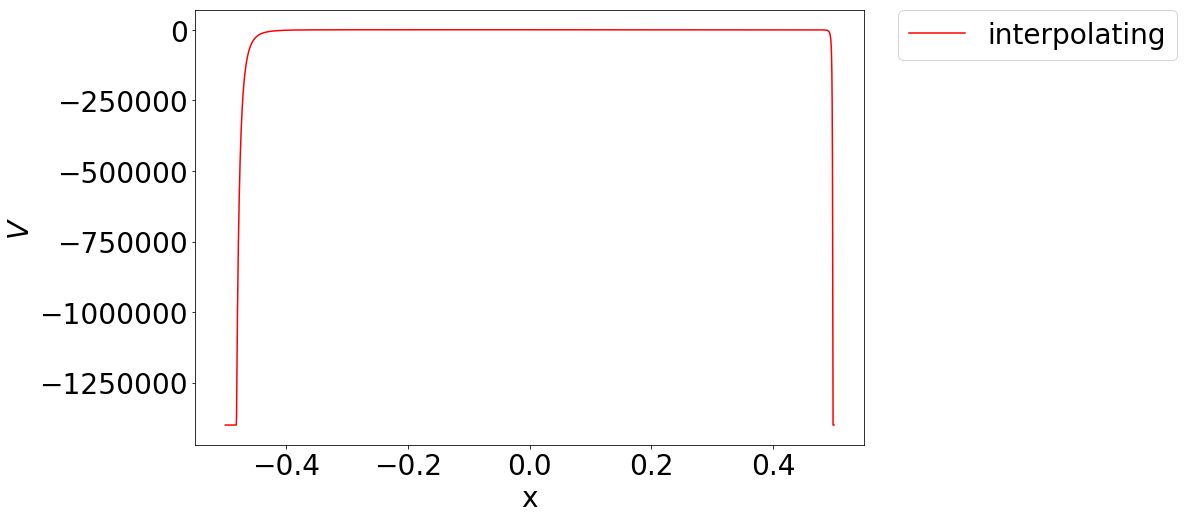

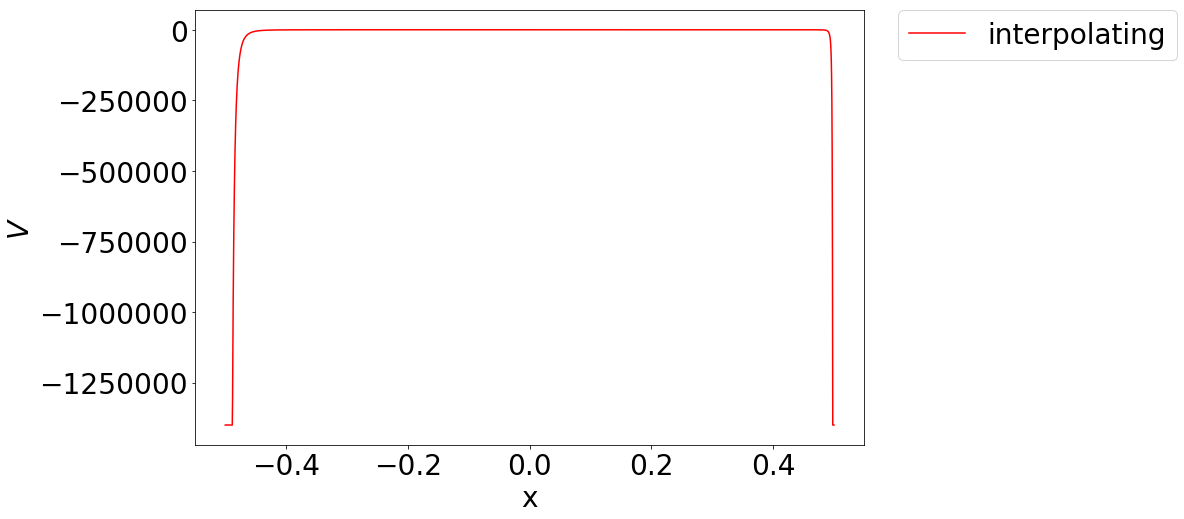

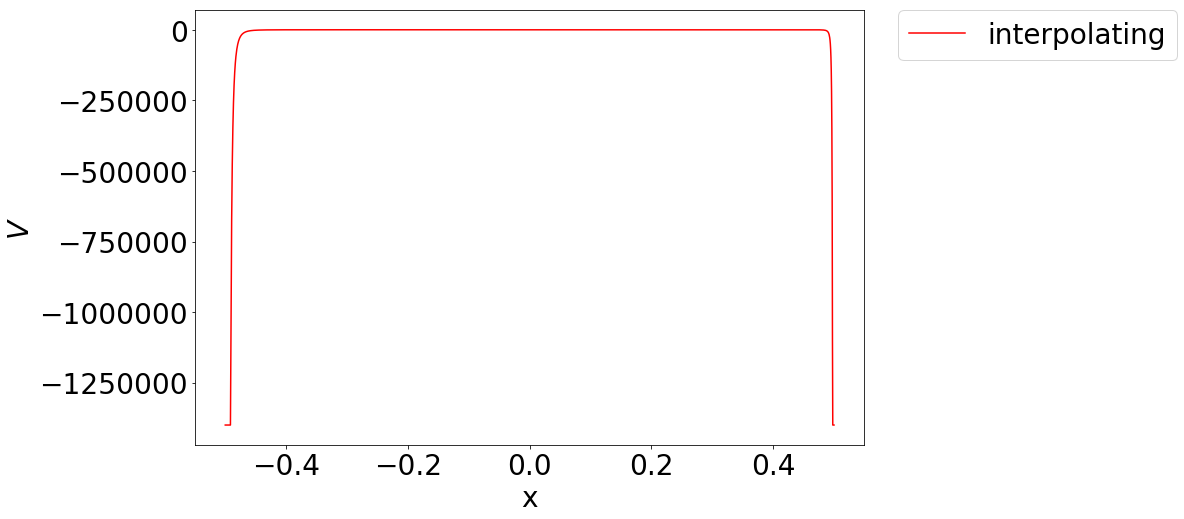

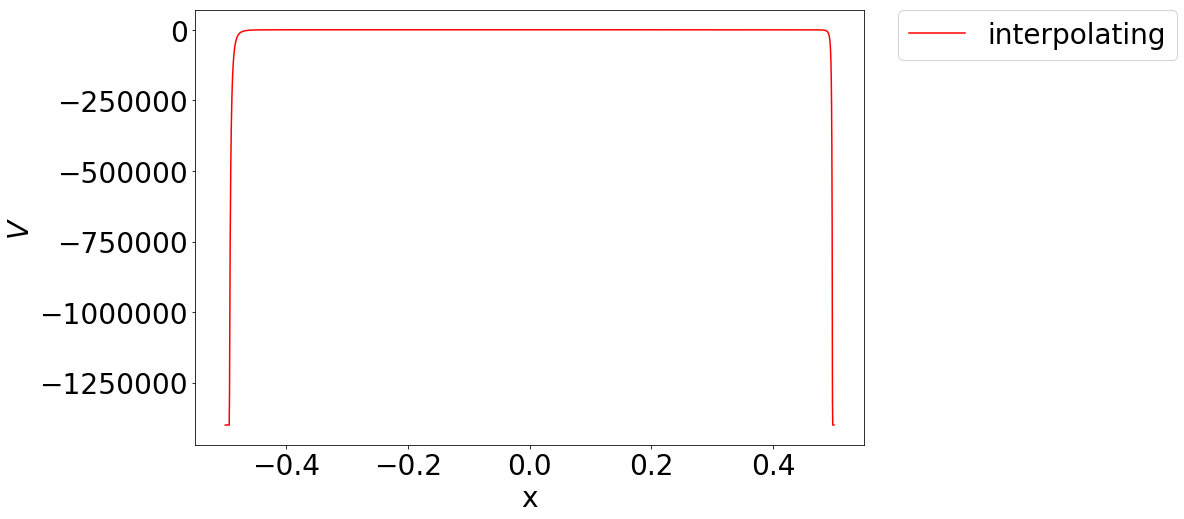

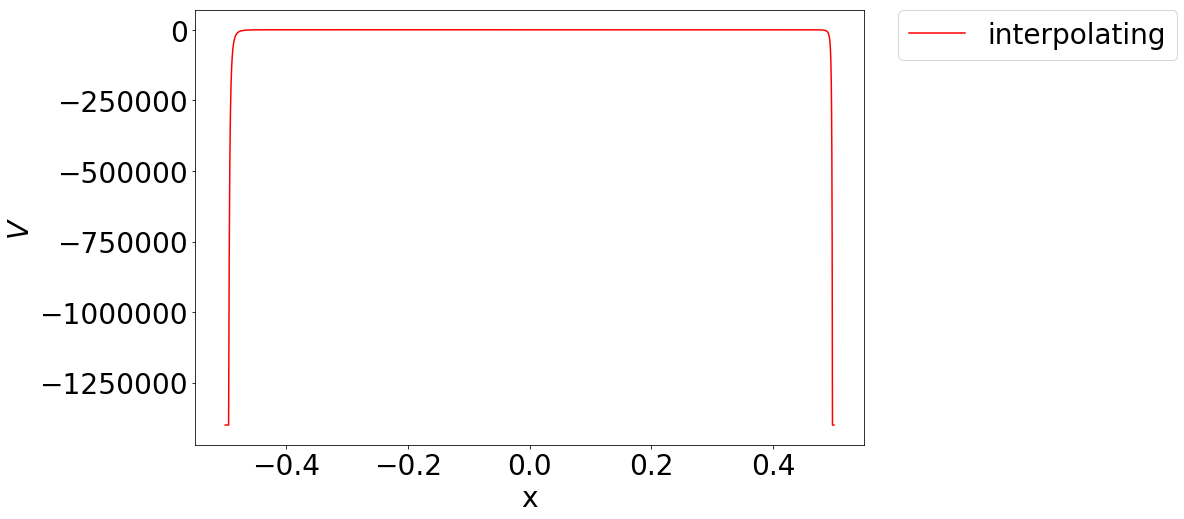

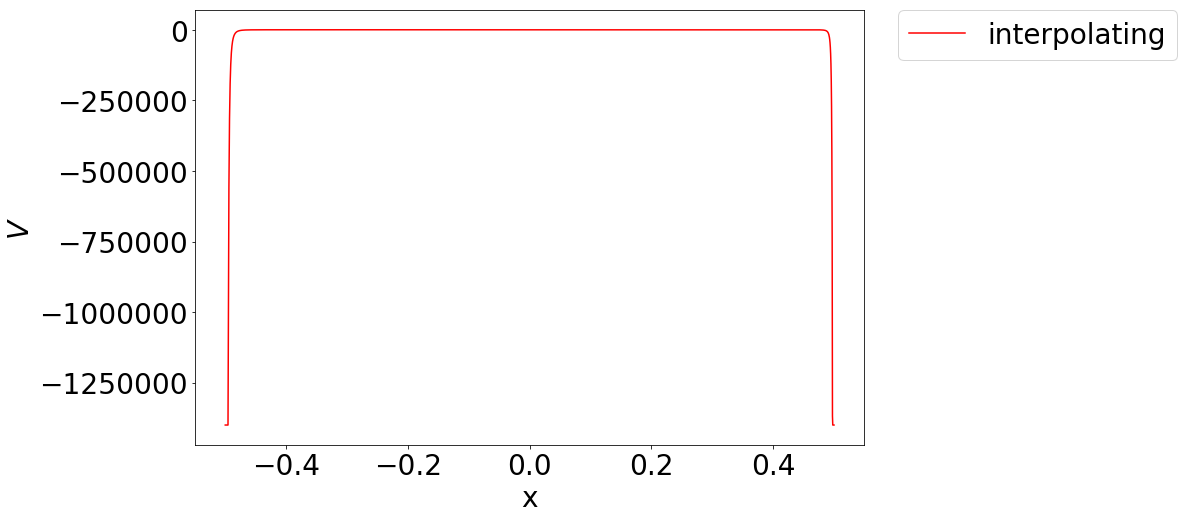

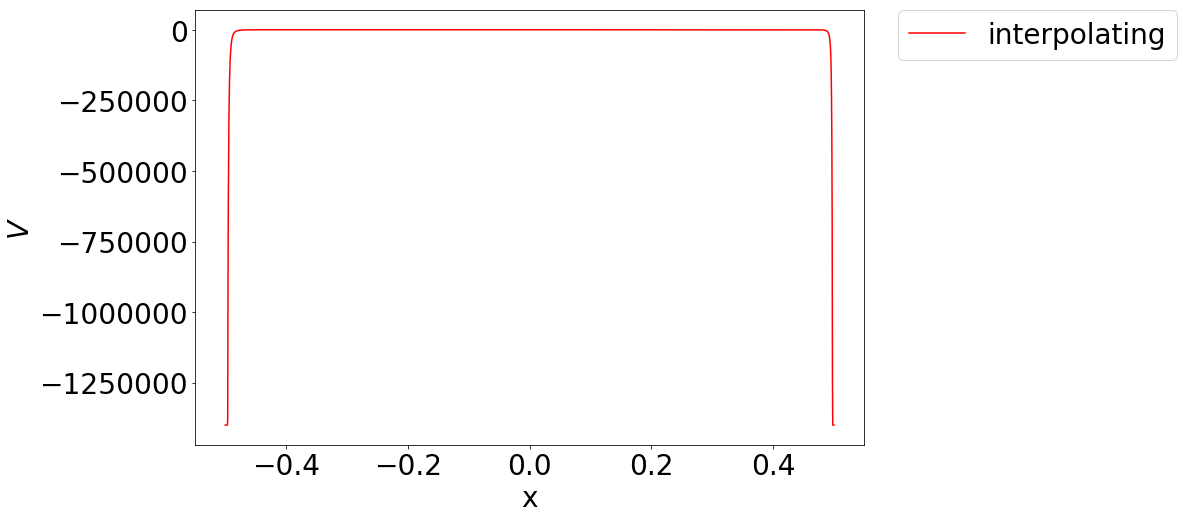

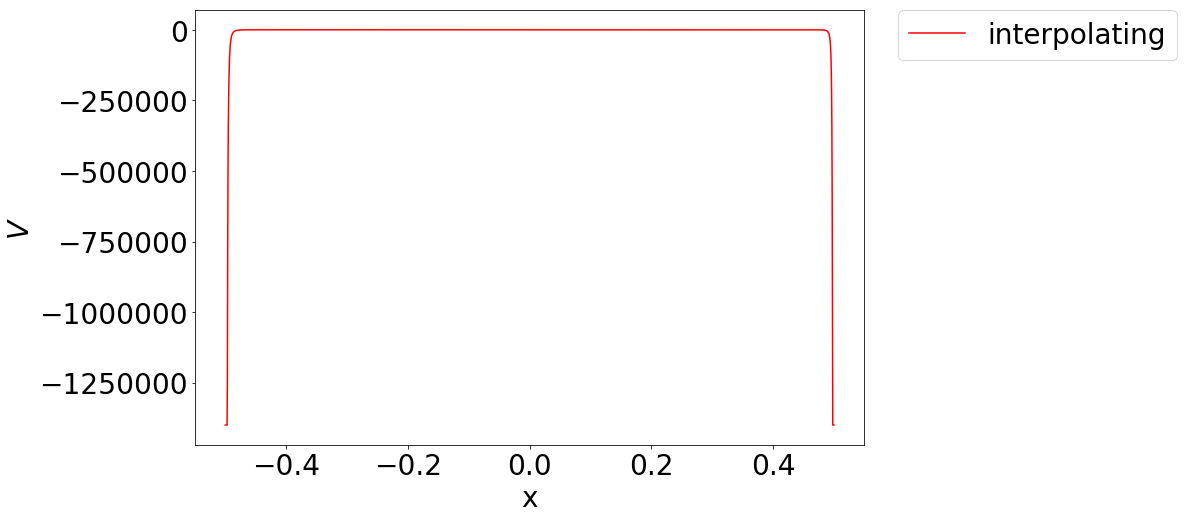

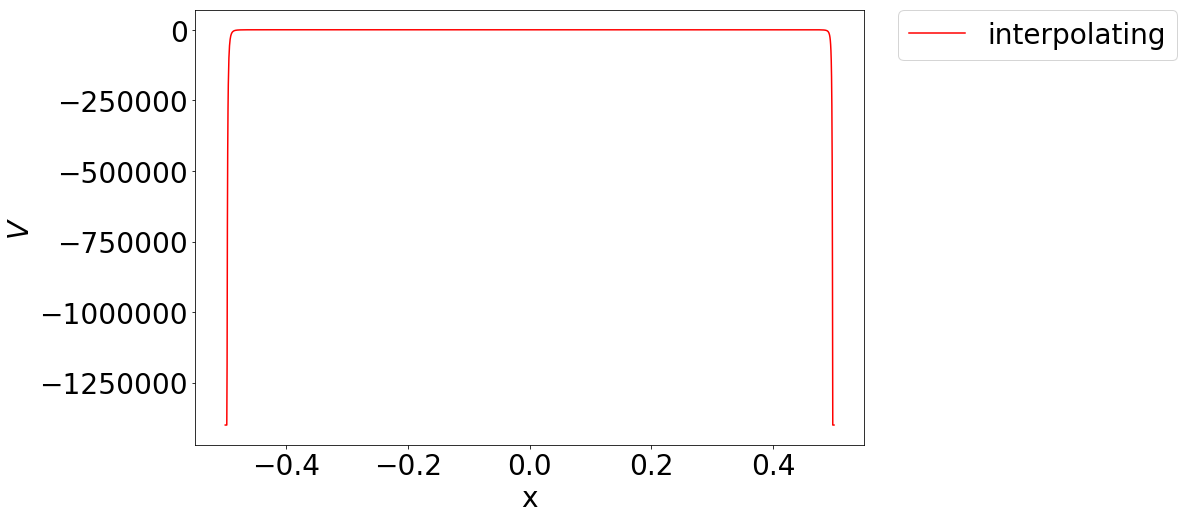

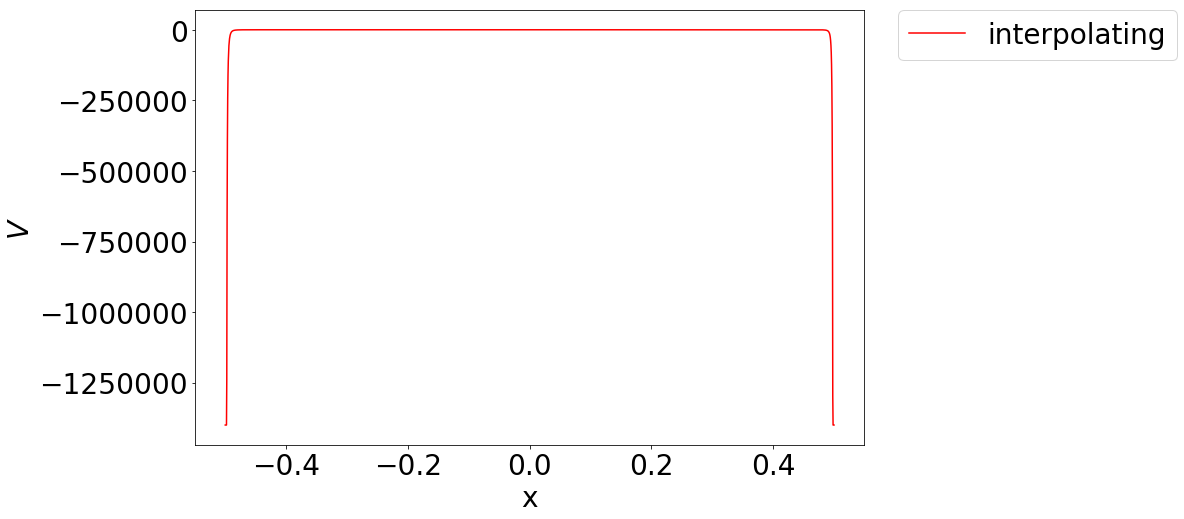

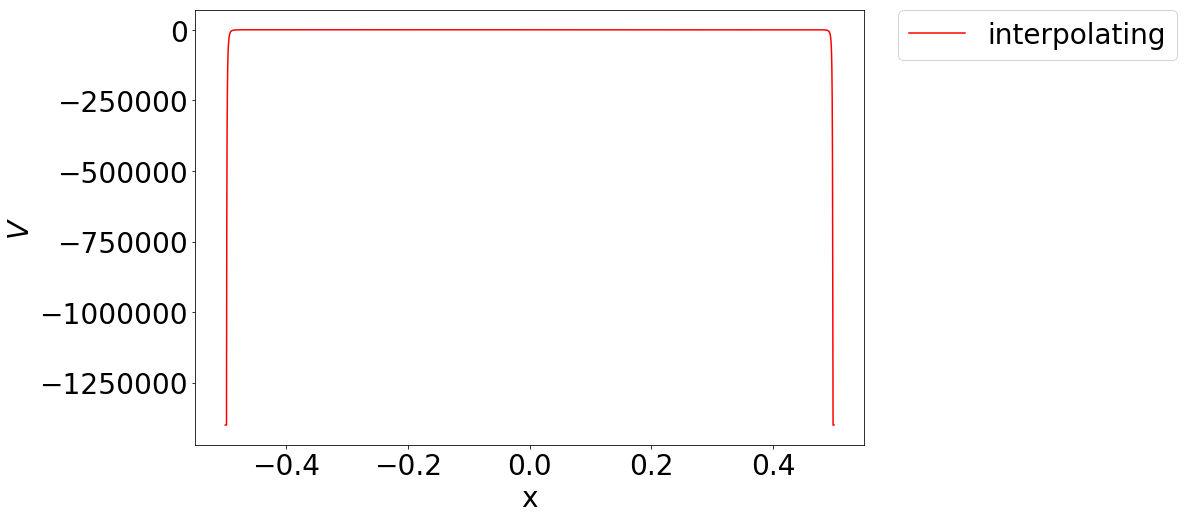

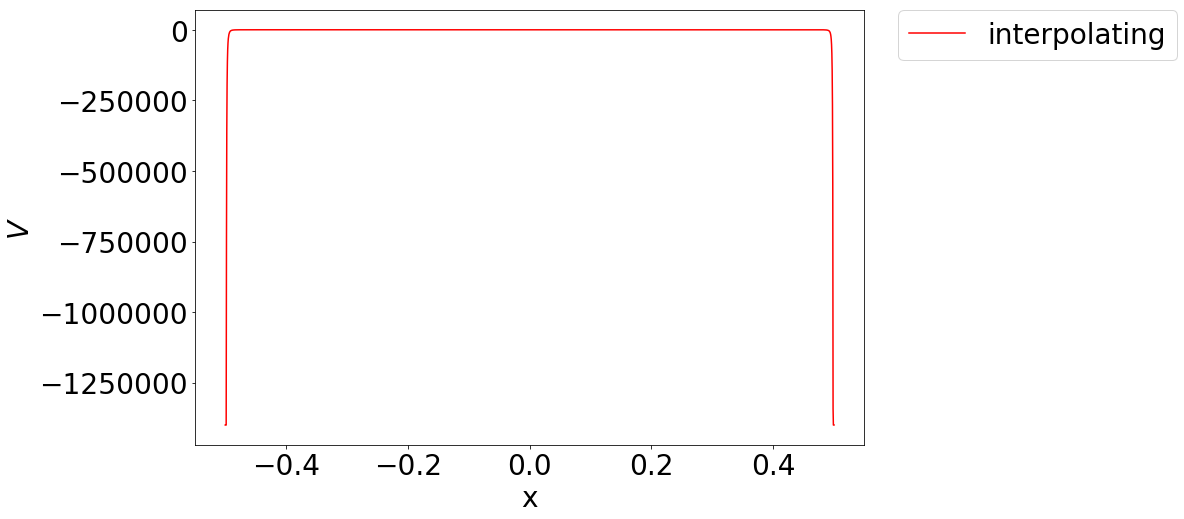

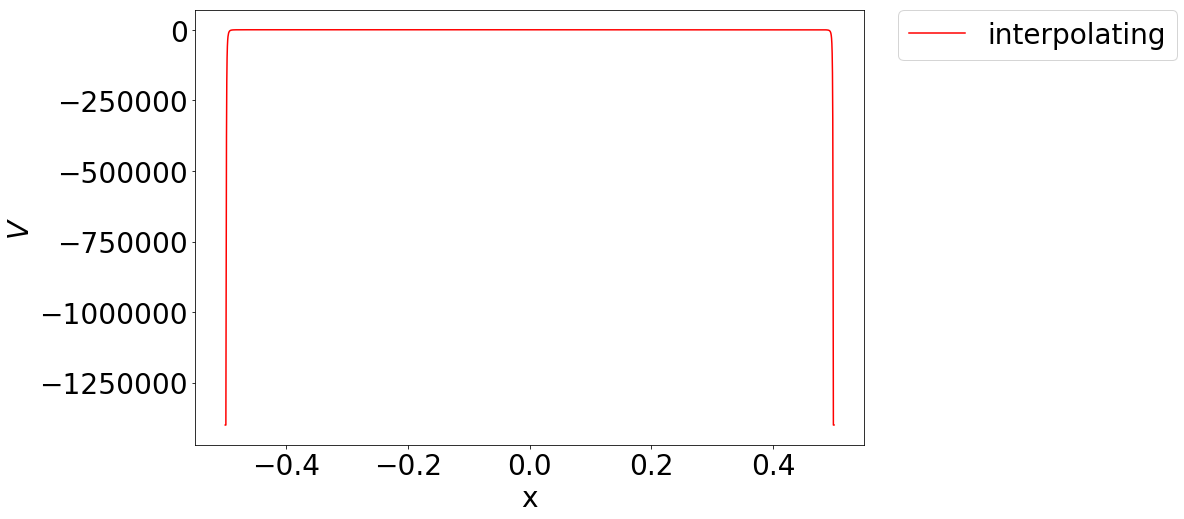

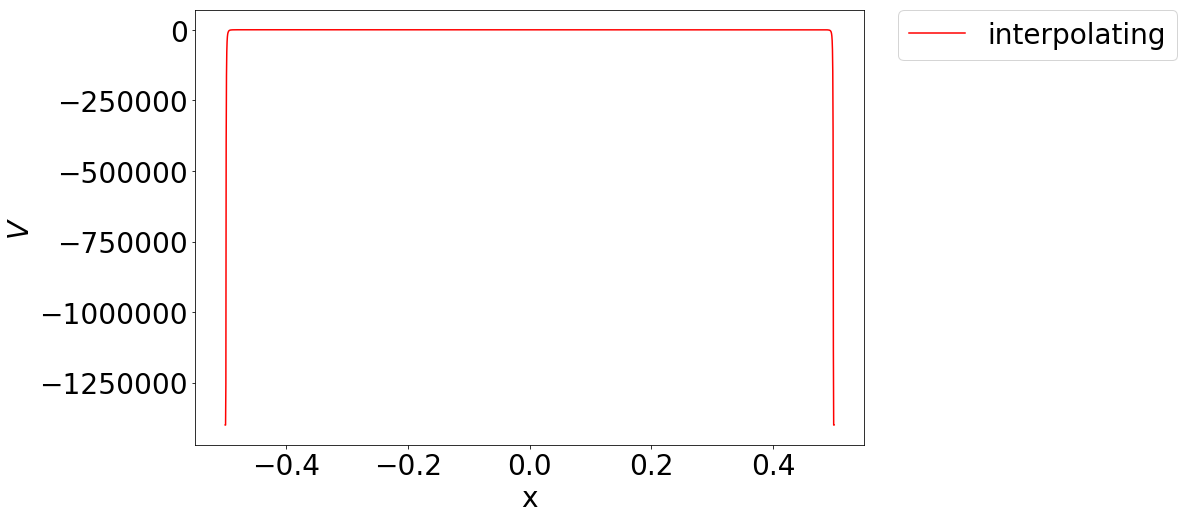

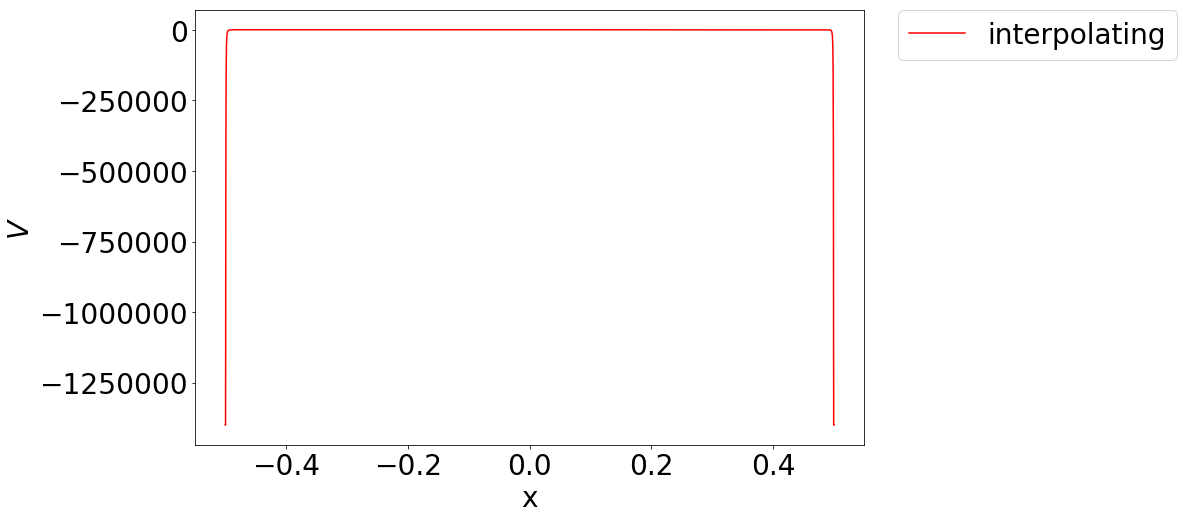

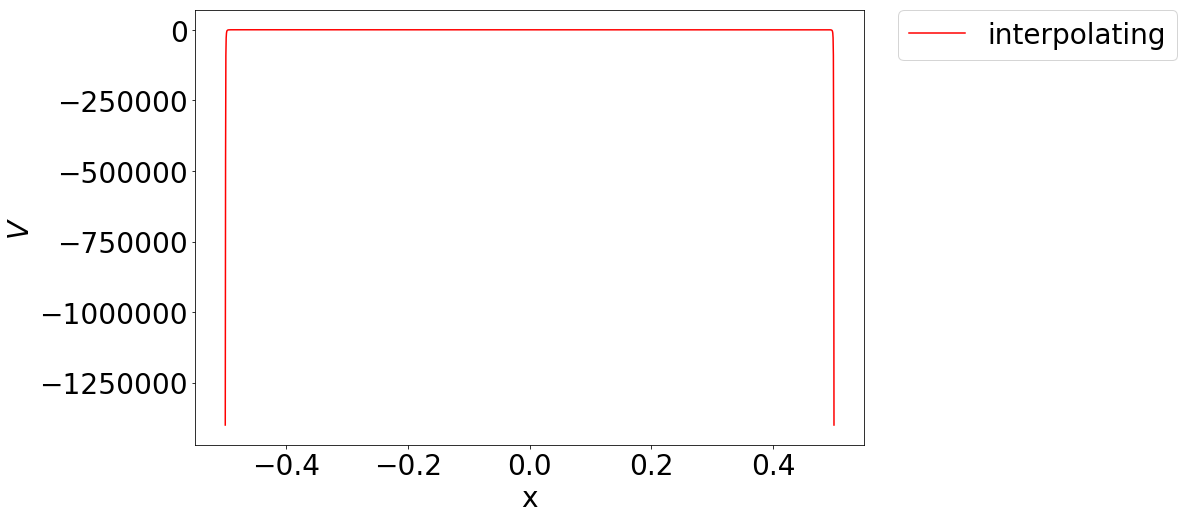

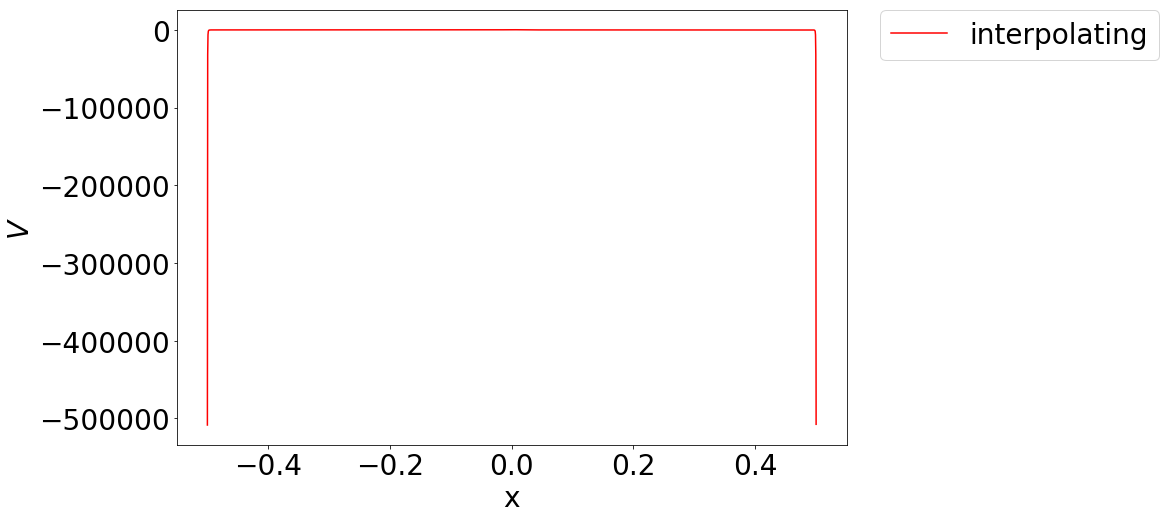

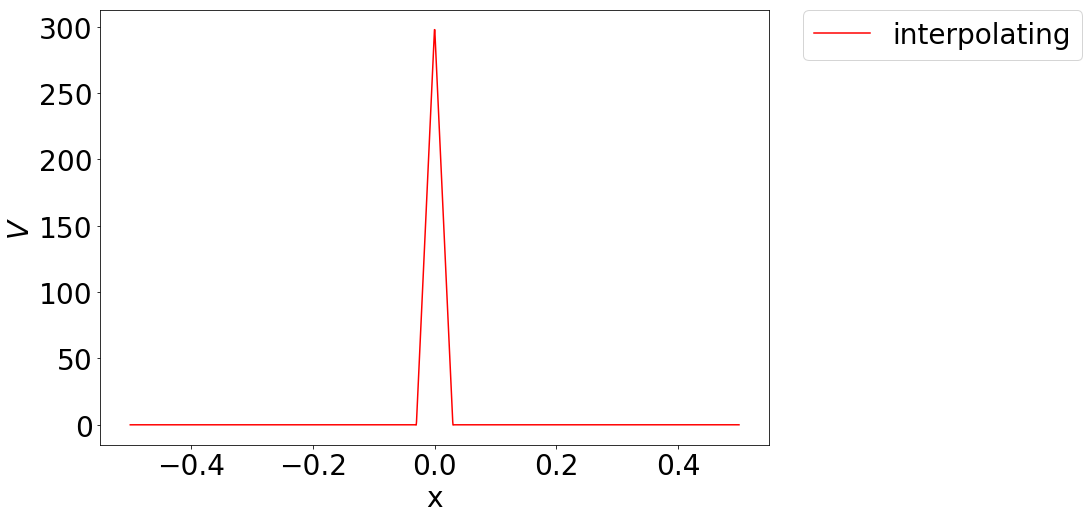

In [40]:
slices=40
for i in range(0,slices):
    #title("Interpolating function for the state density")
    ylabel(r"$V$")
    xlabel("x")
    #ylim([-500,500])
    #xlim([-0.7,0.7])
    plot(xvec,VR[int(i*(size(t)-1)/(slices-1)),:],label="interpolating",c='r')
    legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    show()

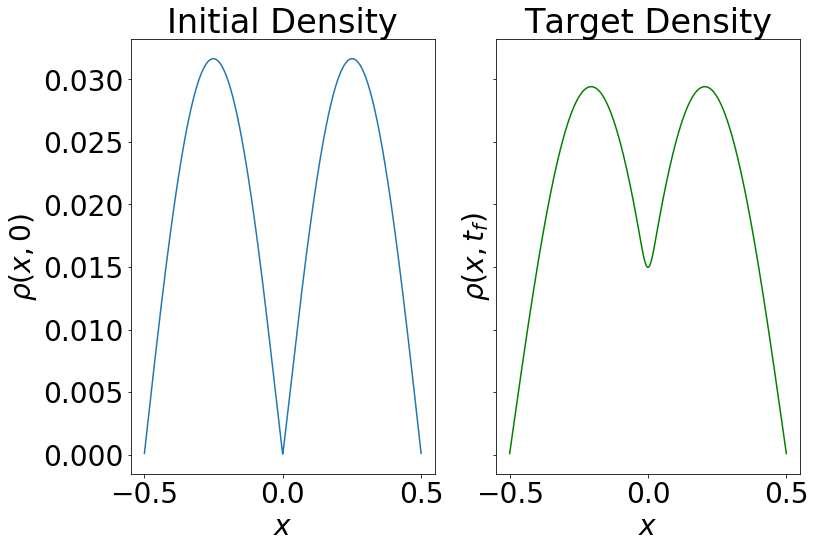

In [41]:
rhoR=ShortcutR(xvec,(valuesI[1].T)[1],(valuesI[1].T)[0],(valuesI[0].T)[1],(valuesI[0].T)[0], eta)

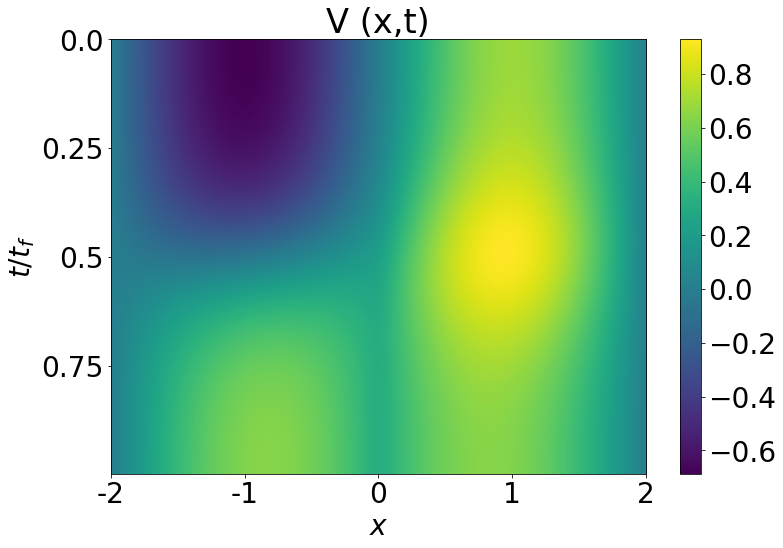

In [42]:
bounds=1
plt.imshow(rhoR[:,bounds:-bounds], interpolation='nearest', aspect='auto')
plt.title('V (x,t)')
plt.ylabel(r'$t/t_{f}$')
plt.xlabel(r'$x$') 
plt.xticks(arange(0,(shape(V)[1]-2*bounds+1),(shape(V)[1]-2*bounds)/4),arange(-2,4))
plt.yticks(arange(0,shape(V)[0],shape(V)[0]/4.0),linspace(0,1,5))
plt.colorbar()

plt.show()

(501, 2000) (501, 2000) (501, 2000)


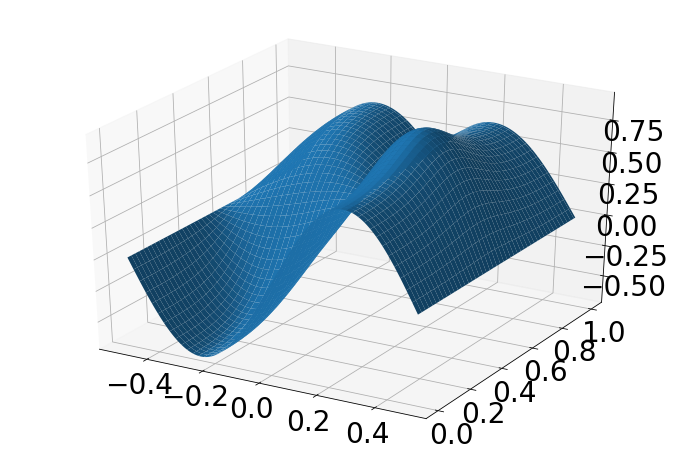

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X,Y= meshgrid(linspace(-0.5,0.5,shape(rhoR)[1]),linspace(0,1,shape(rhoR)[0]))
Z=rhoR
print(shape(X),shape(Y),shape(Z))

ax.plot_surface(X, Y, Z) 

In [44]:
from scipy import linalg as la
steps=2000

hbar=1.0
m=1.0
W=1.0
d=0.5
cent=-0.0
# divide by two so a well from -W to W is of input width
W=W/2.0
# create x-vector from -W to W
xvec=np.linspace(-W,W+W+d/2.0,steps)
# get step size
h=xvec[1]-xvec[0]
VI=300.0*0.5*((np.sign(xvec+d/2.0-cent))-(np.sign(xvec-d/2.0-cent)))
Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)
        +np.diag(np.ones(steps-1),-1))/(float)(h**2)
    # create Hamiltonian
Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + np.diag(VI)


valuesI=la.eigh(Hamiltonian)

4.54505440089
18.1690298846


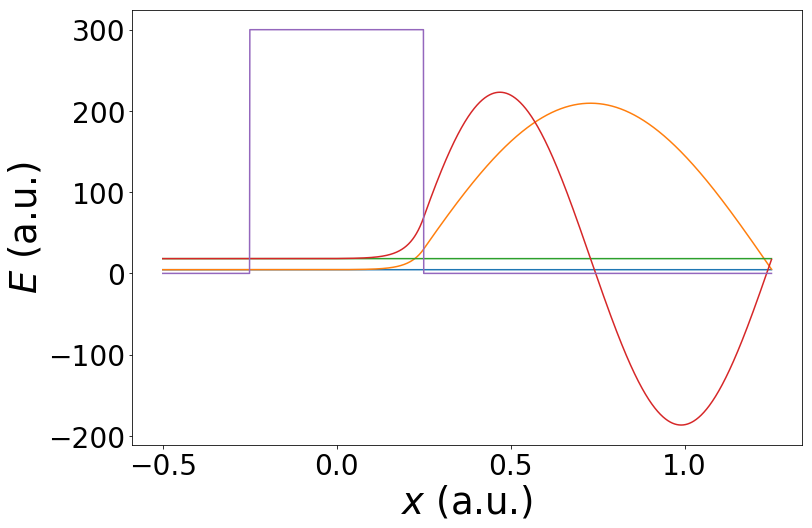

In [45]:
for i in range(0,2):
    
    plot(xvec,valuesI[0][i]*xvec/xvec)
    plot(xvec,(valuesI[1].T)[i]/0.0002+valuesI[0][i])
    

    print(valuesI[0][i])
plot(xvec,VI)
ylabel("$E$ (a.u.)",size=37)
xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 28})

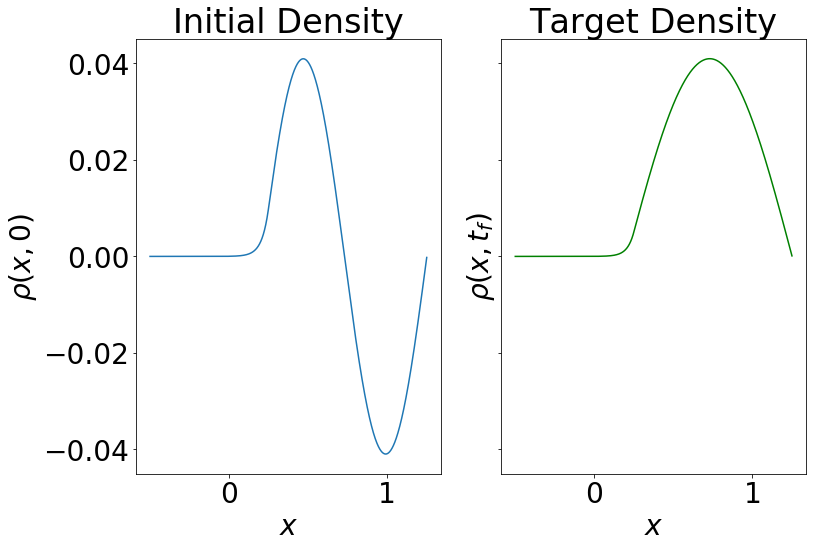

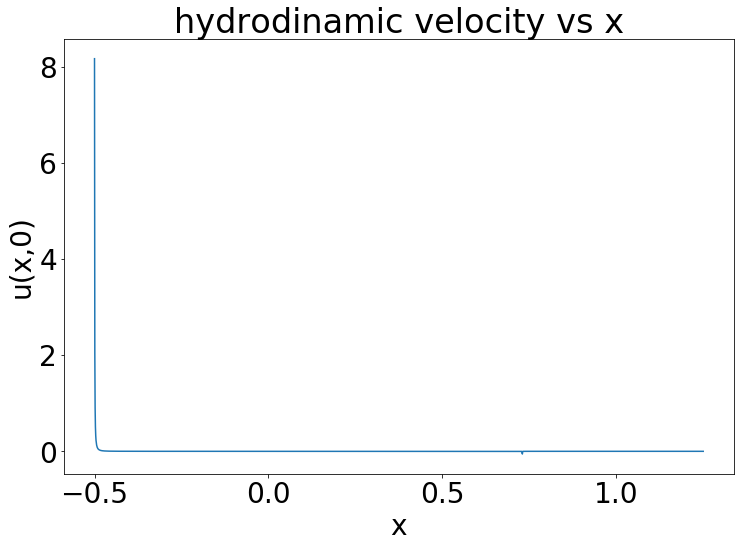

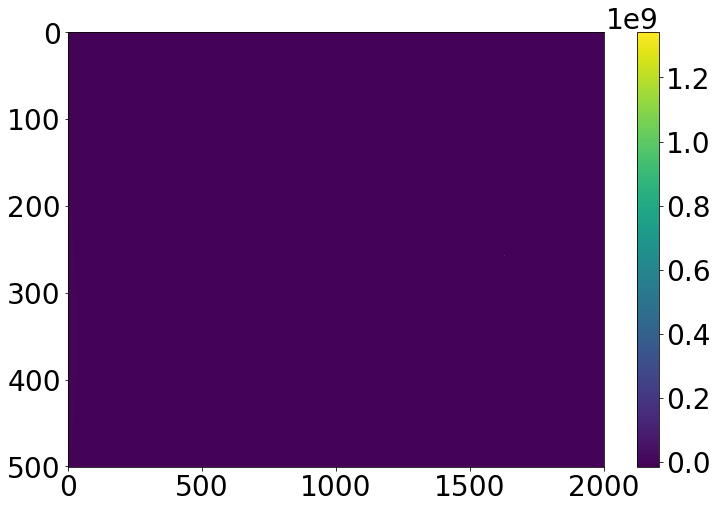

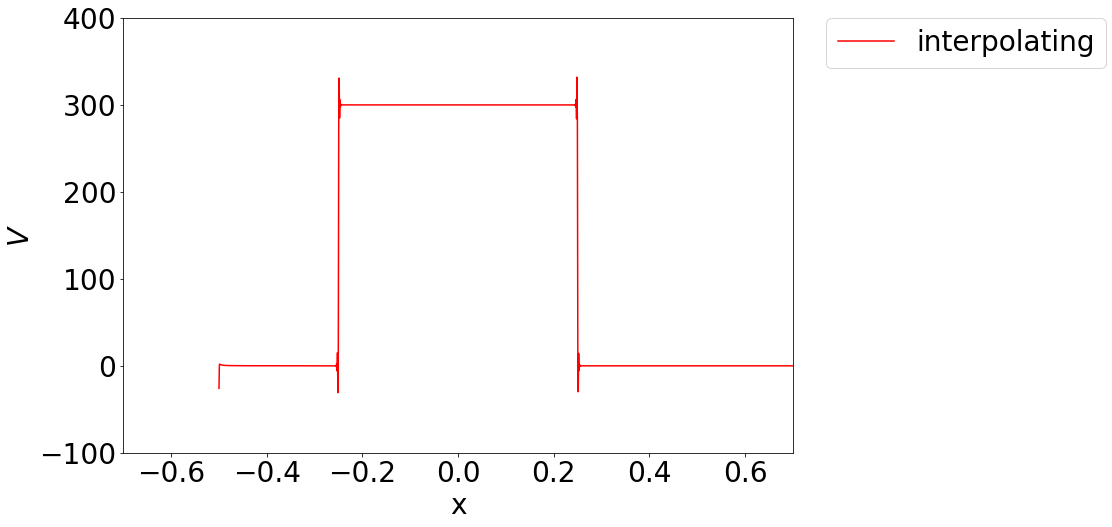

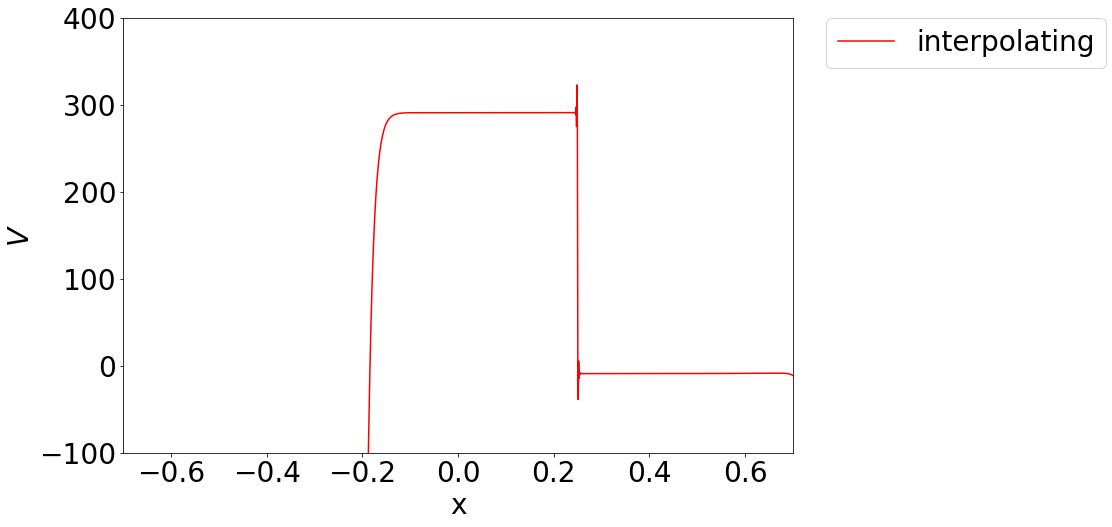

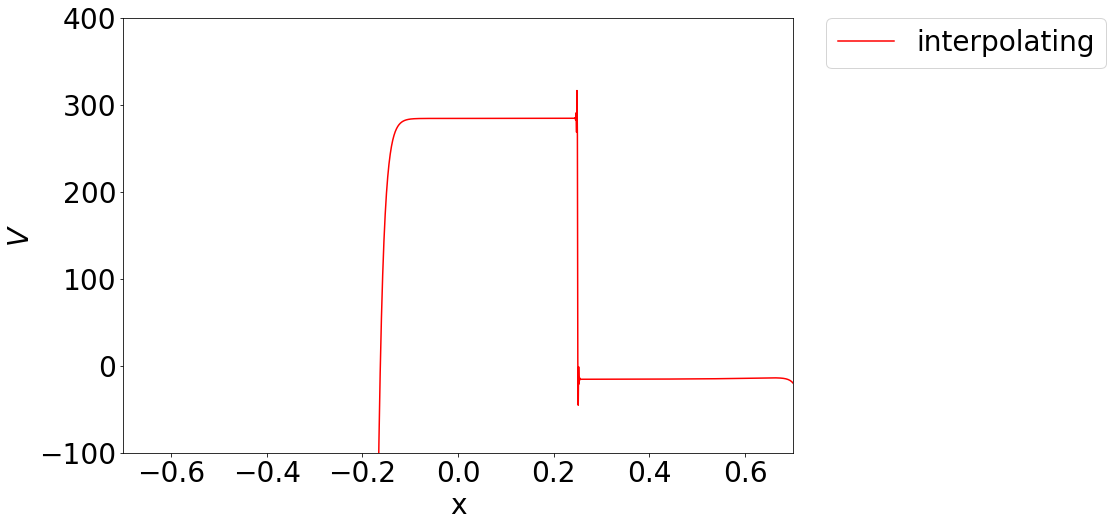

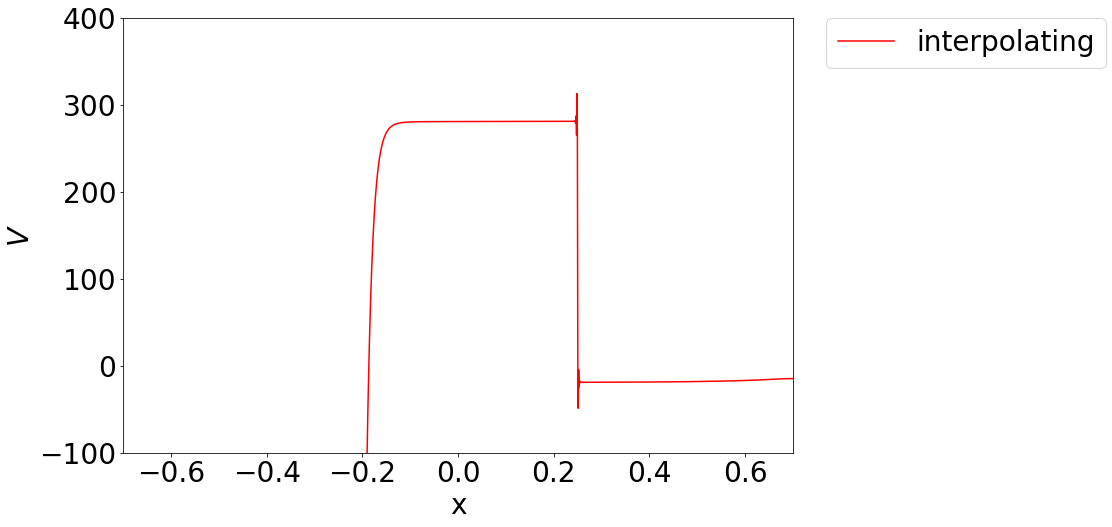

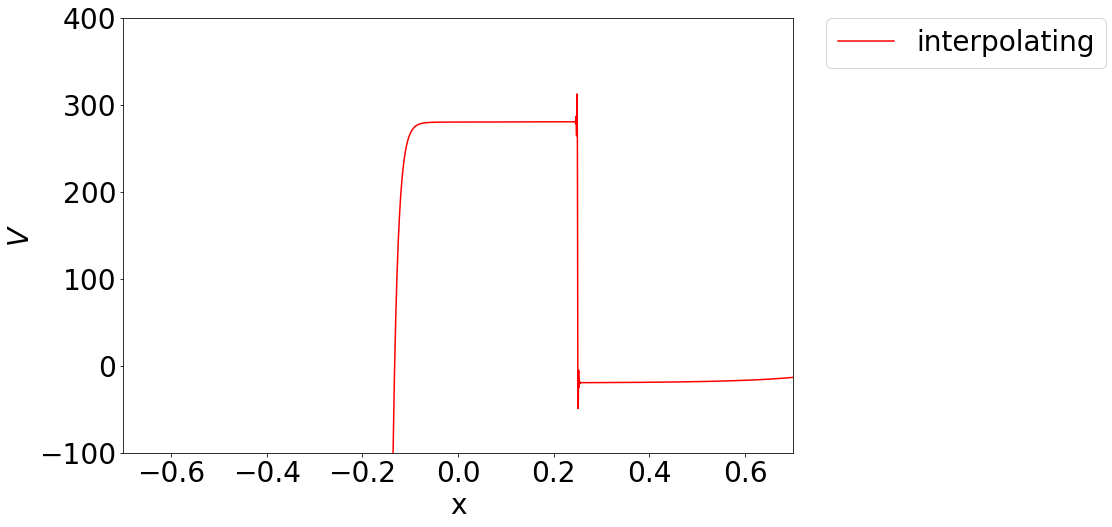

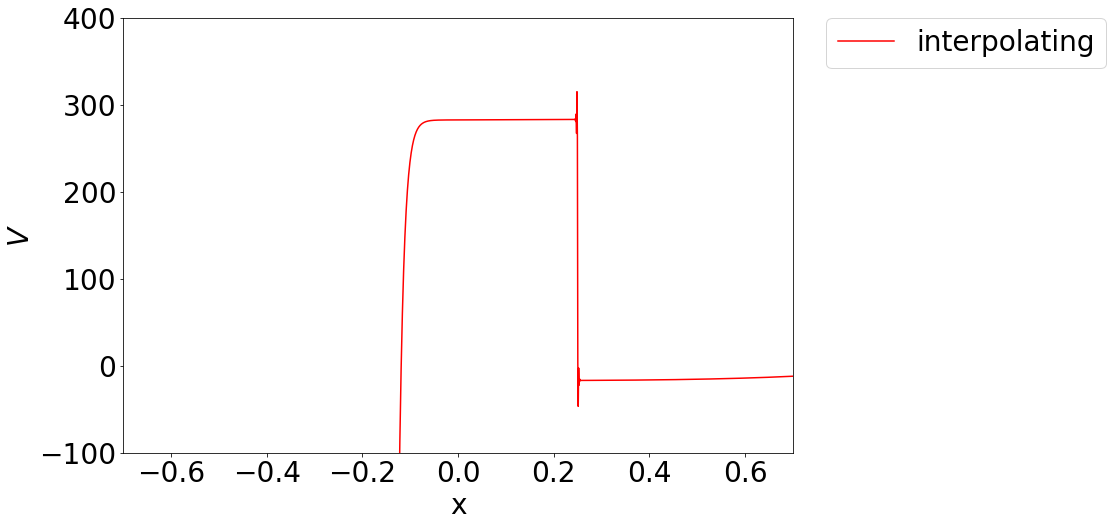

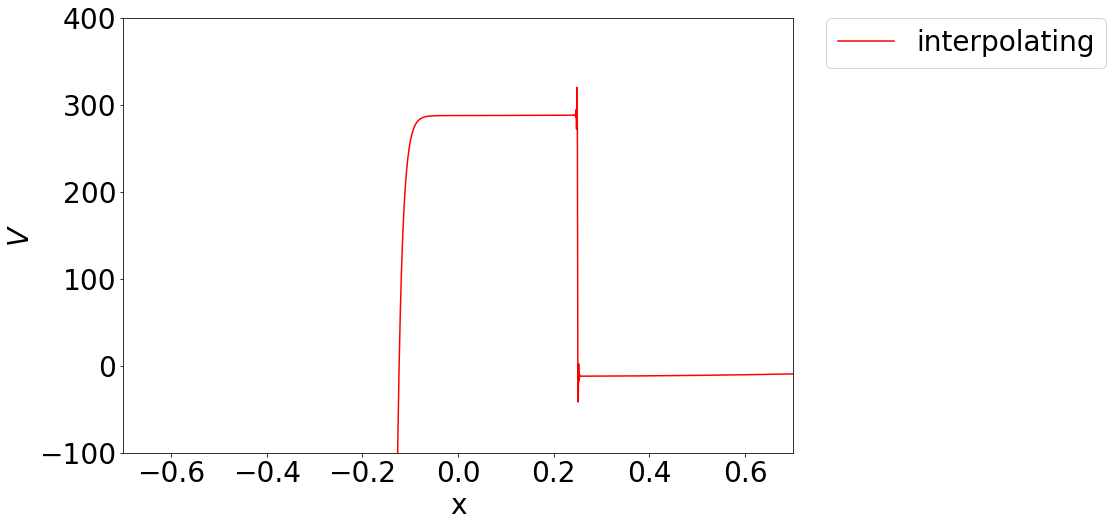

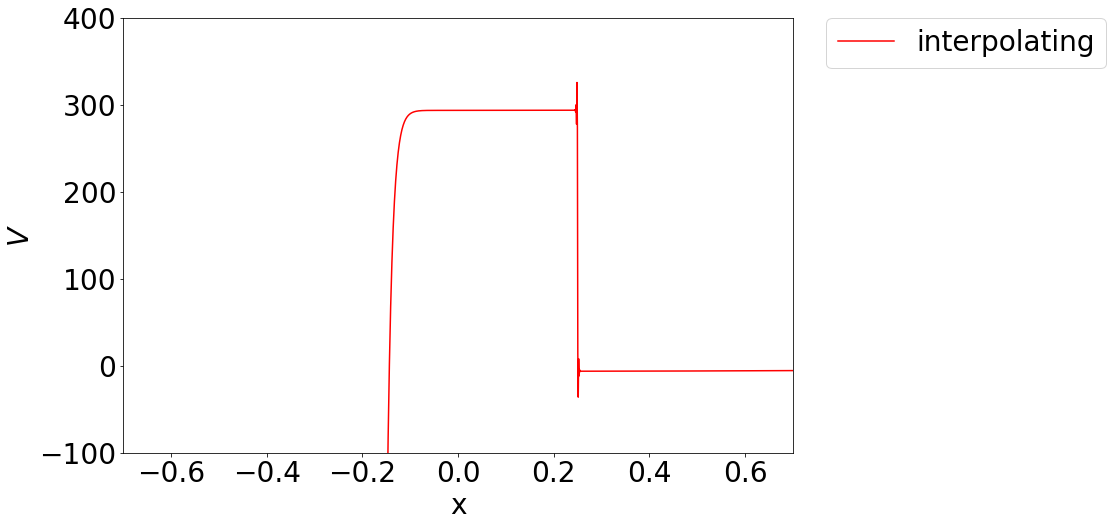

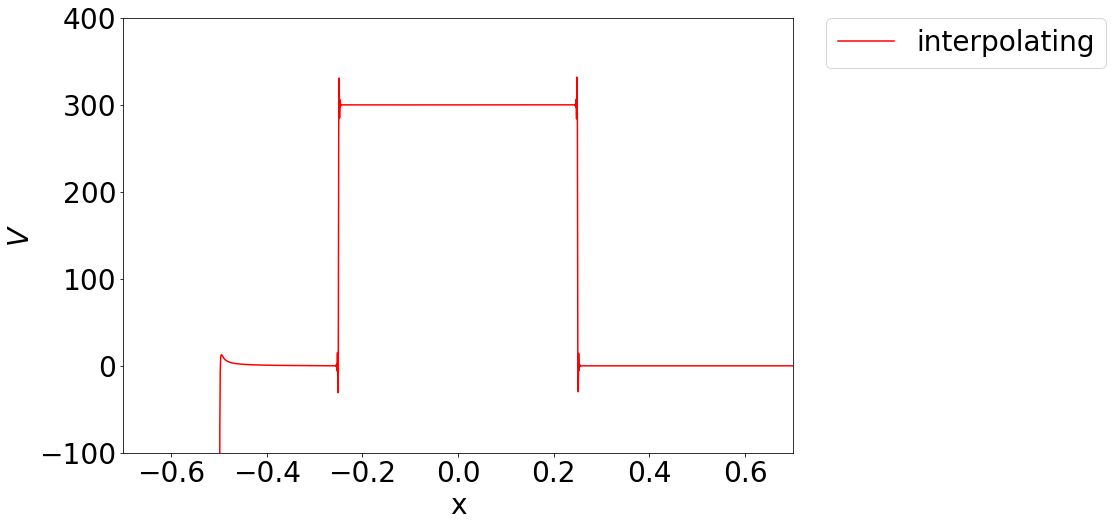

In [46]:

VR=Shortcut(xvec,(valuesI[1].T)[1],(valuesI[1].T)[0],(valuesI[0].T)[1],(valuesI[0].T)[0], eta)

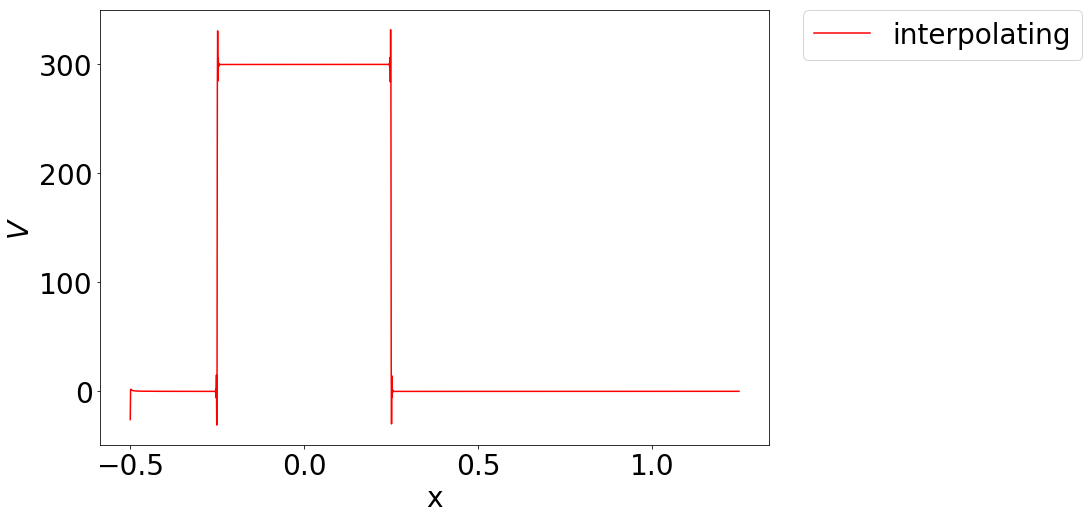

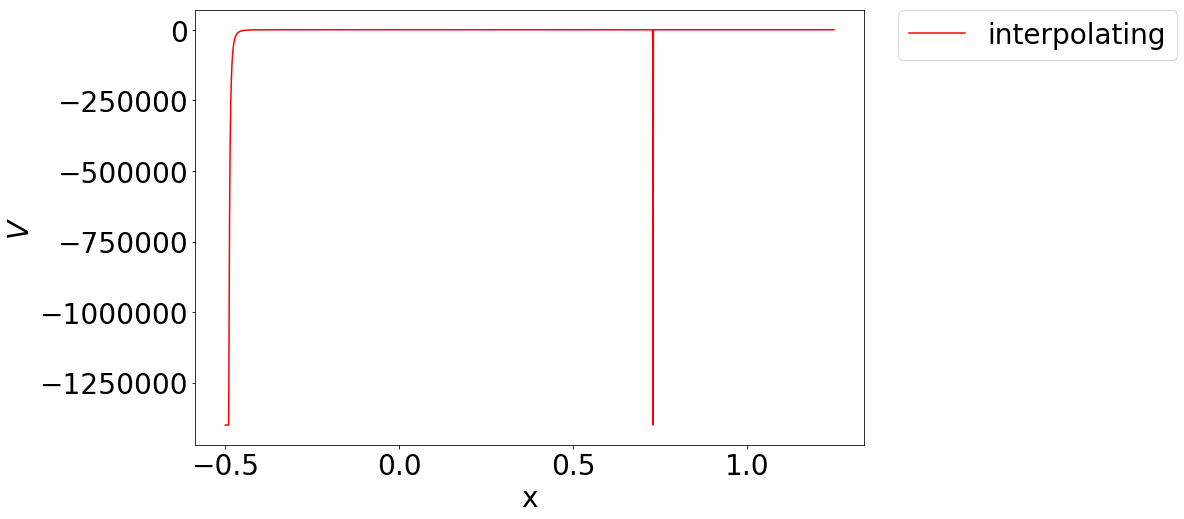

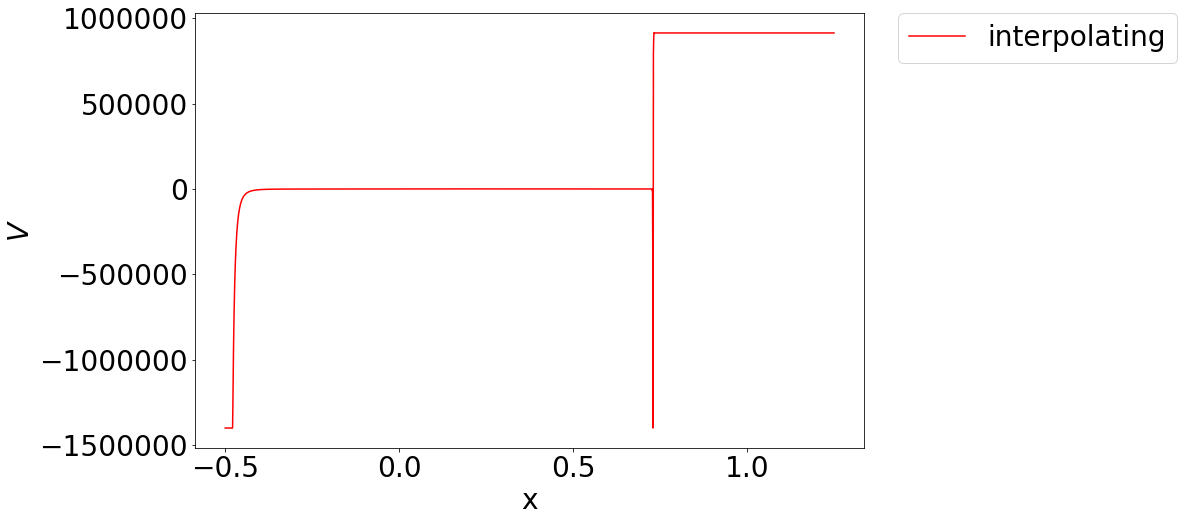

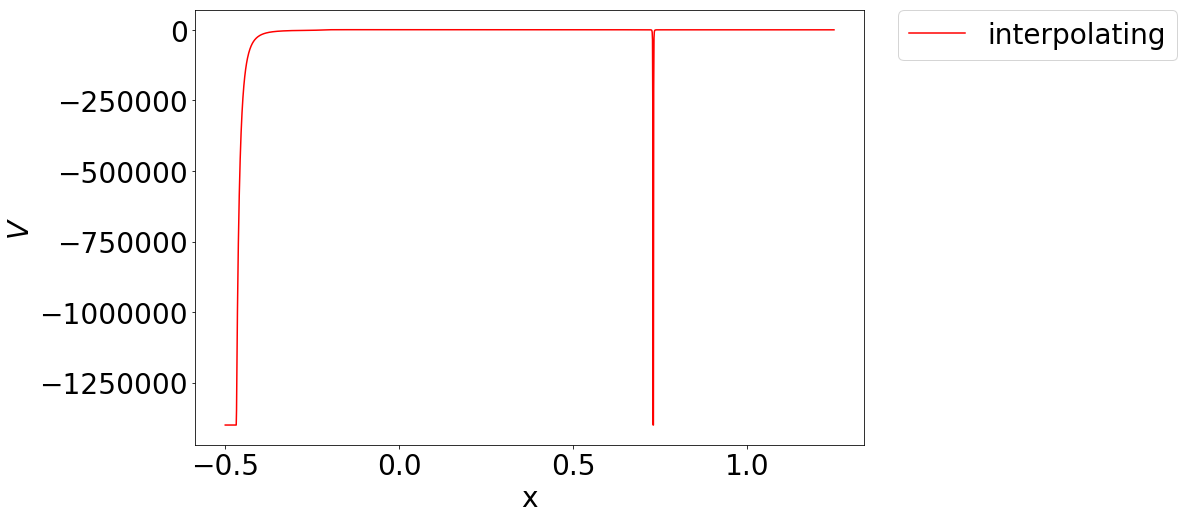

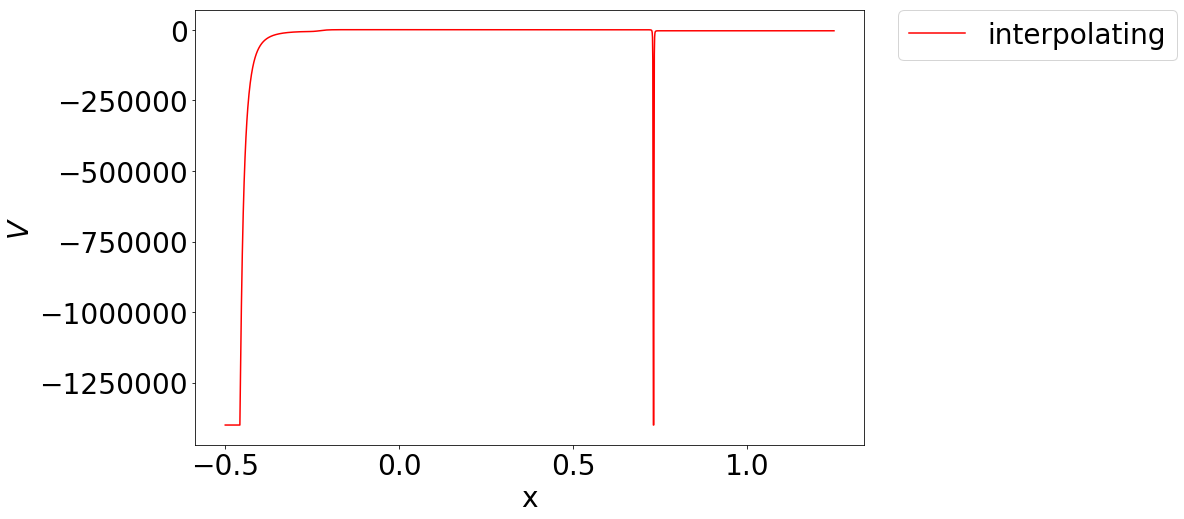

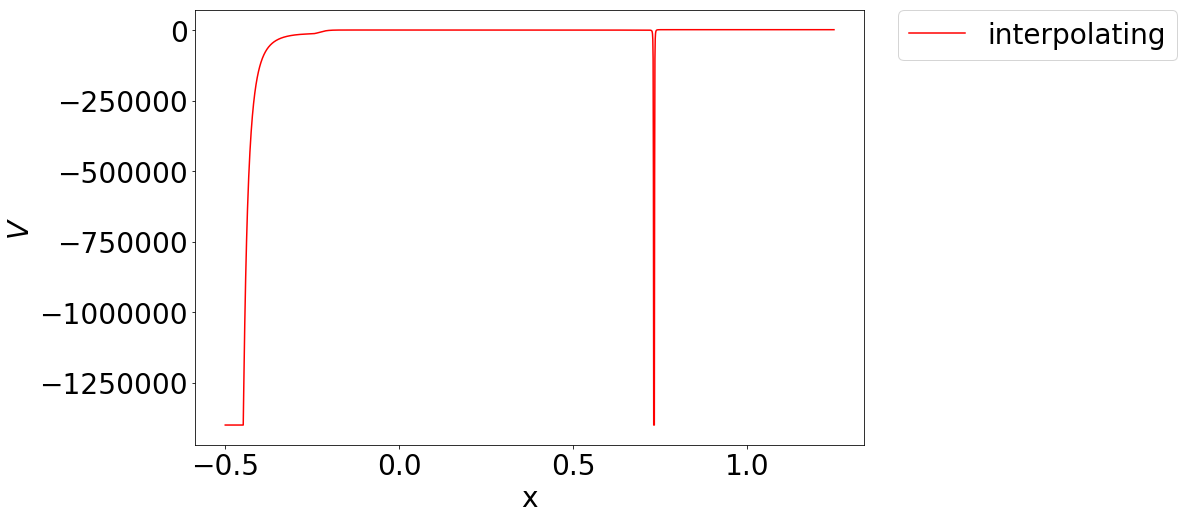

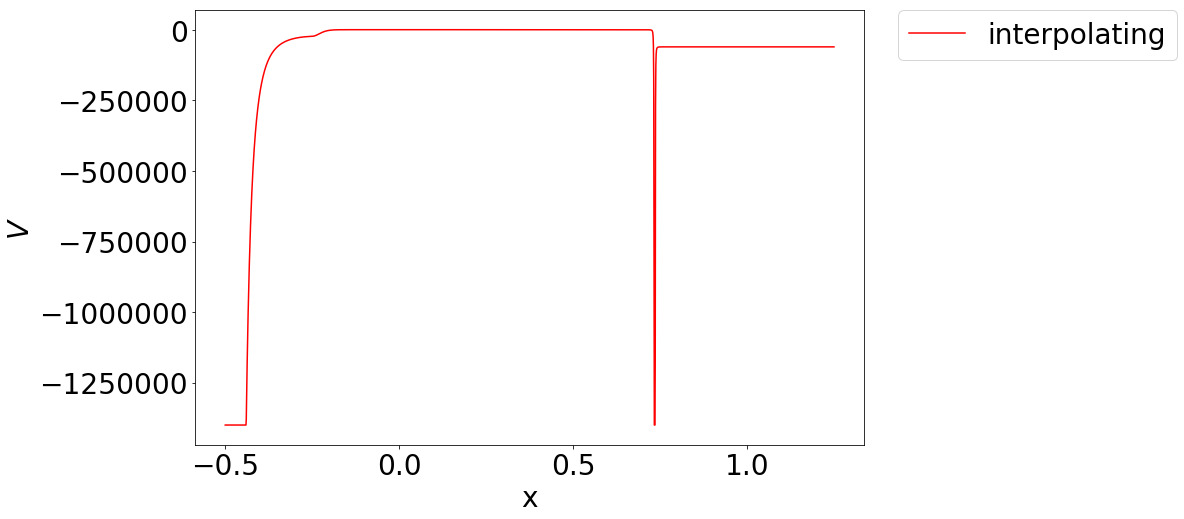

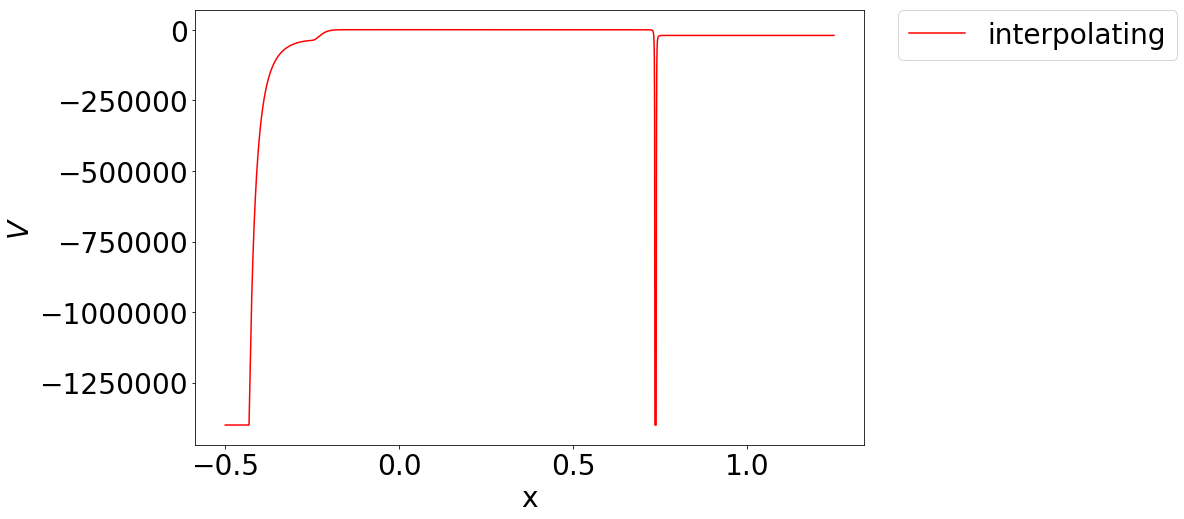

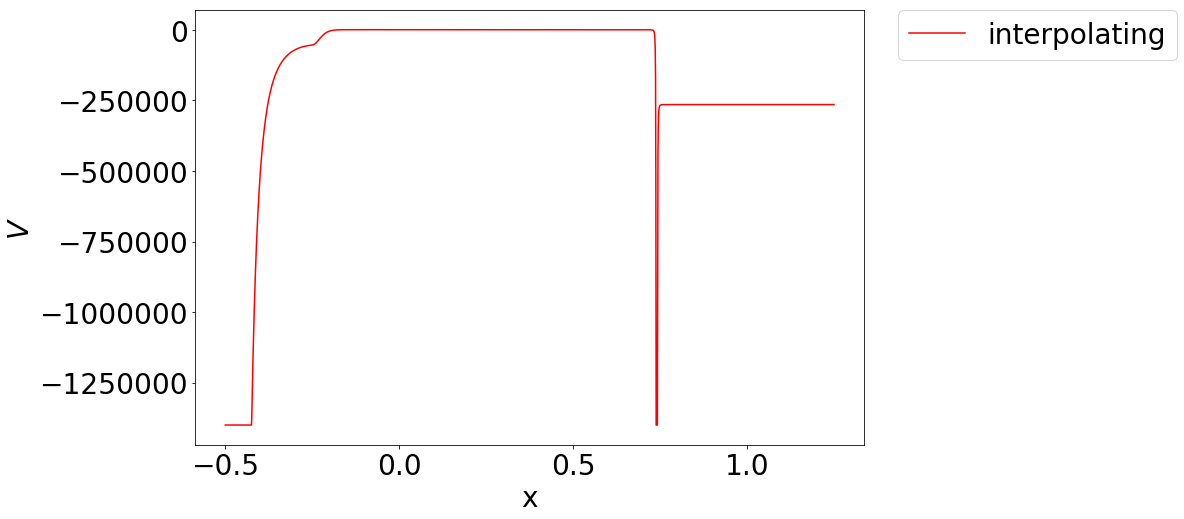

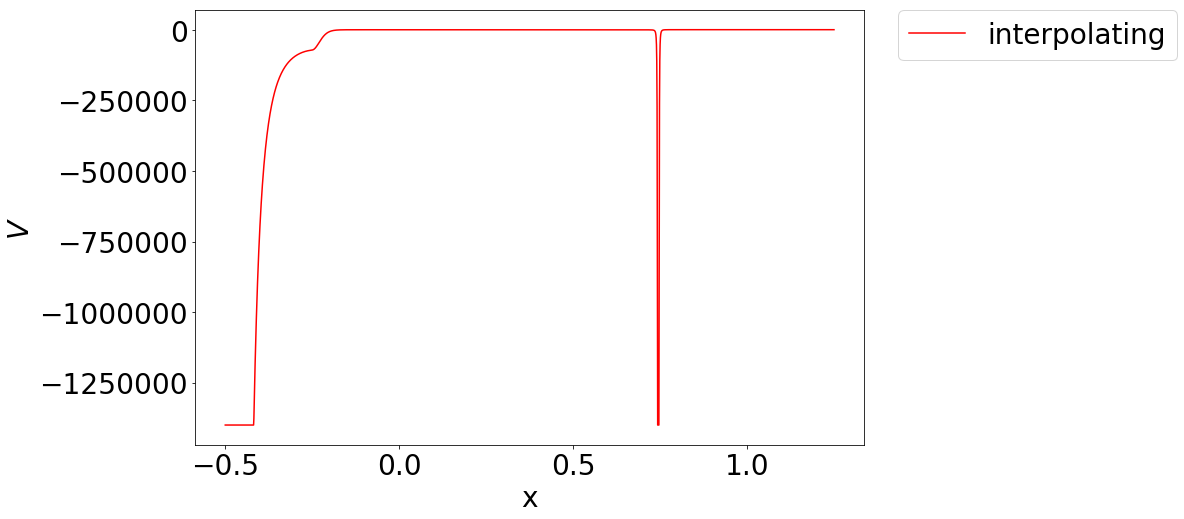

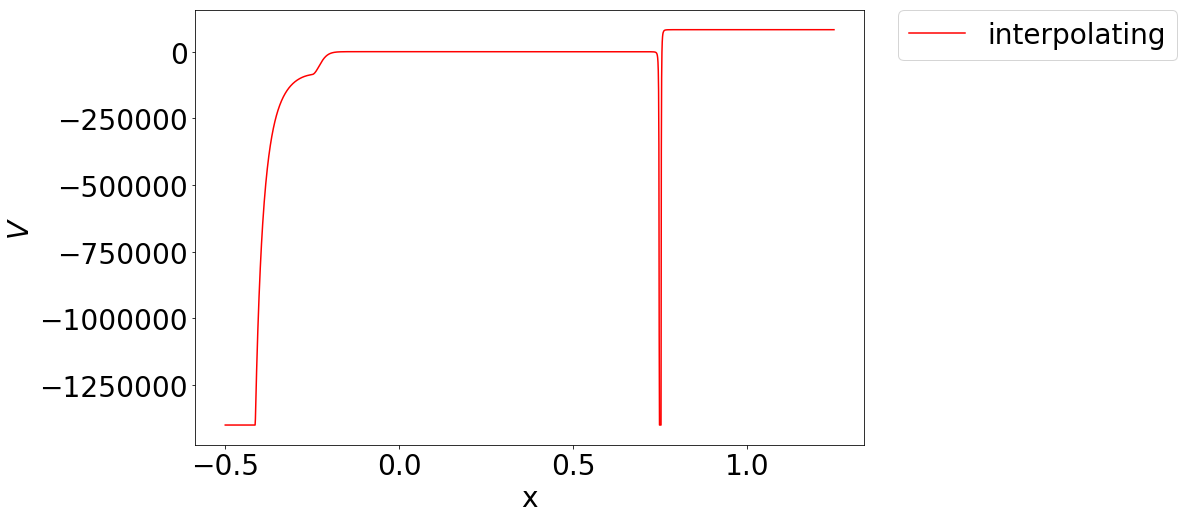

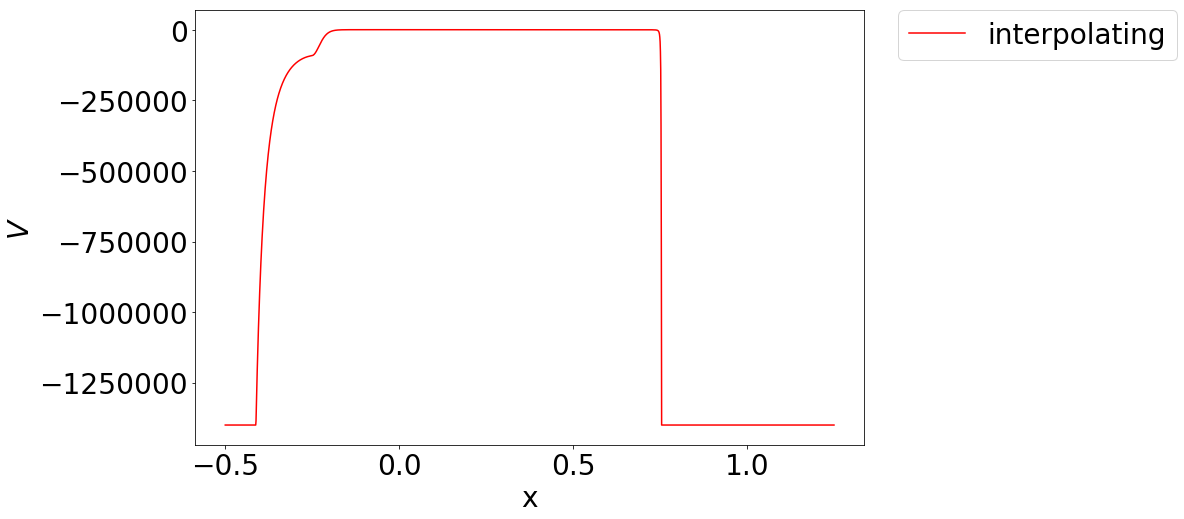

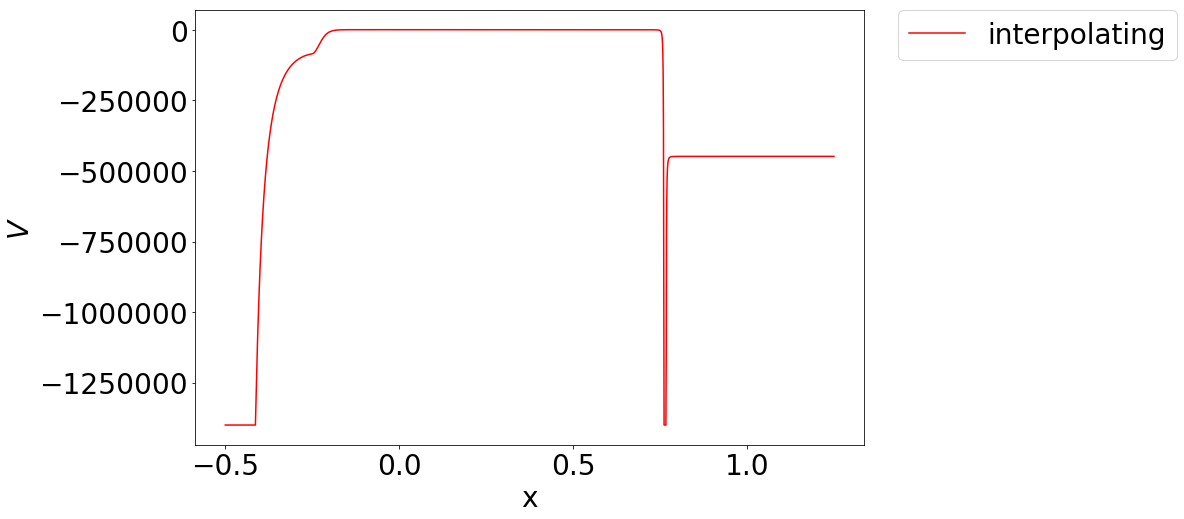

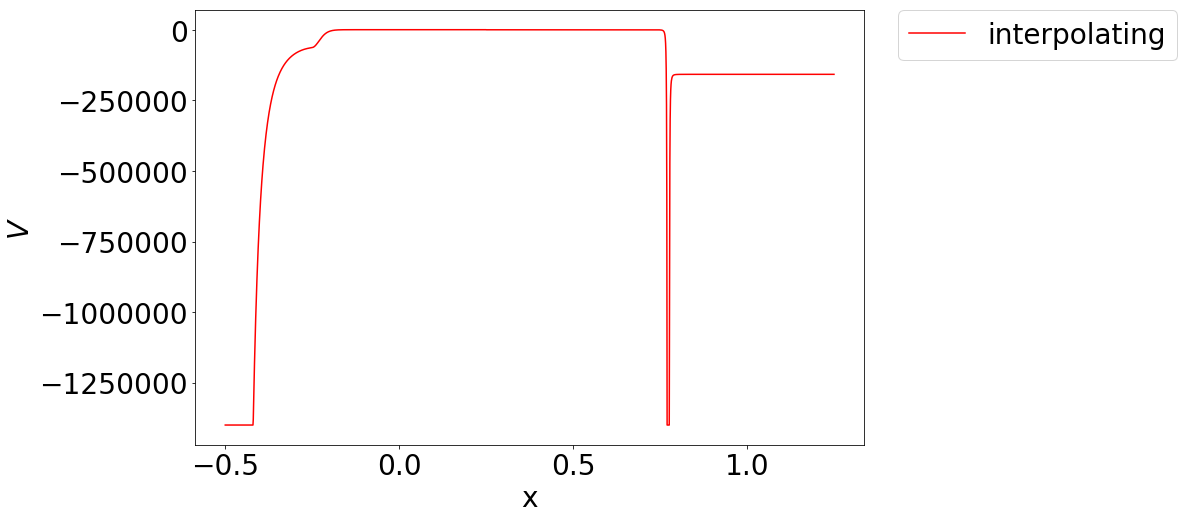

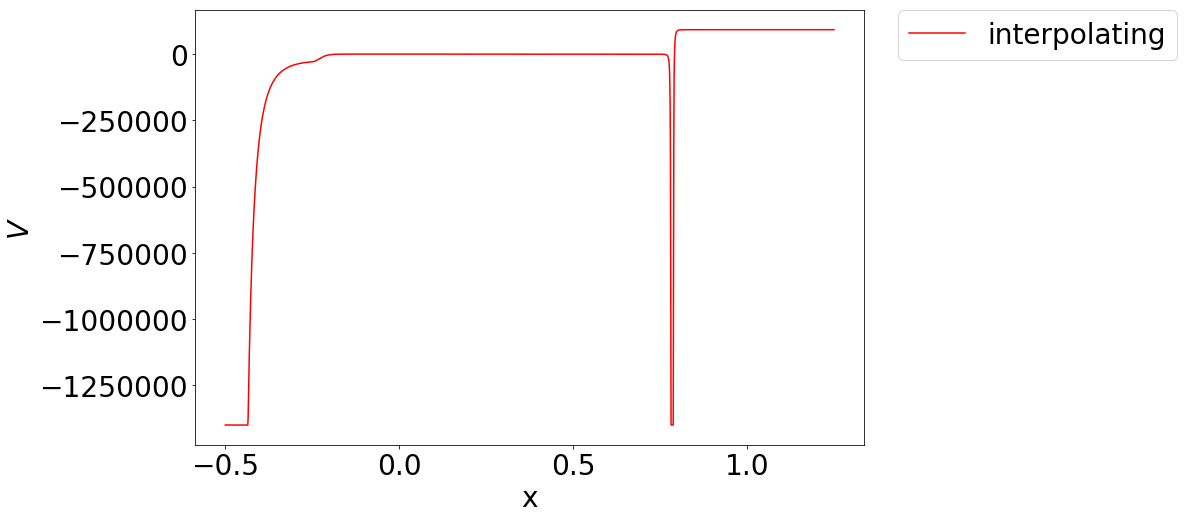

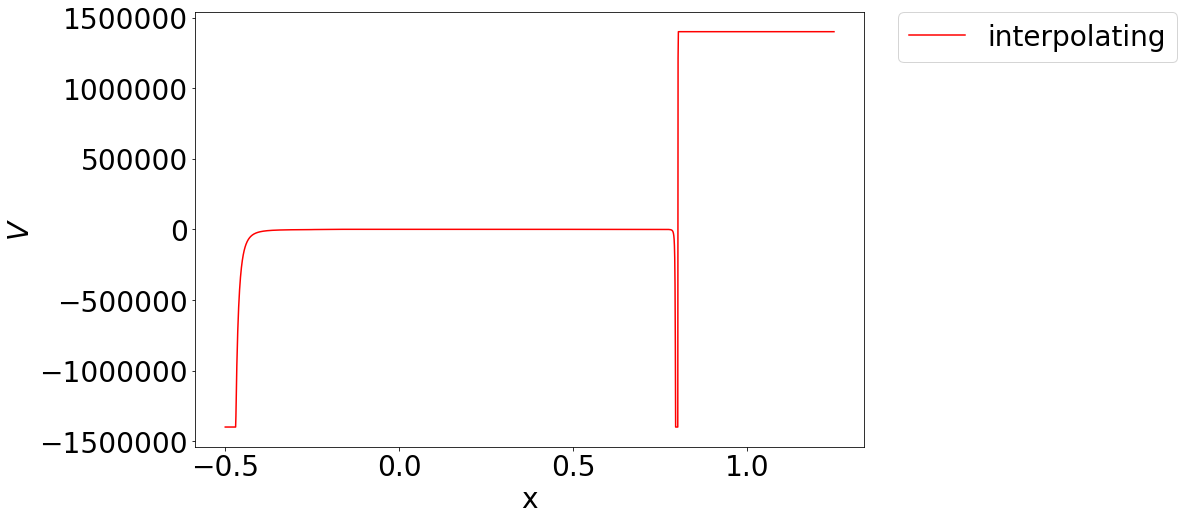

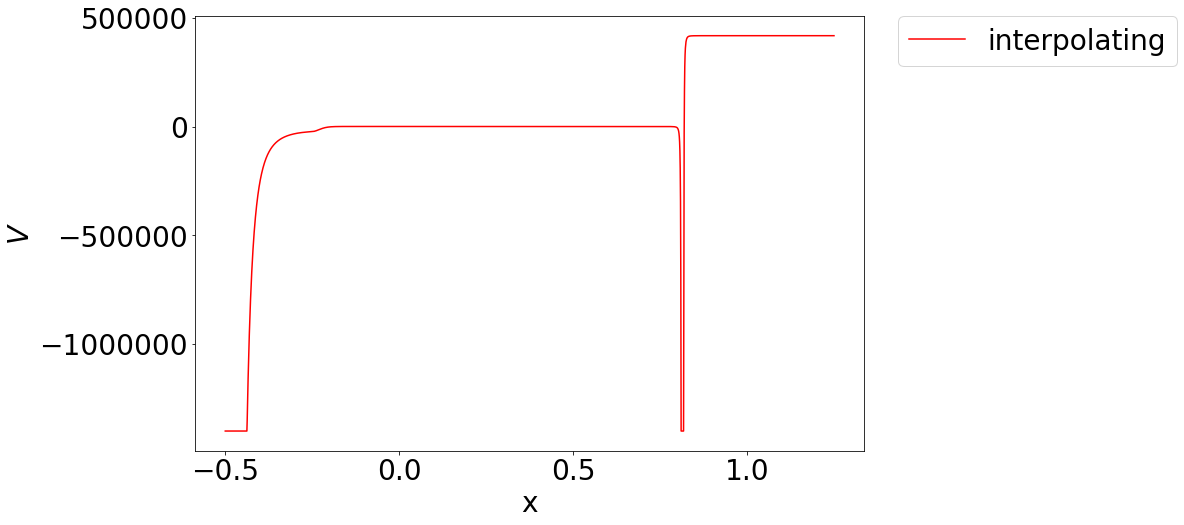

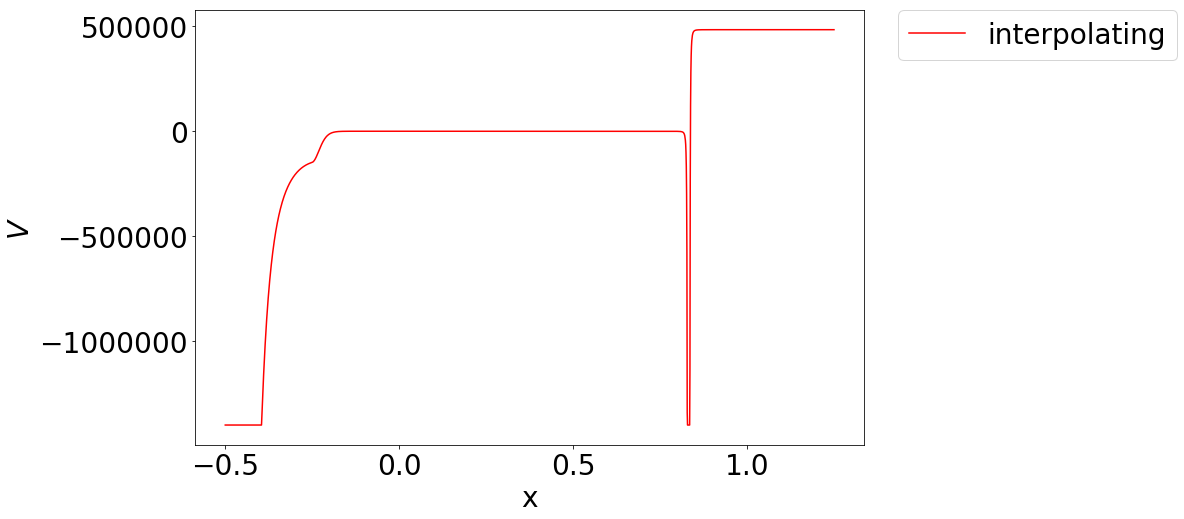

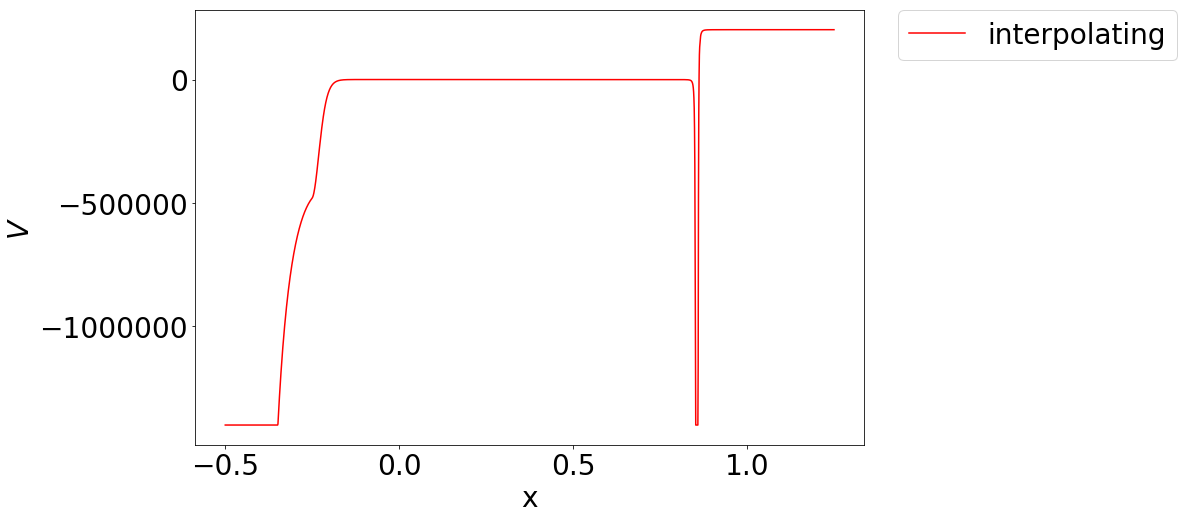

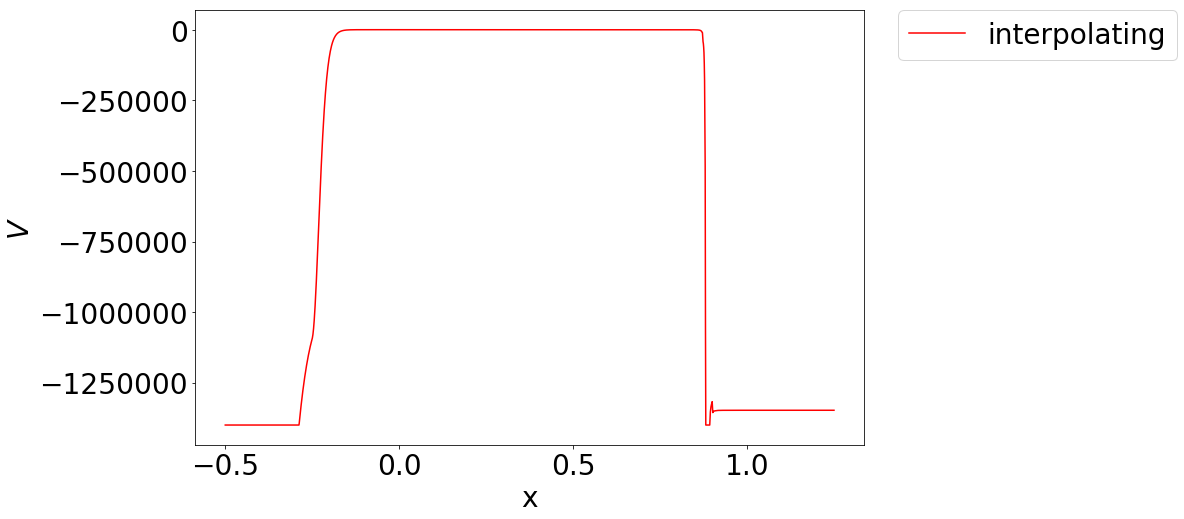

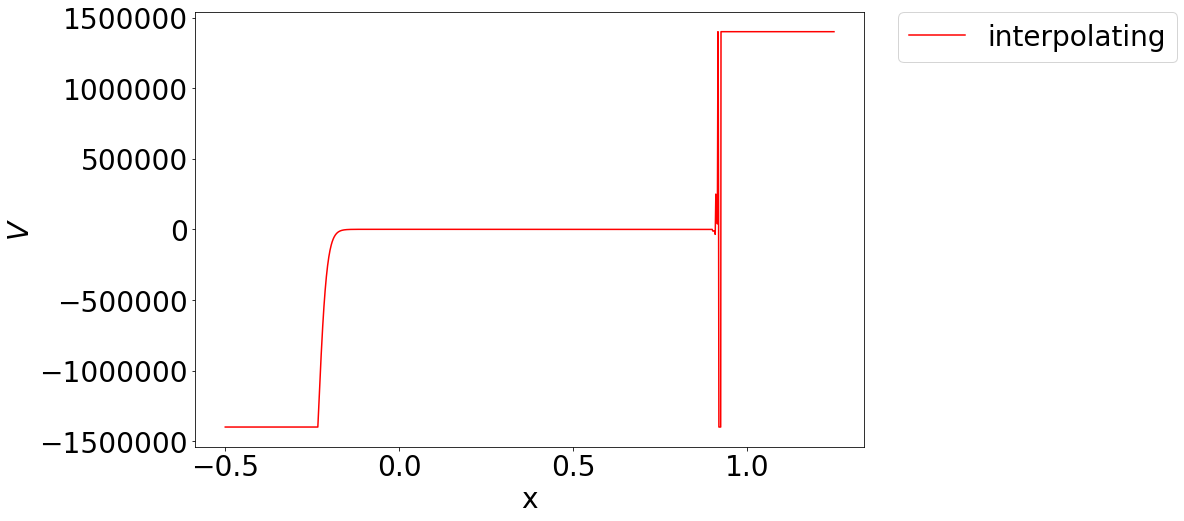

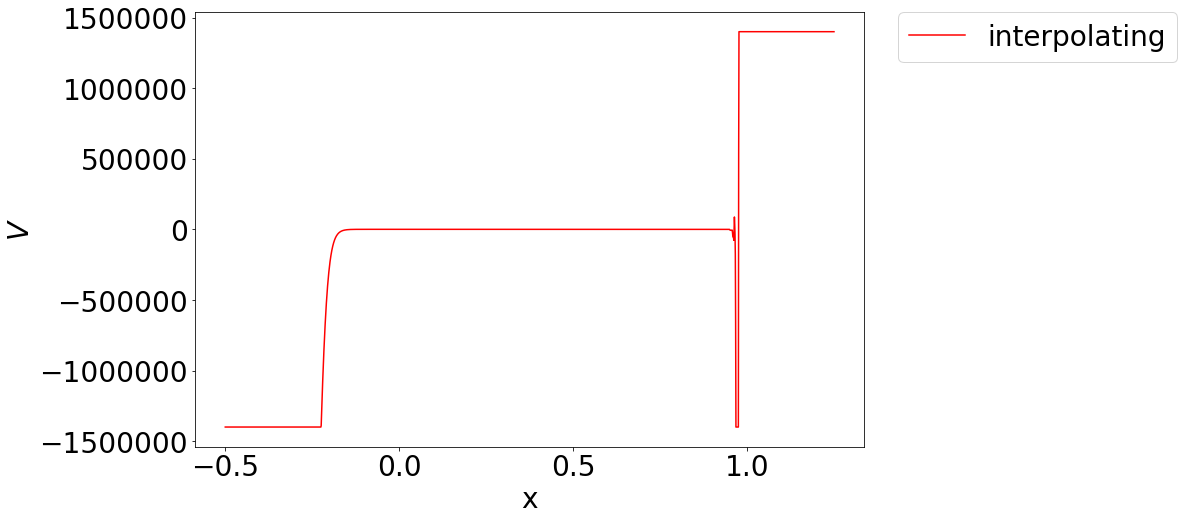

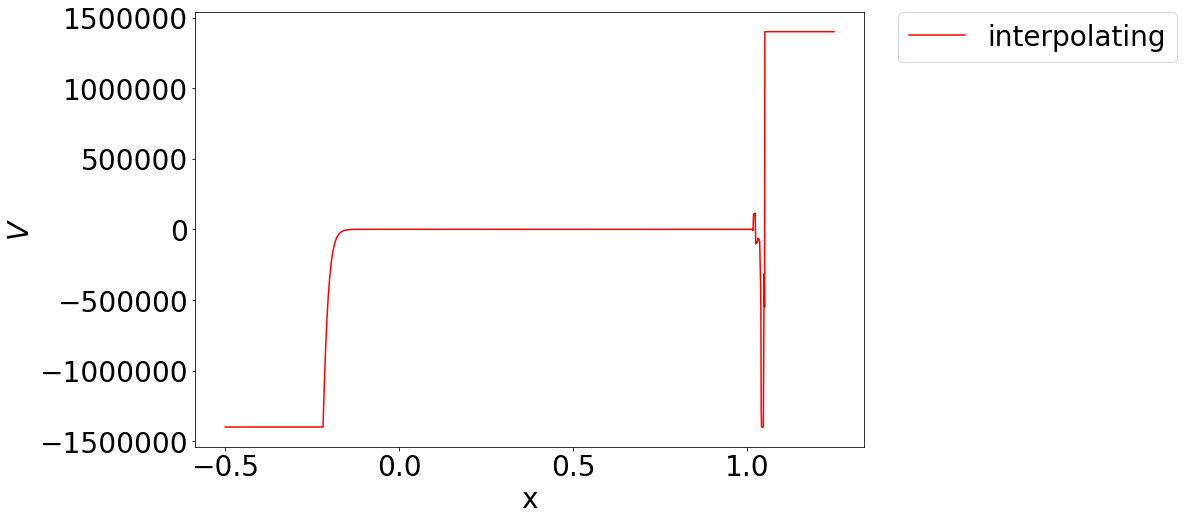

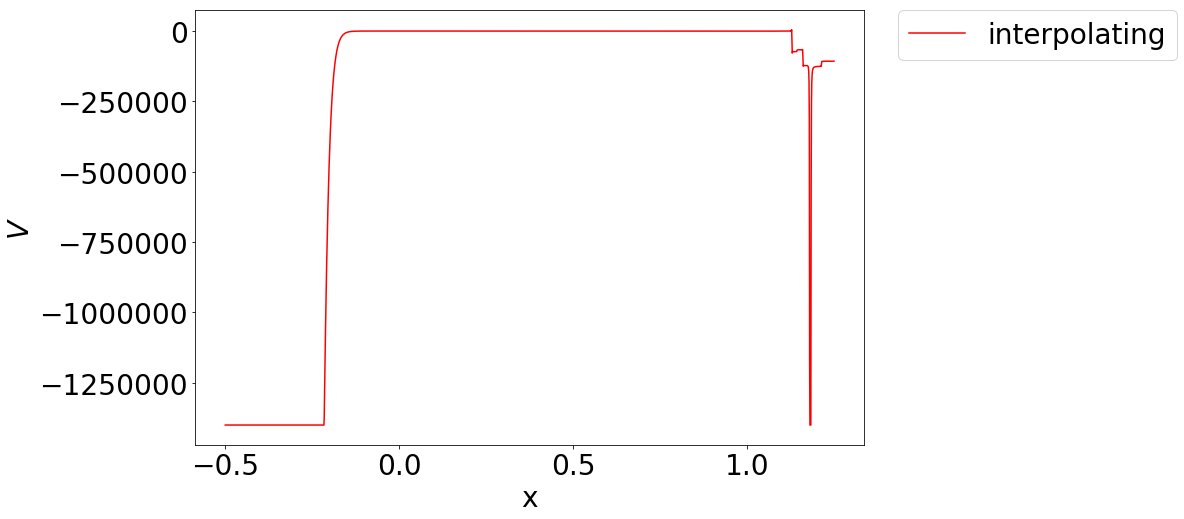

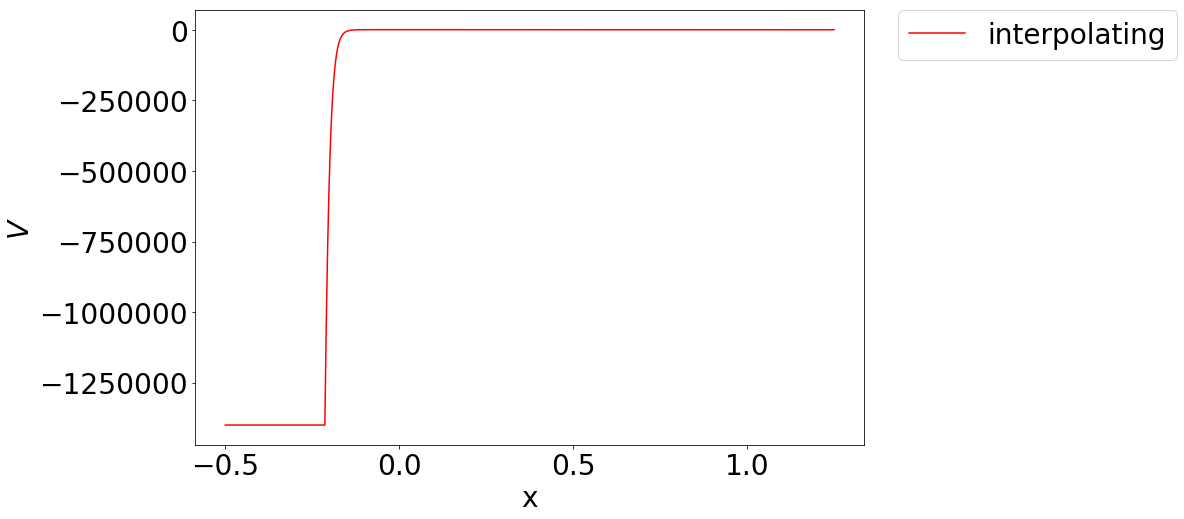

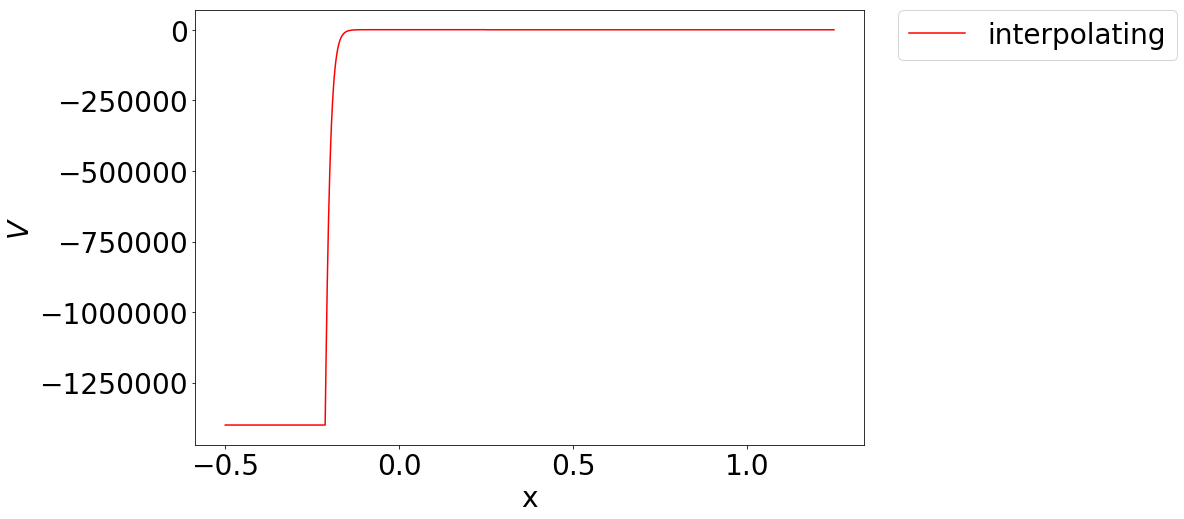

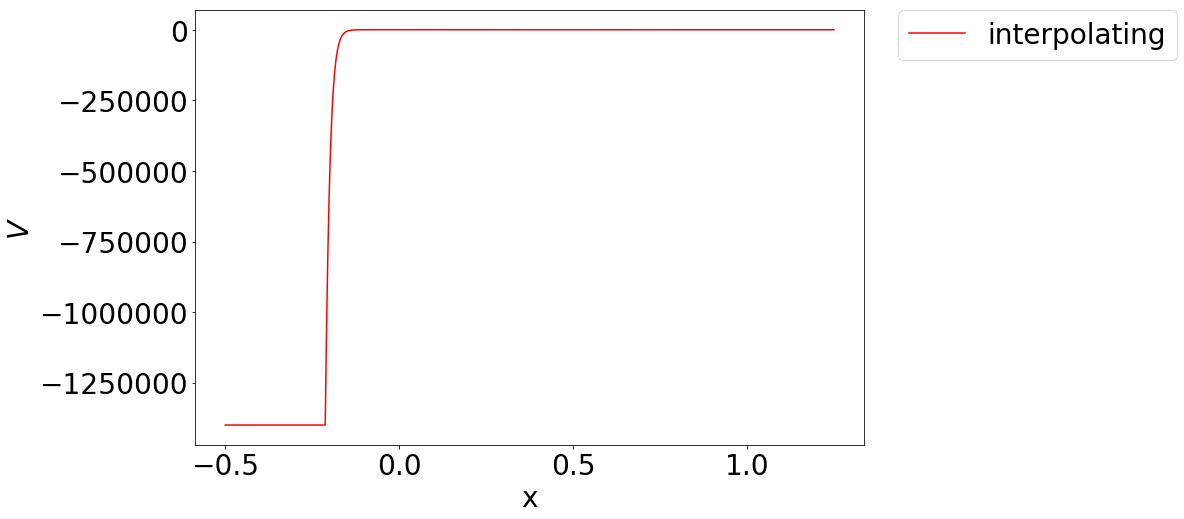

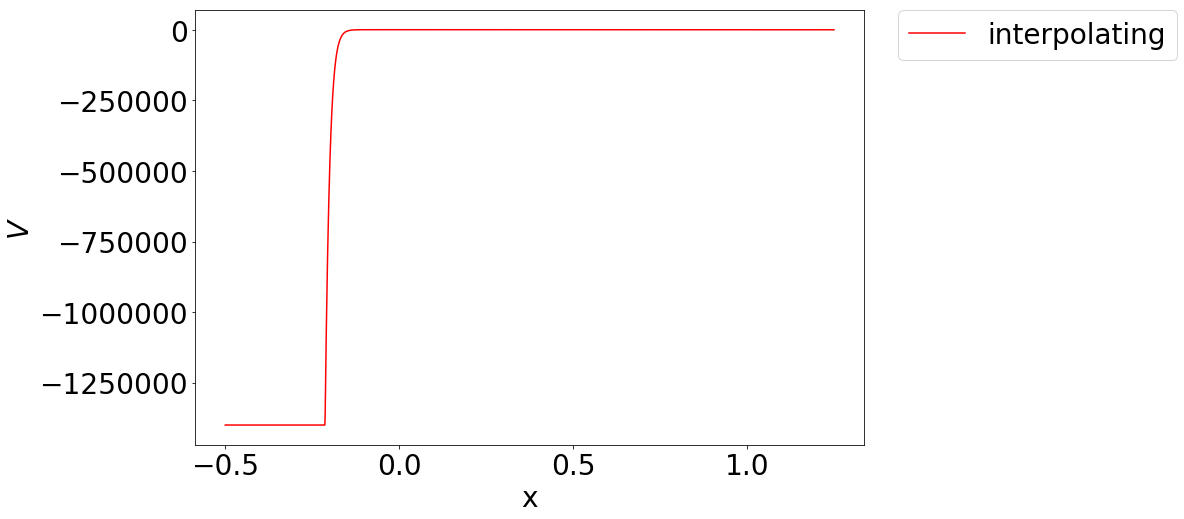

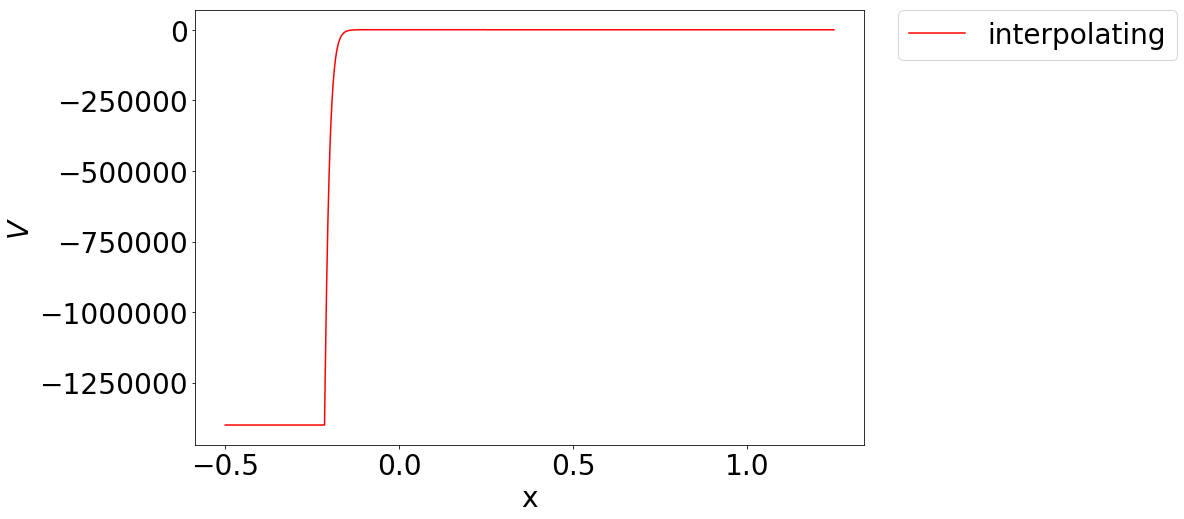

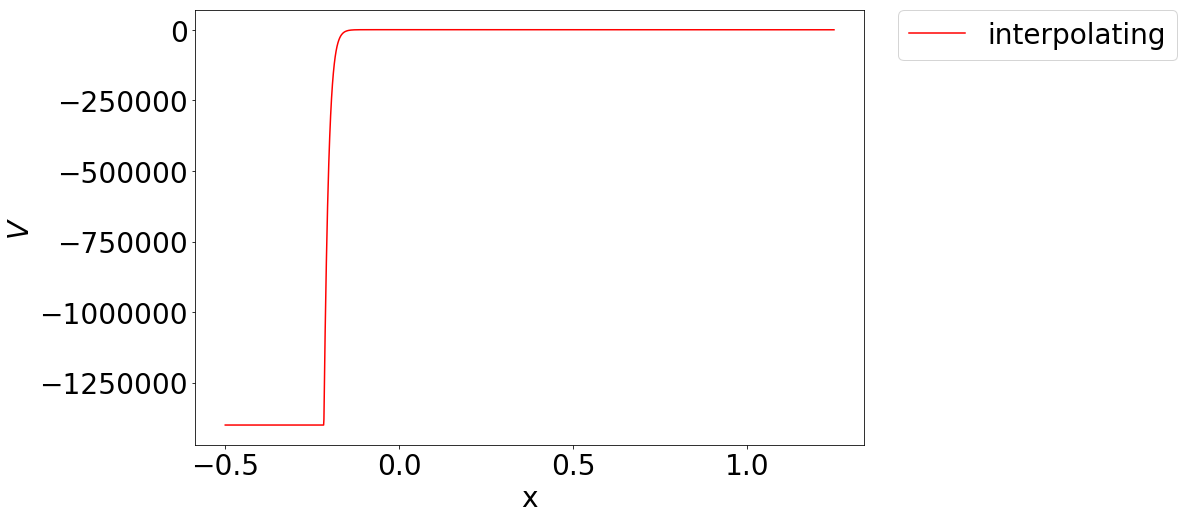

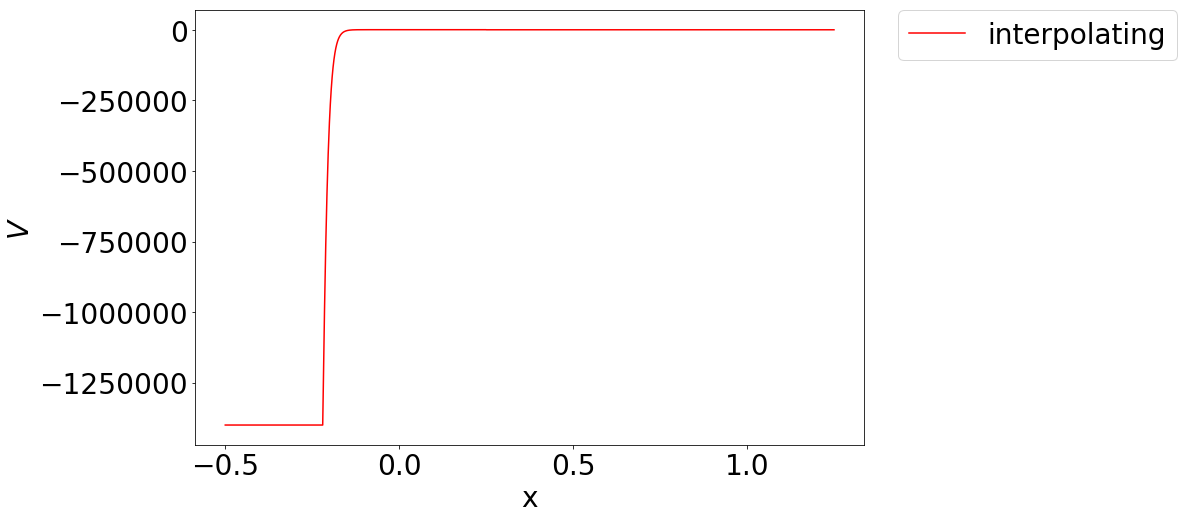

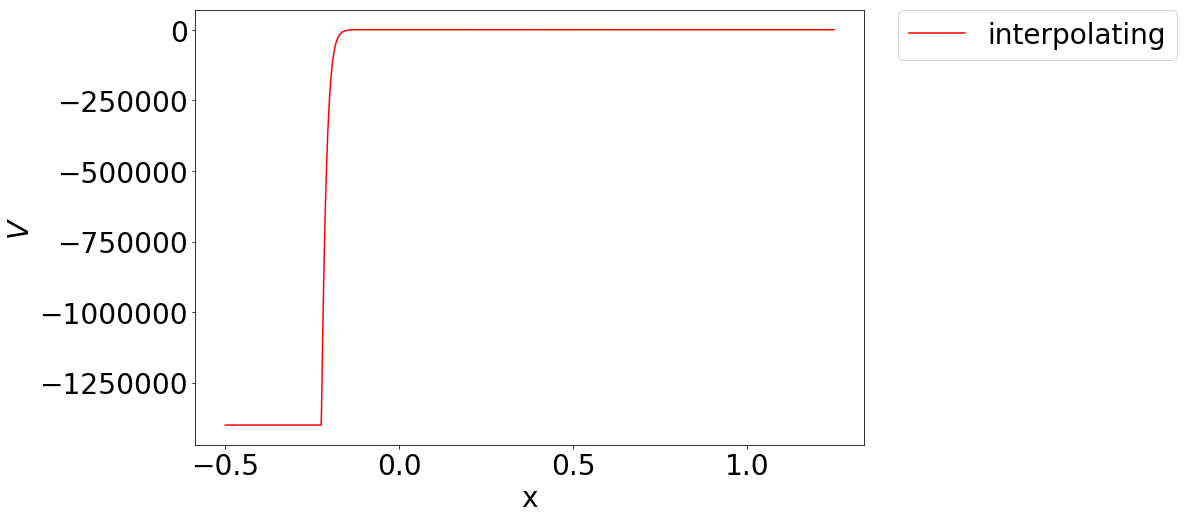

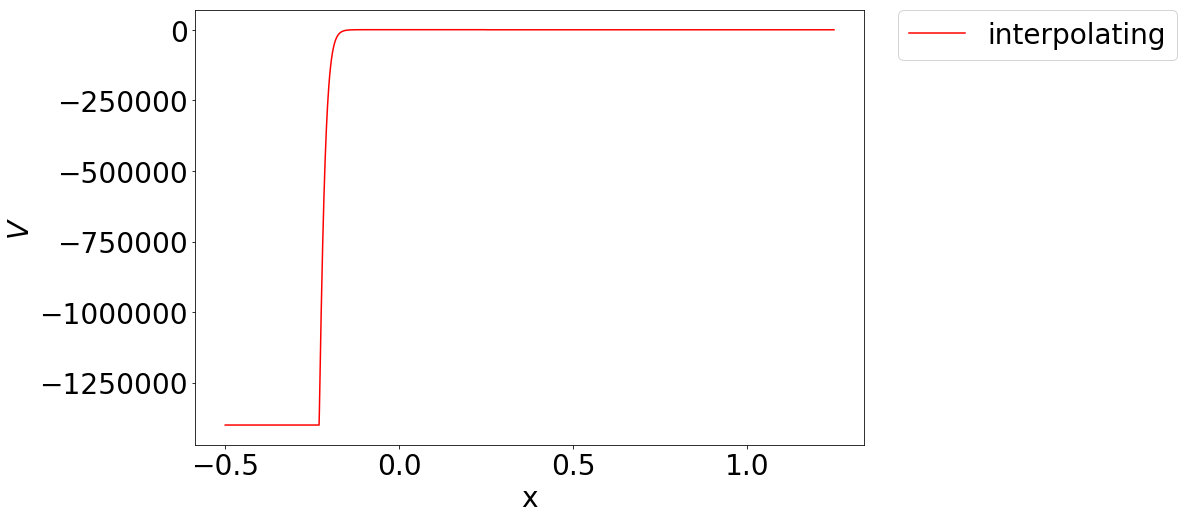

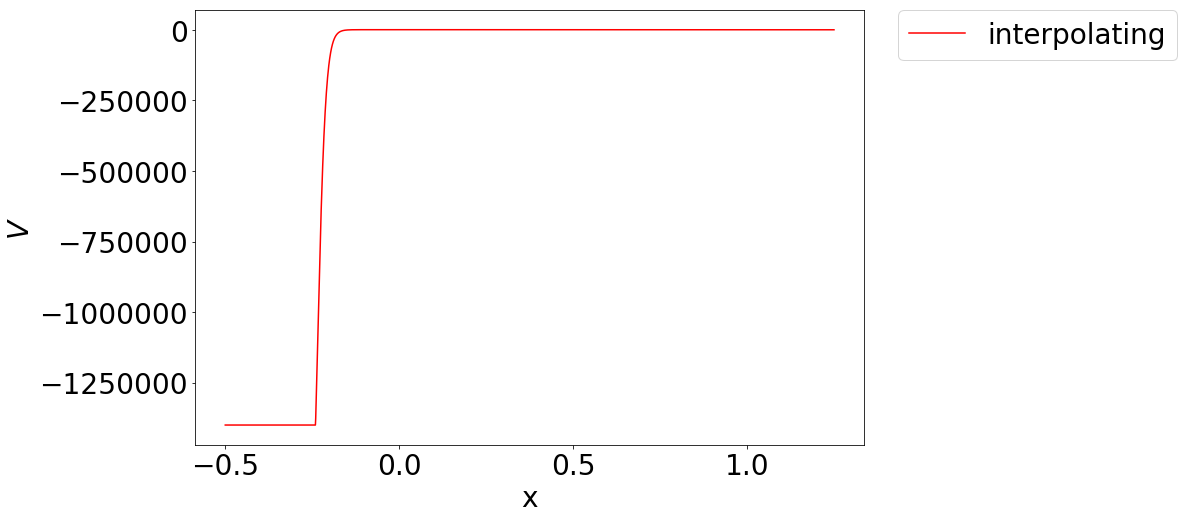

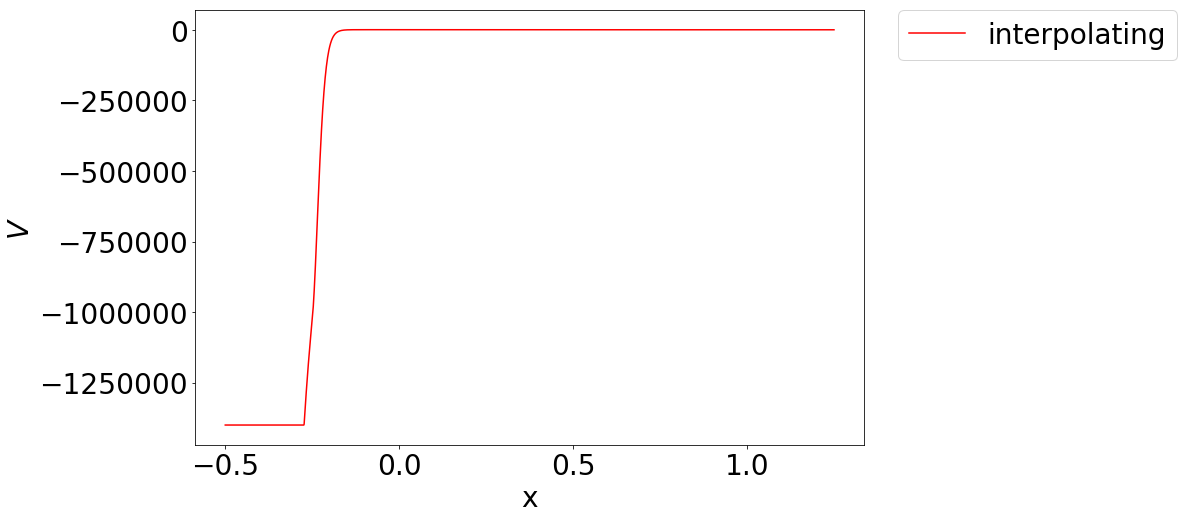

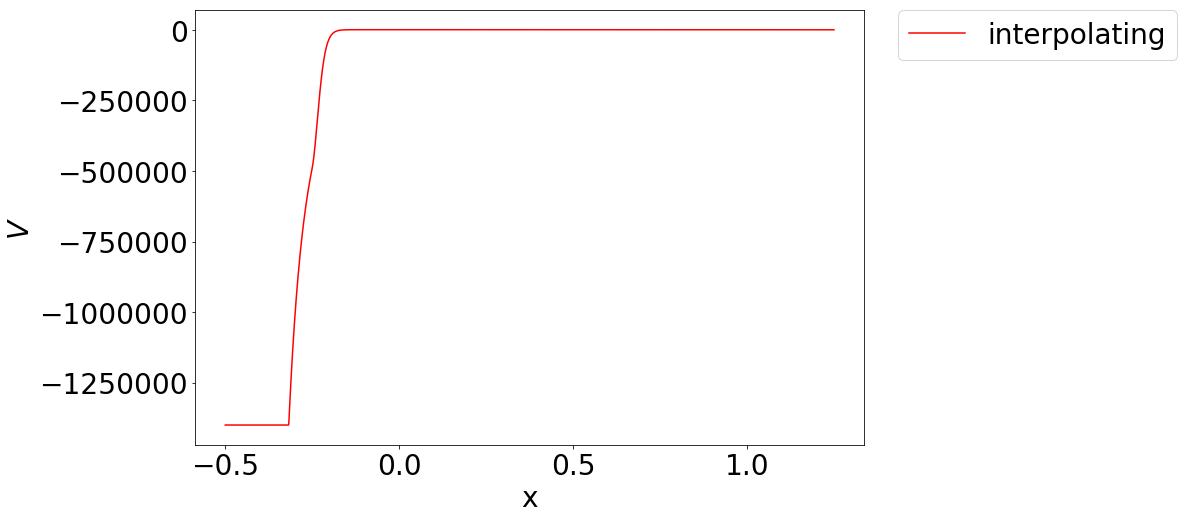

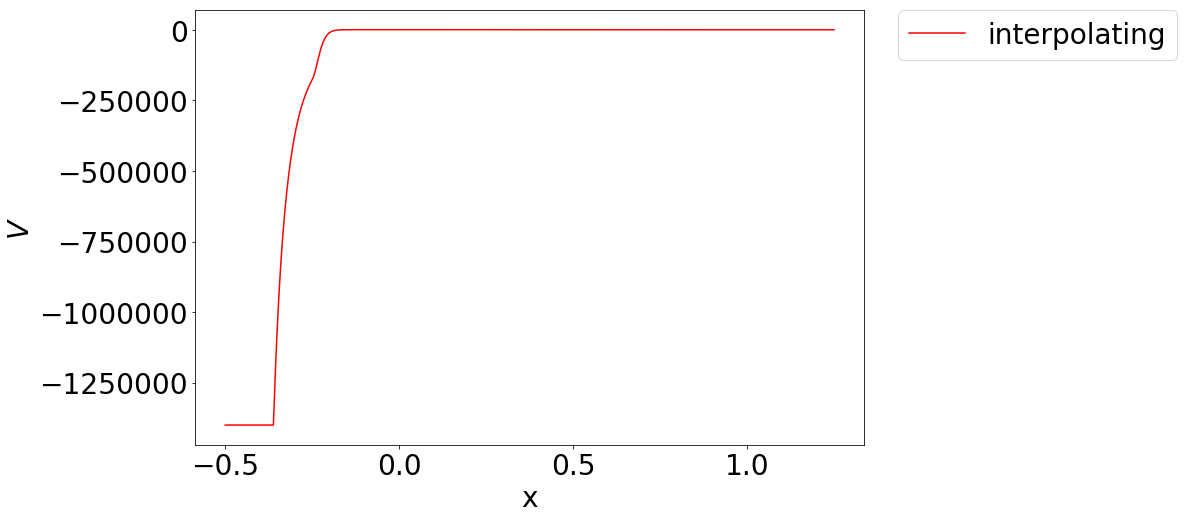

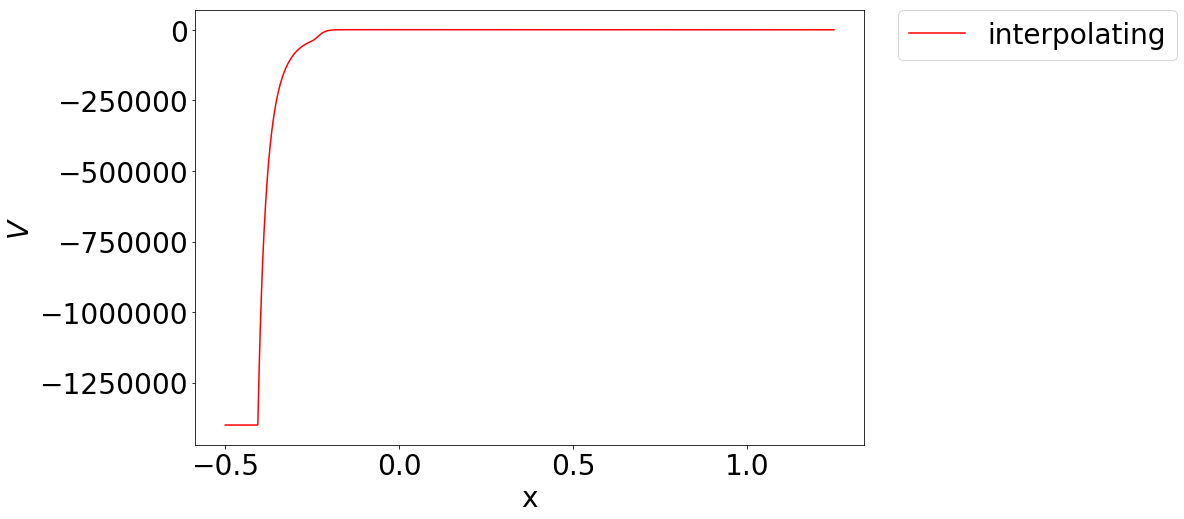

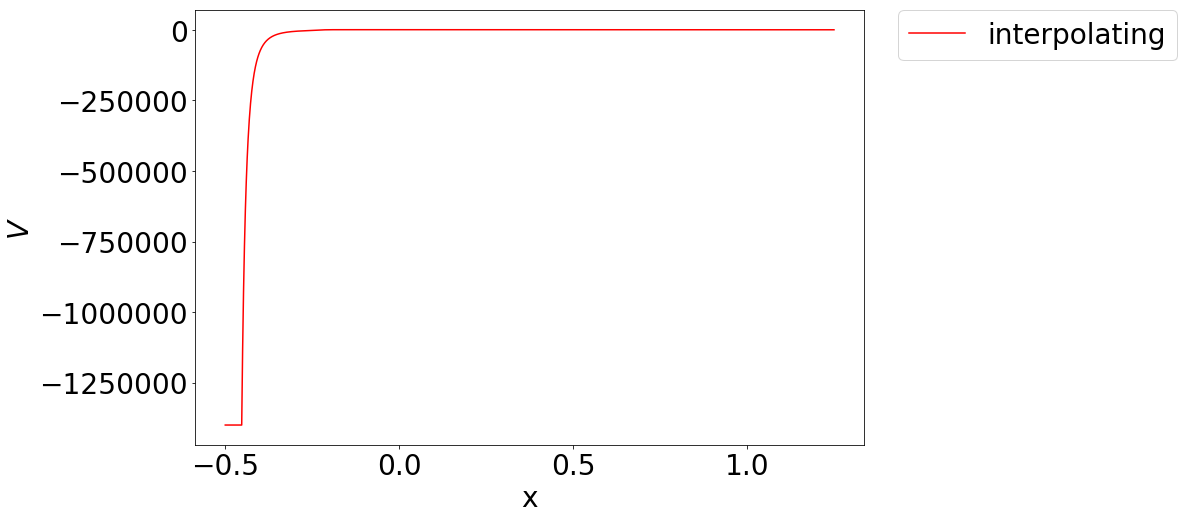

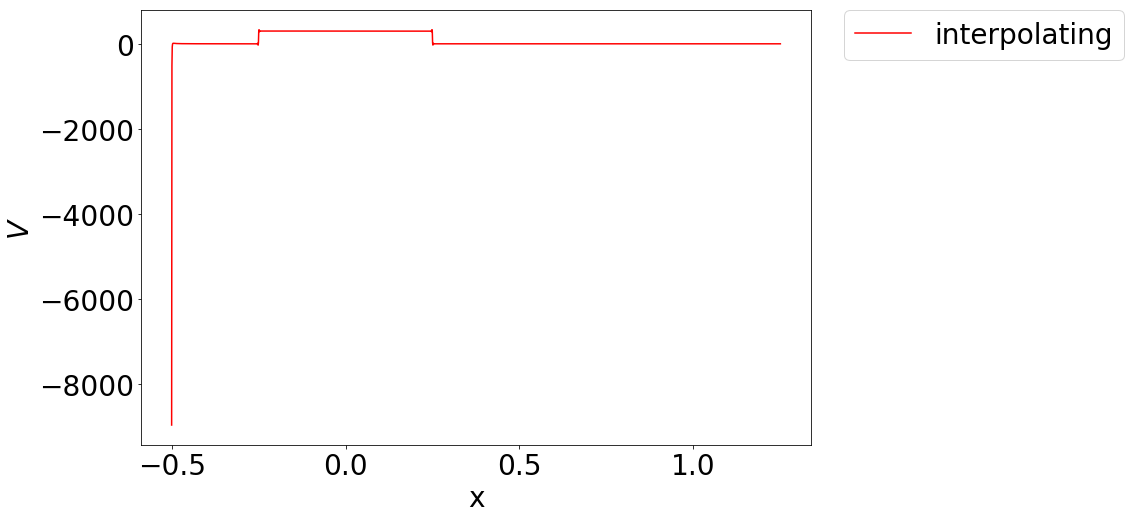

In [47]:
slices=40
for i in range(0,slices):
    #title("Interpolating function for the state density")
    ylabel(r"$V$")
    xlabel("x")
    #ylim([-500,500])
    #xlim([-0.7,0.7])
    plot(xvec,VR[int(i*(size(t)-1)/(slices-1)),:],label="interpolating",c='r')
    legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    show()

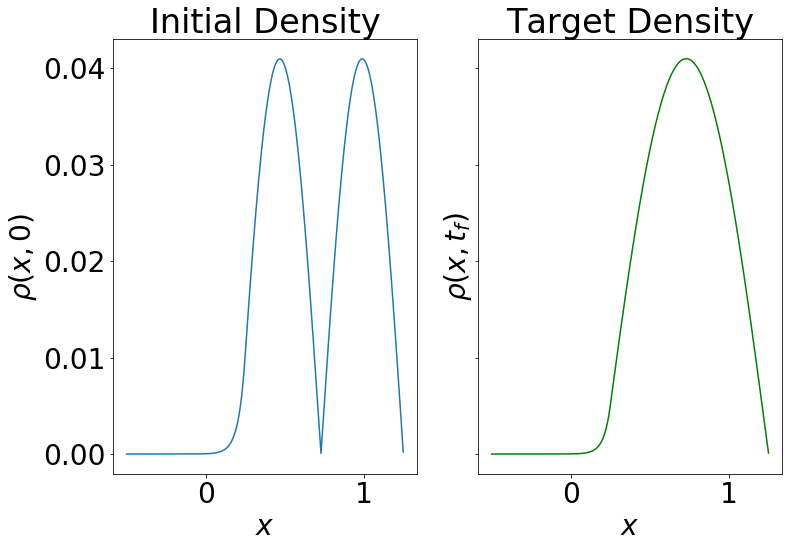

In [48]:
rhoR=ShortcutR(xvec,(valuesI[1].T)[1],(valuesI[1].T)[0],(valuesI[0].T)[1],(valuesI[0].T)[0], eta)    

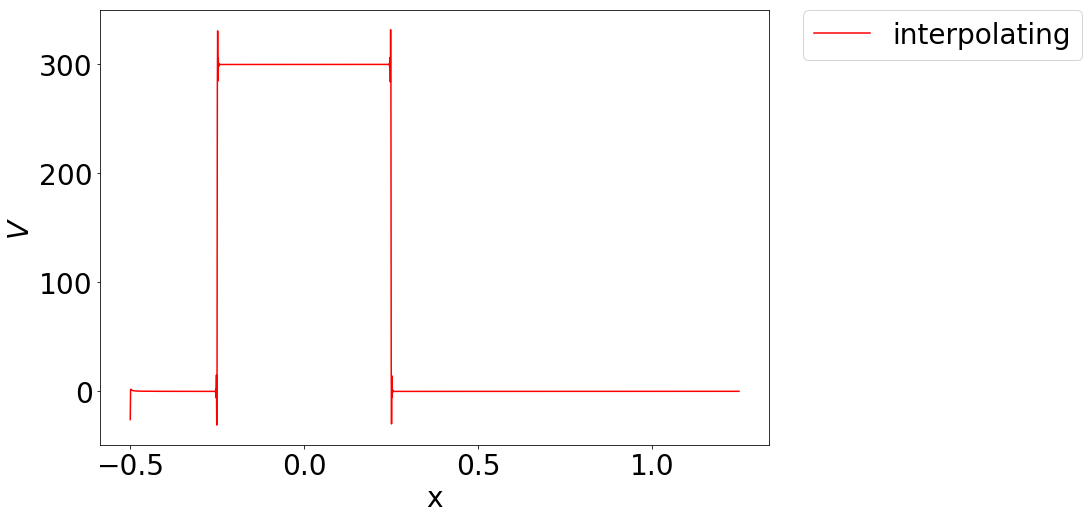

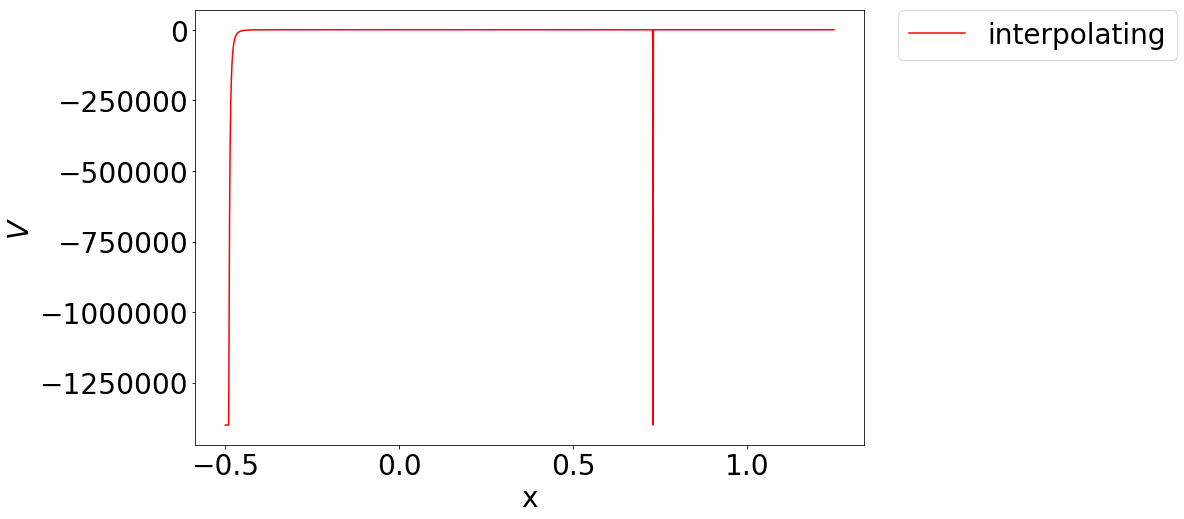

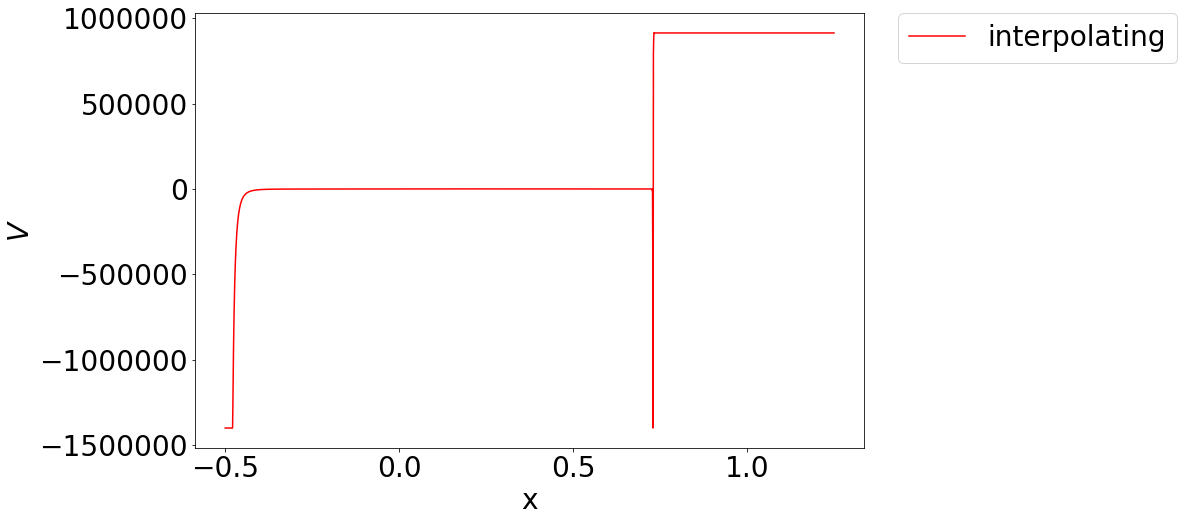

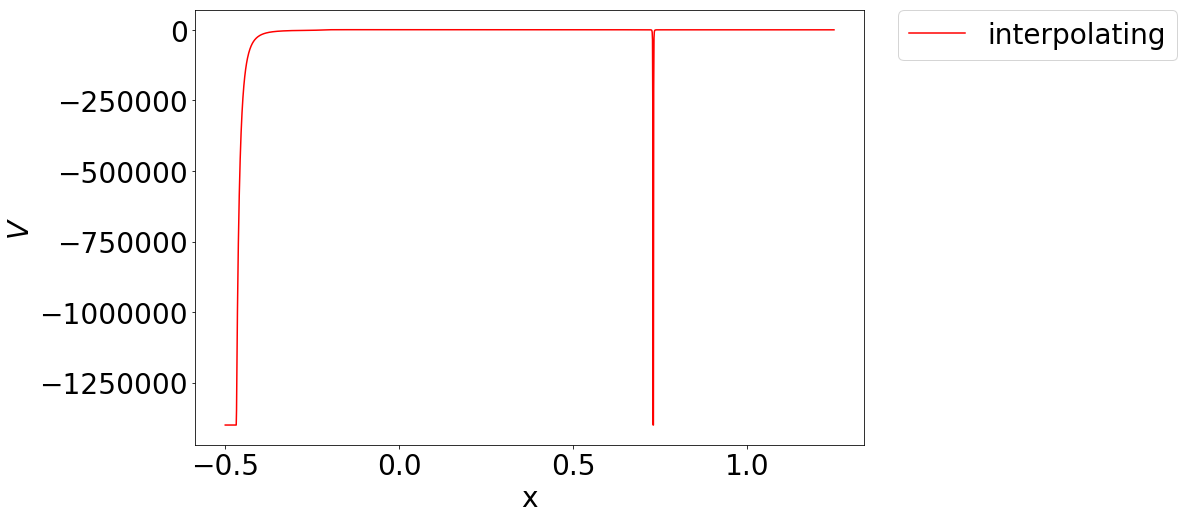

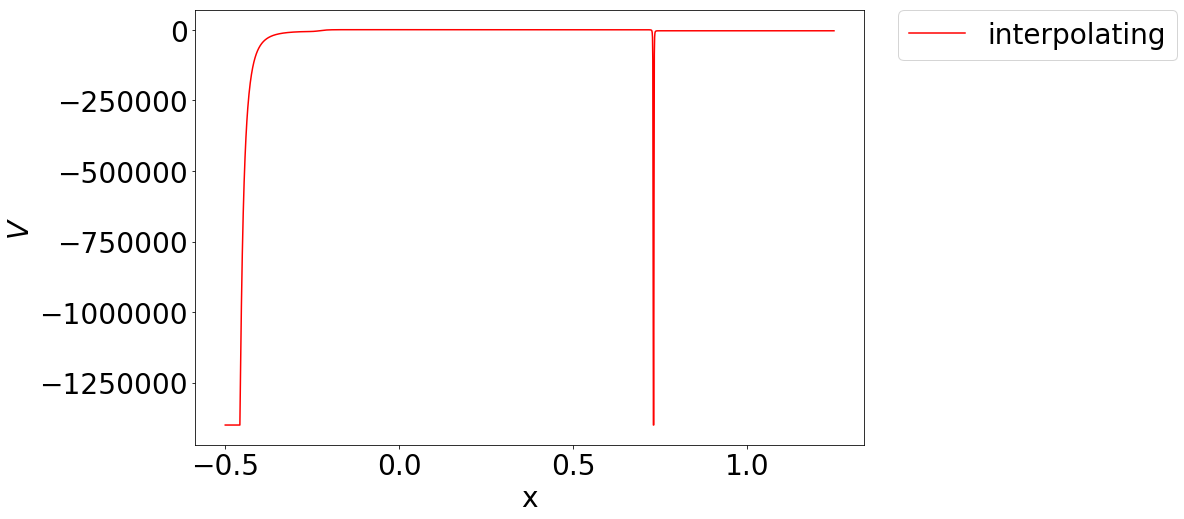

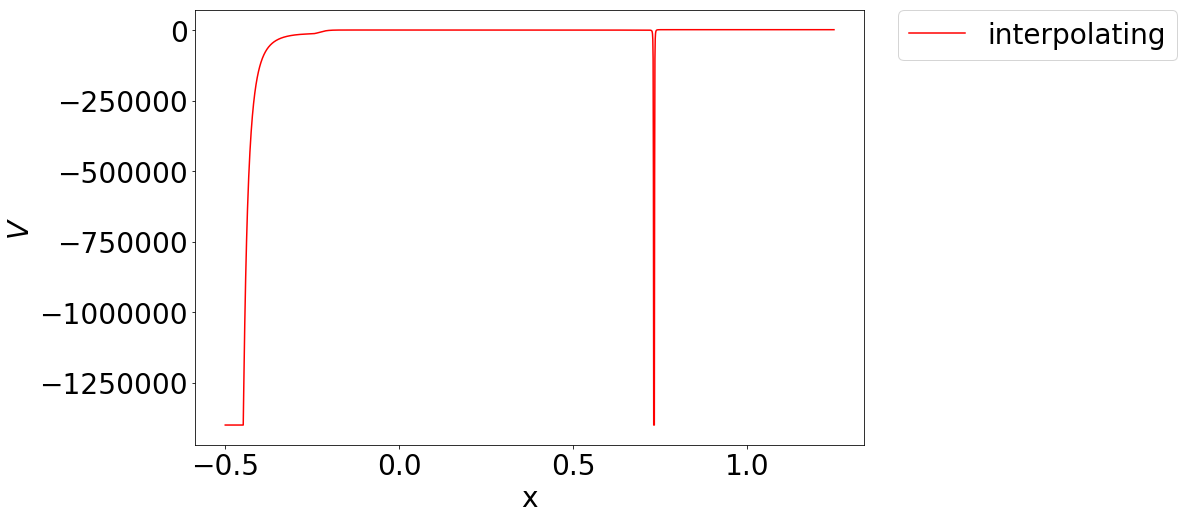

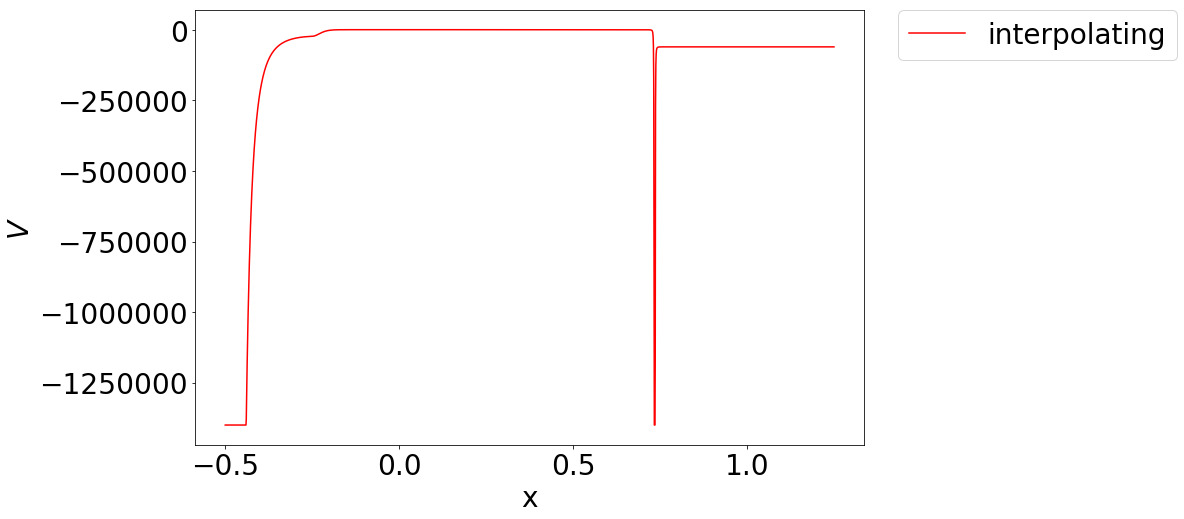

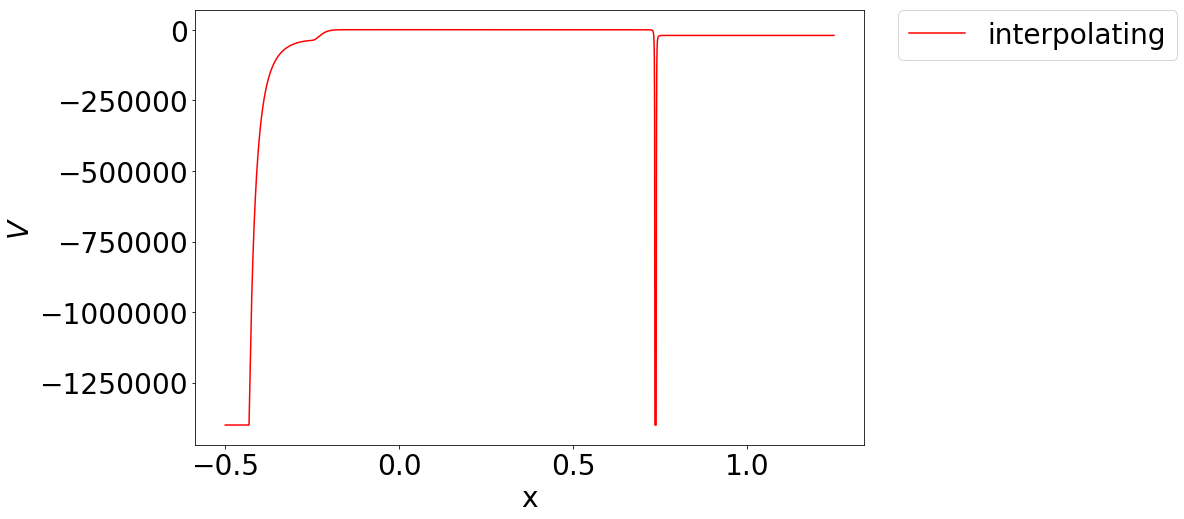

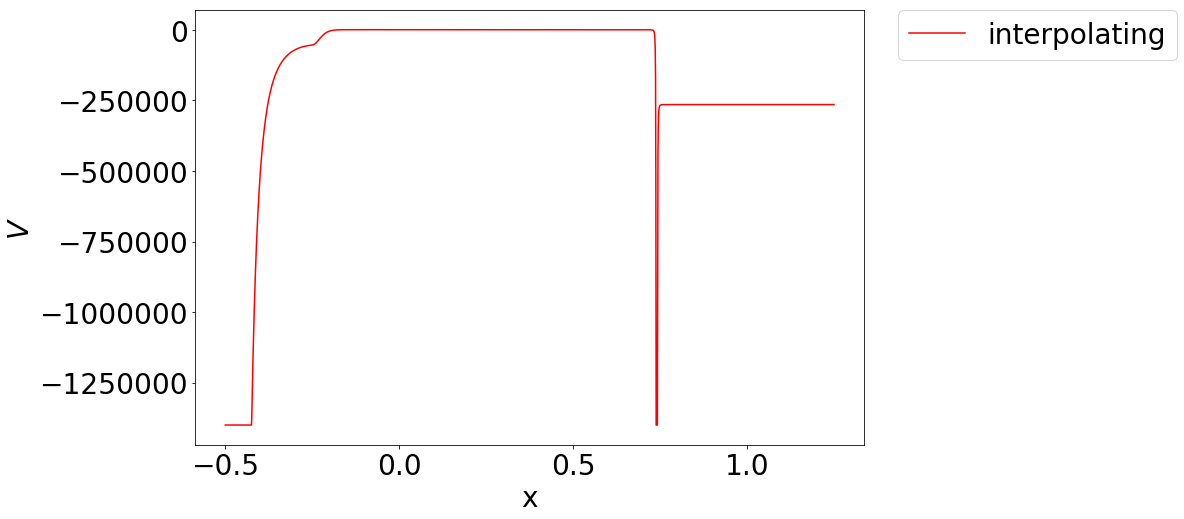

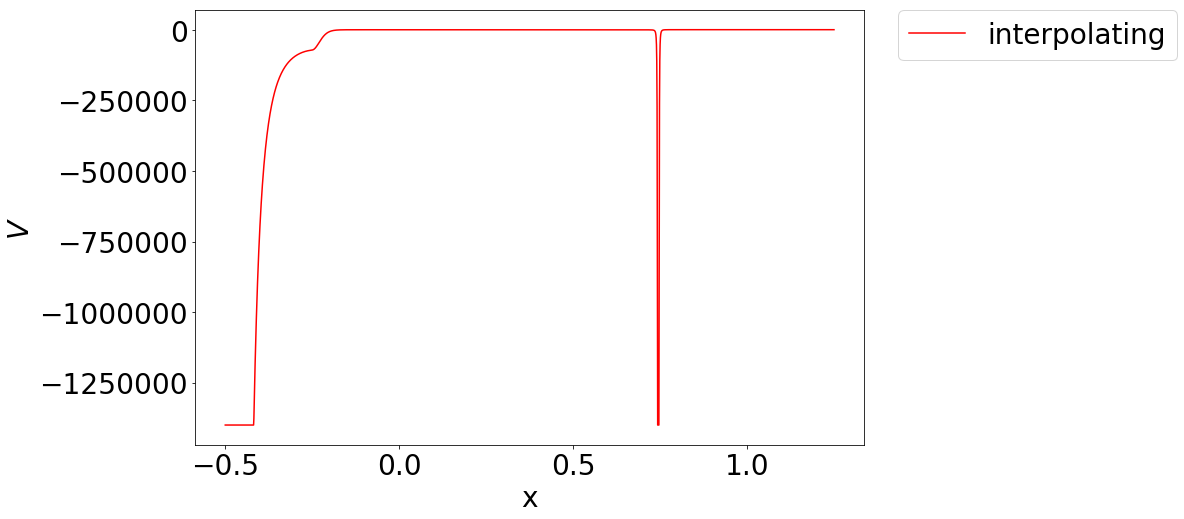

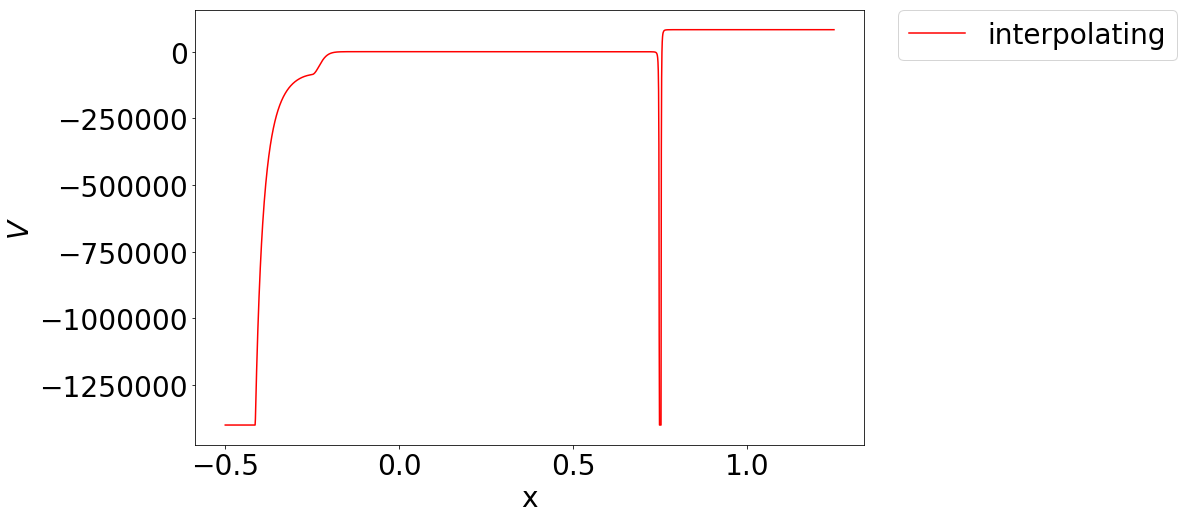

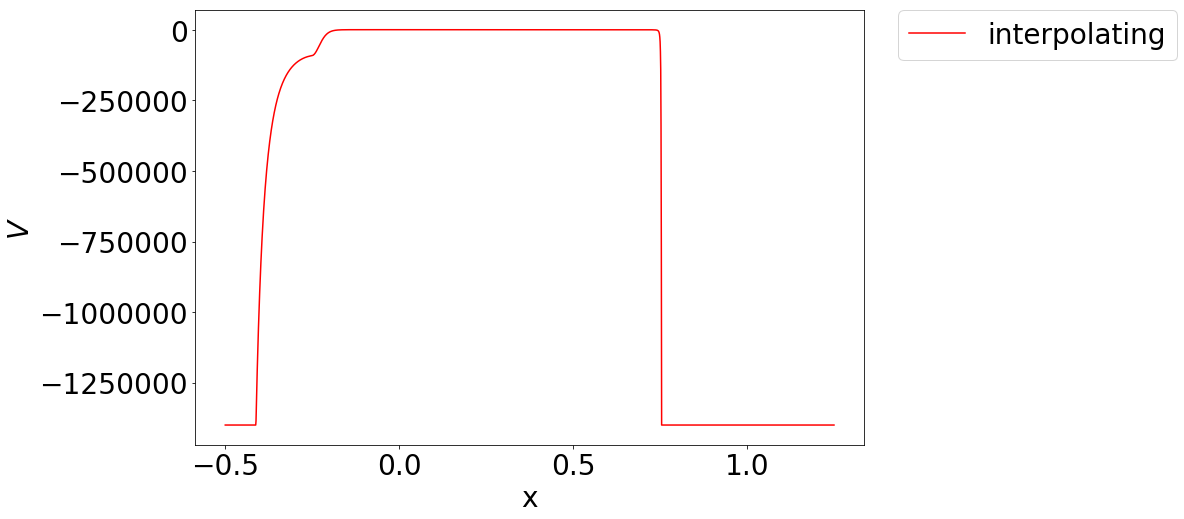

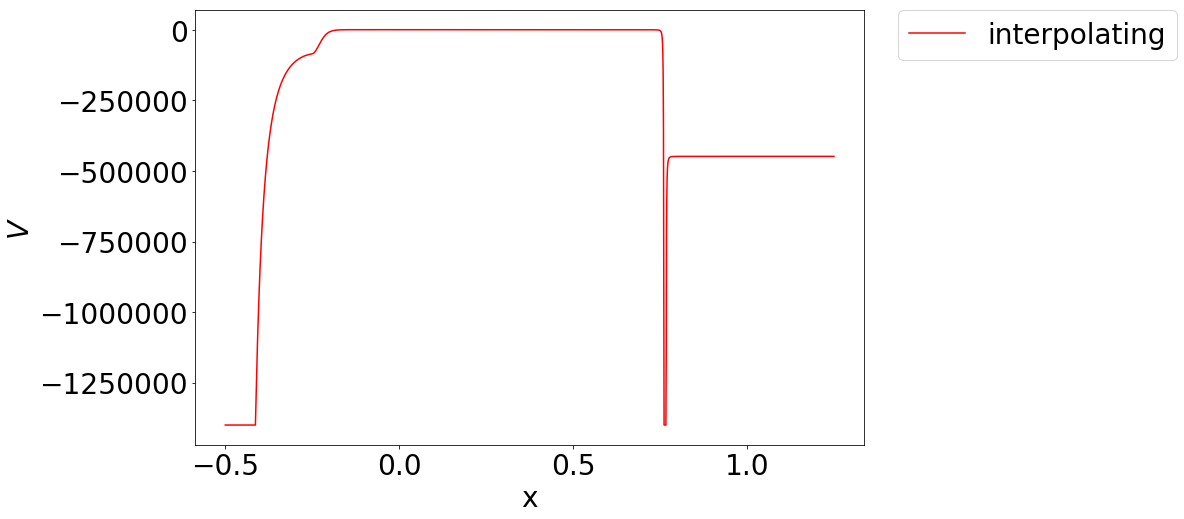

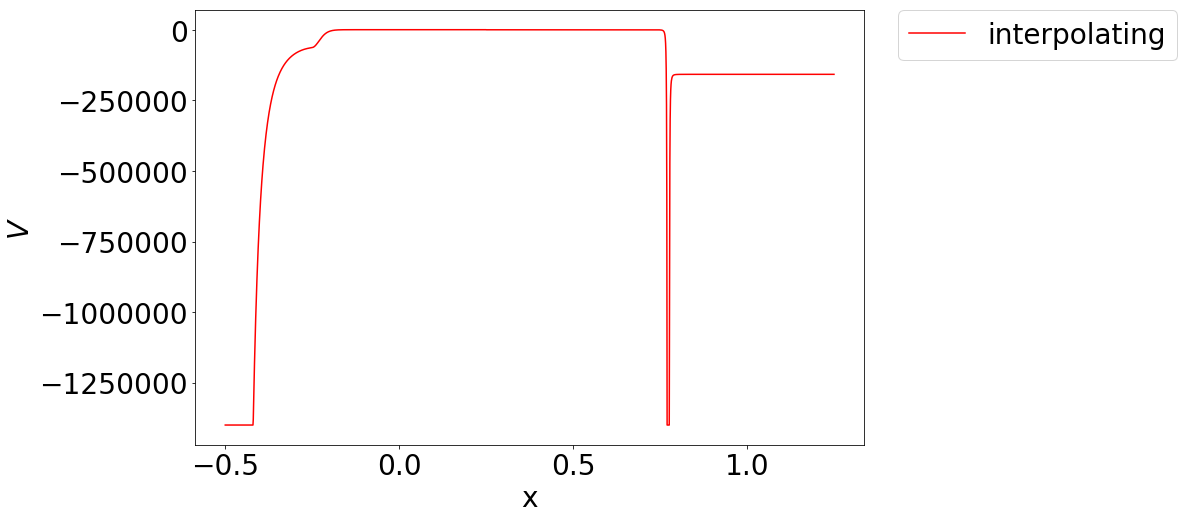

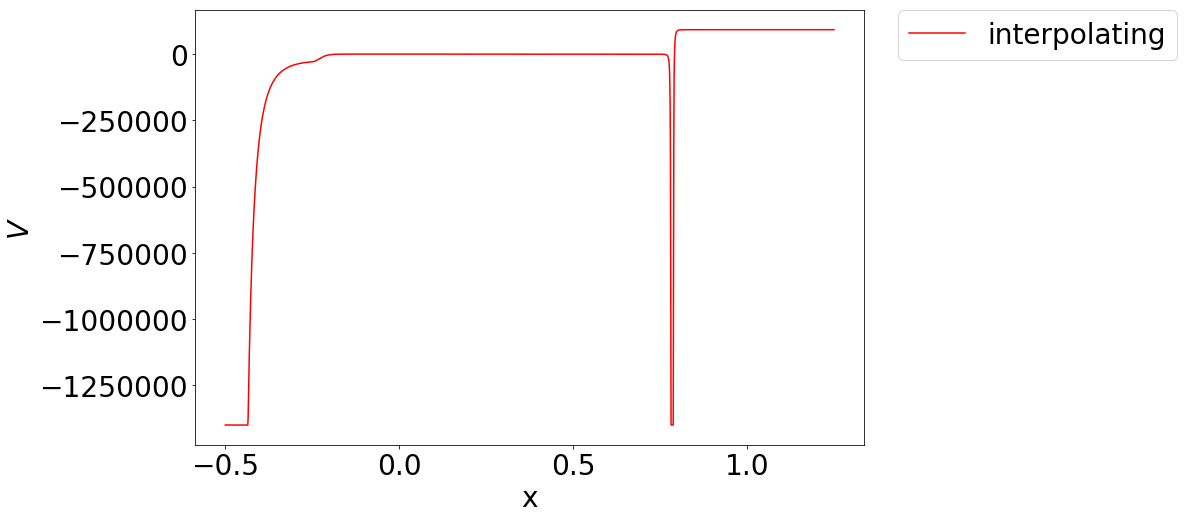

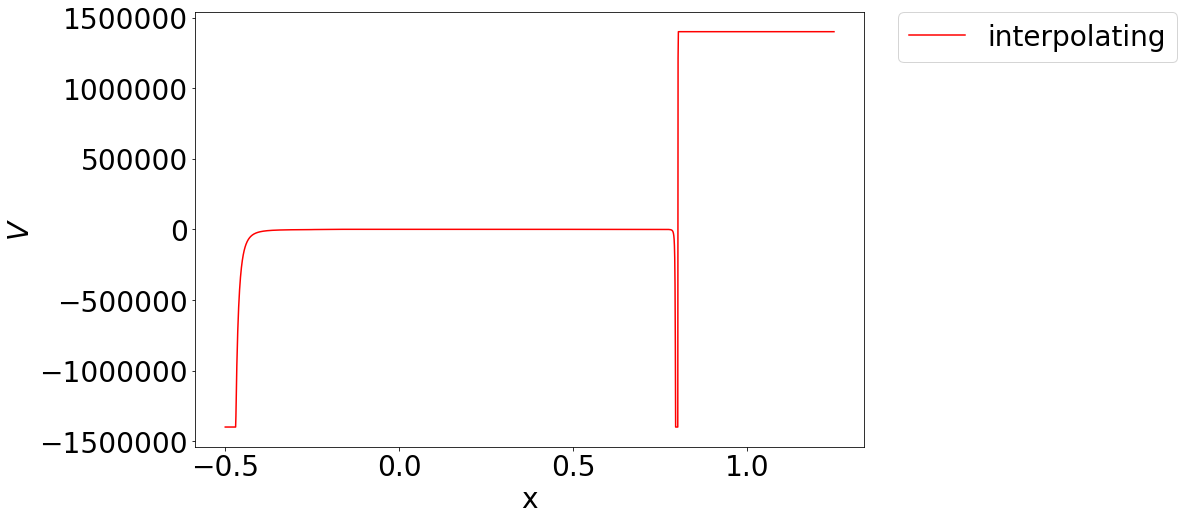

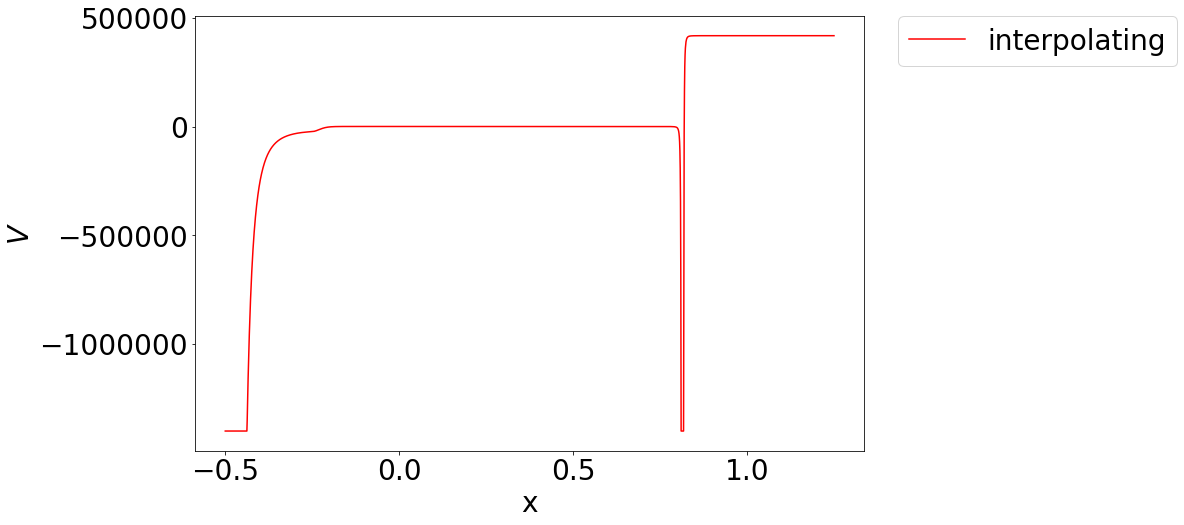

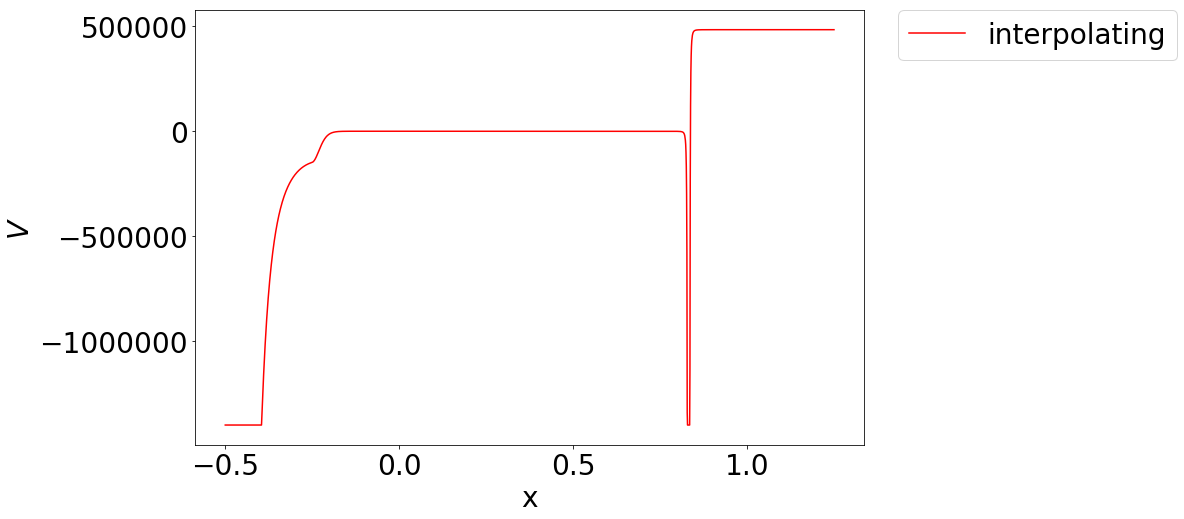

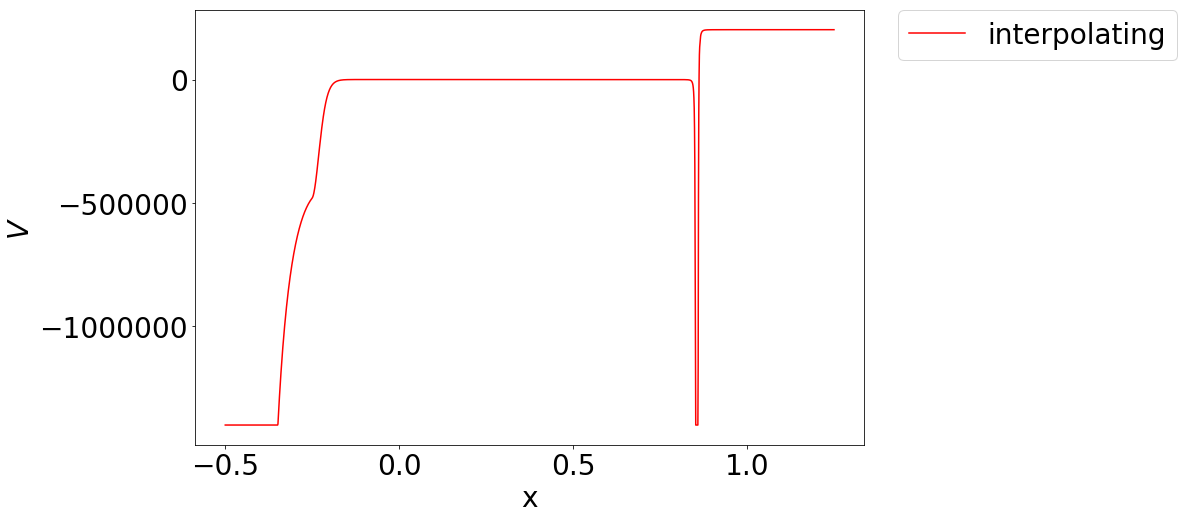

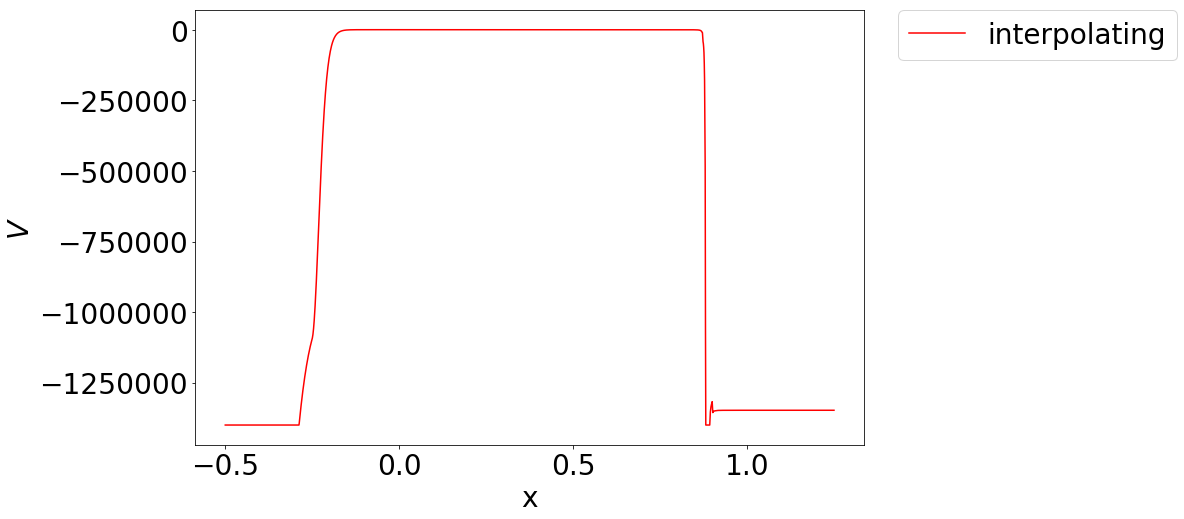

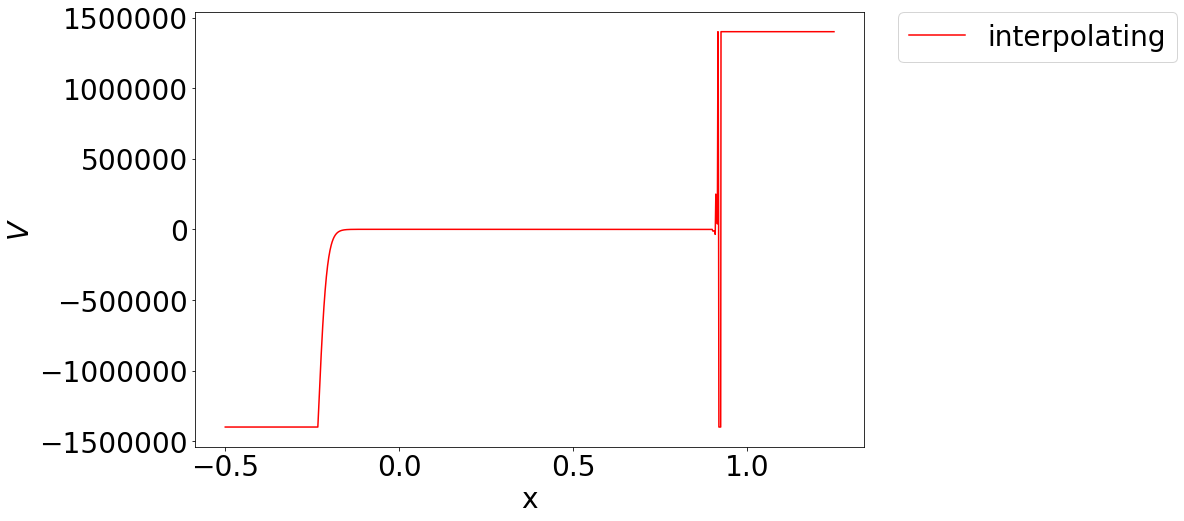

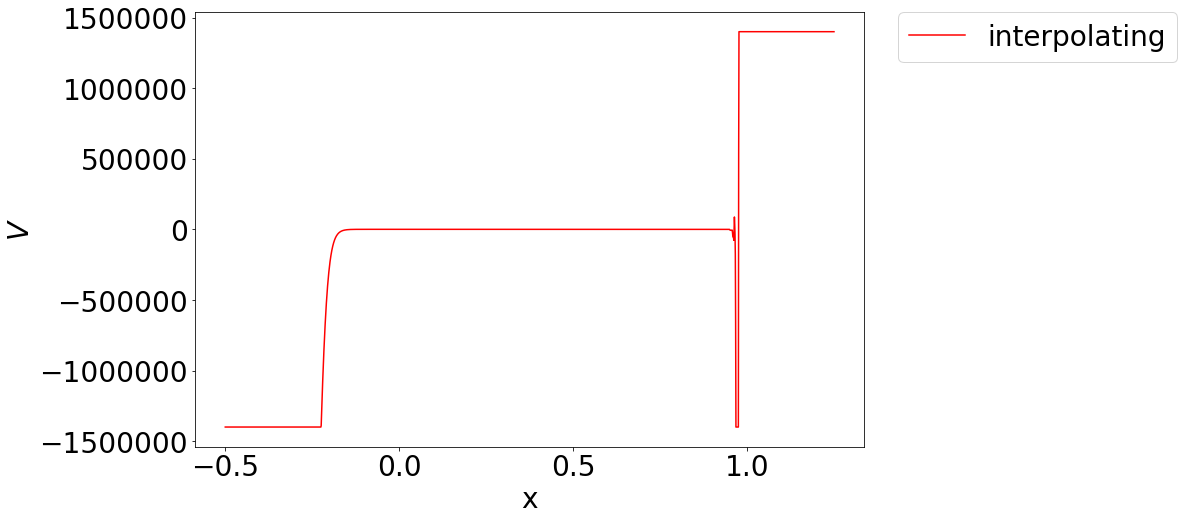

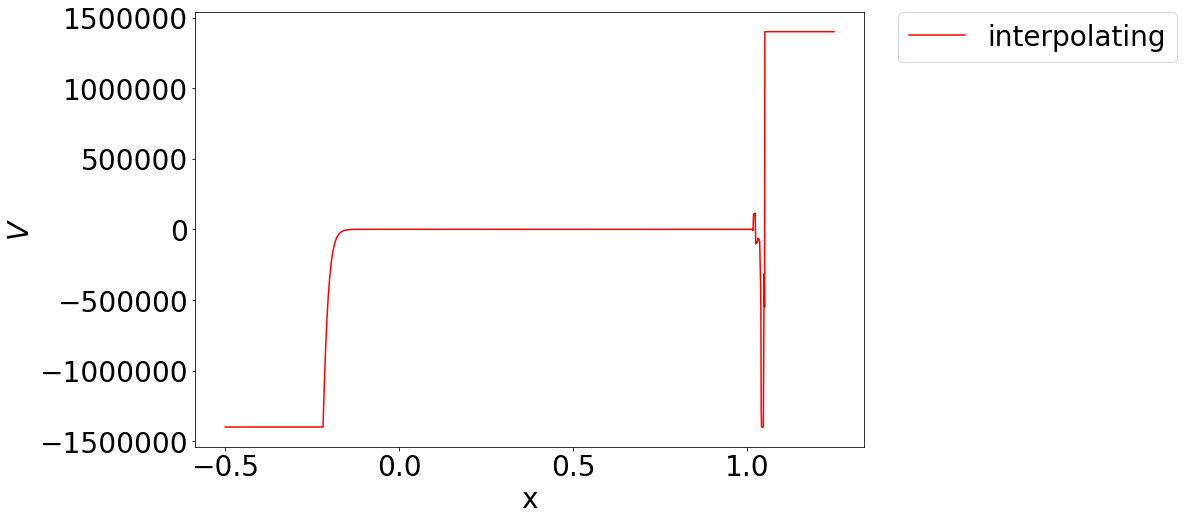

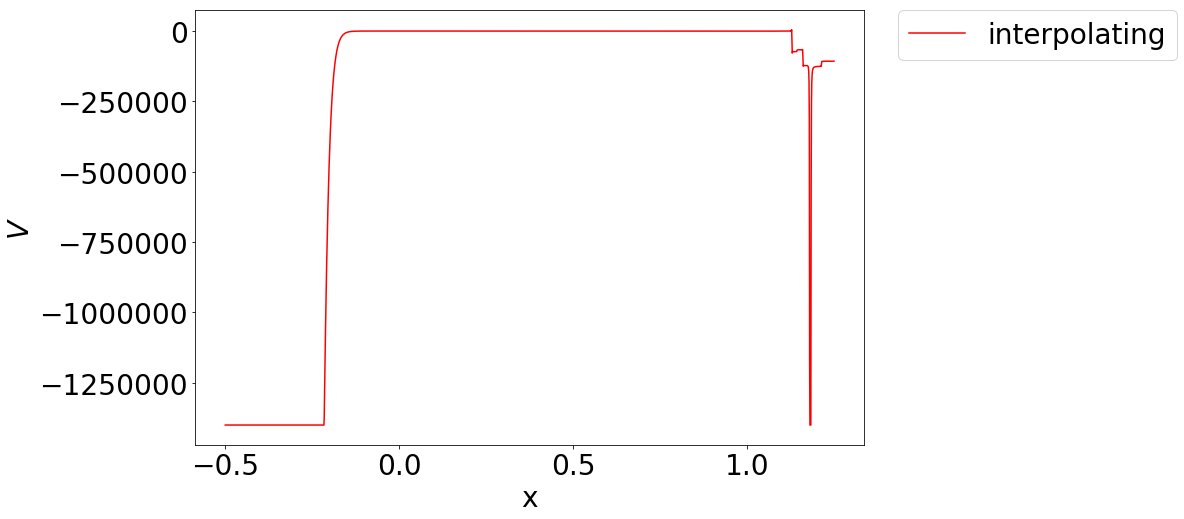

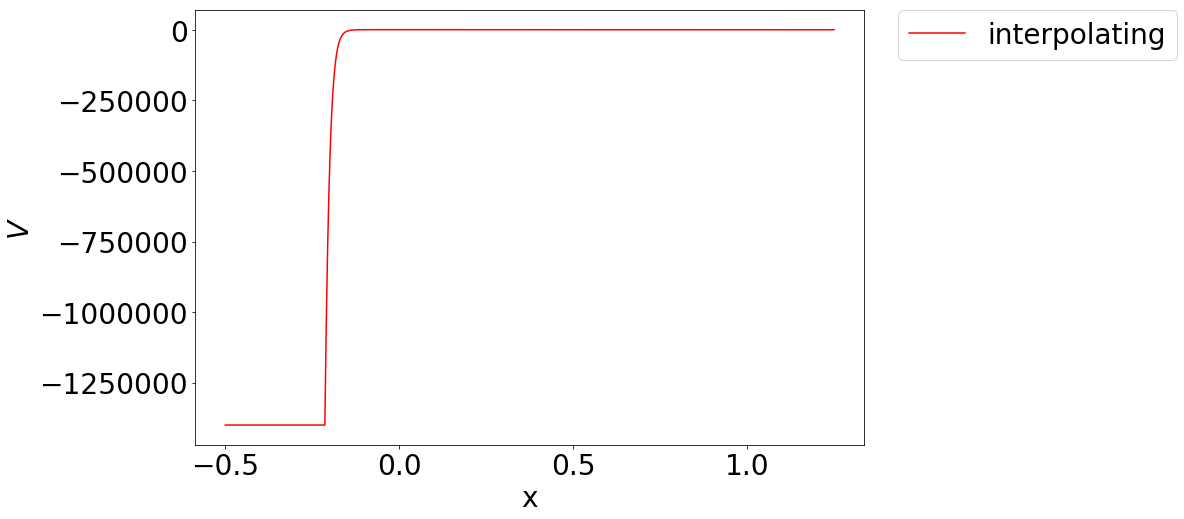

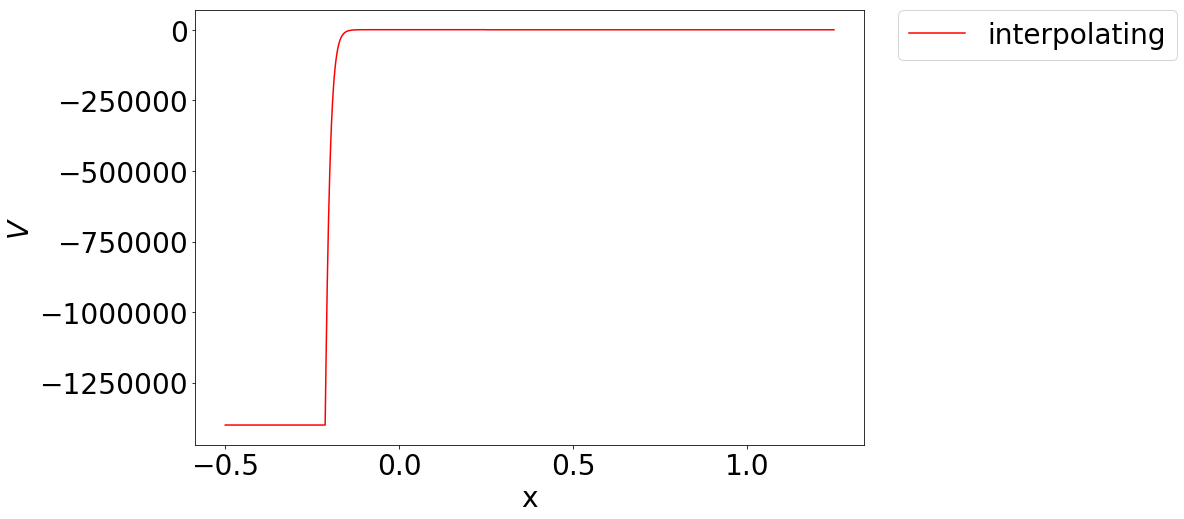

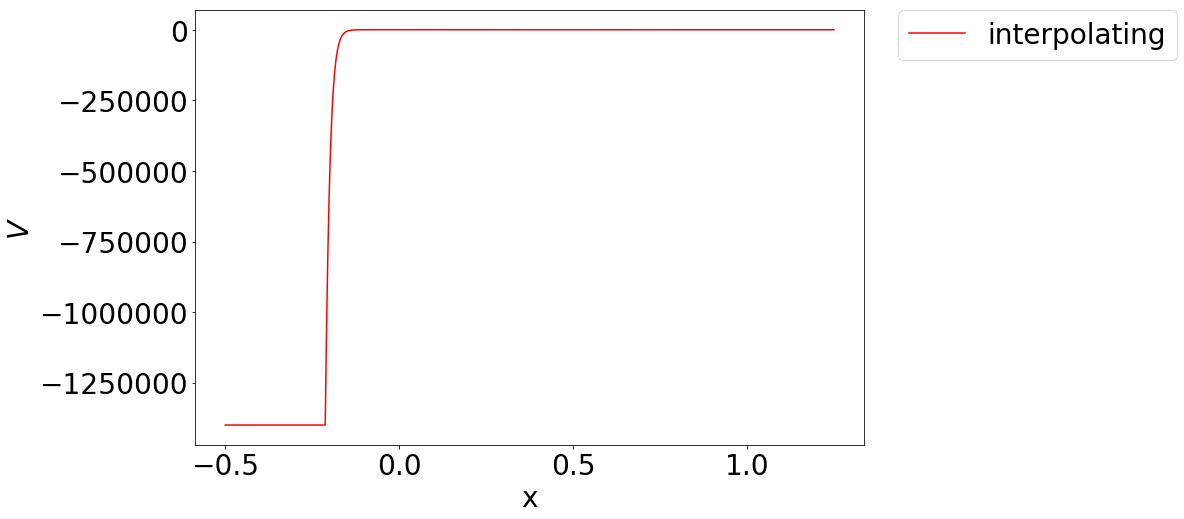

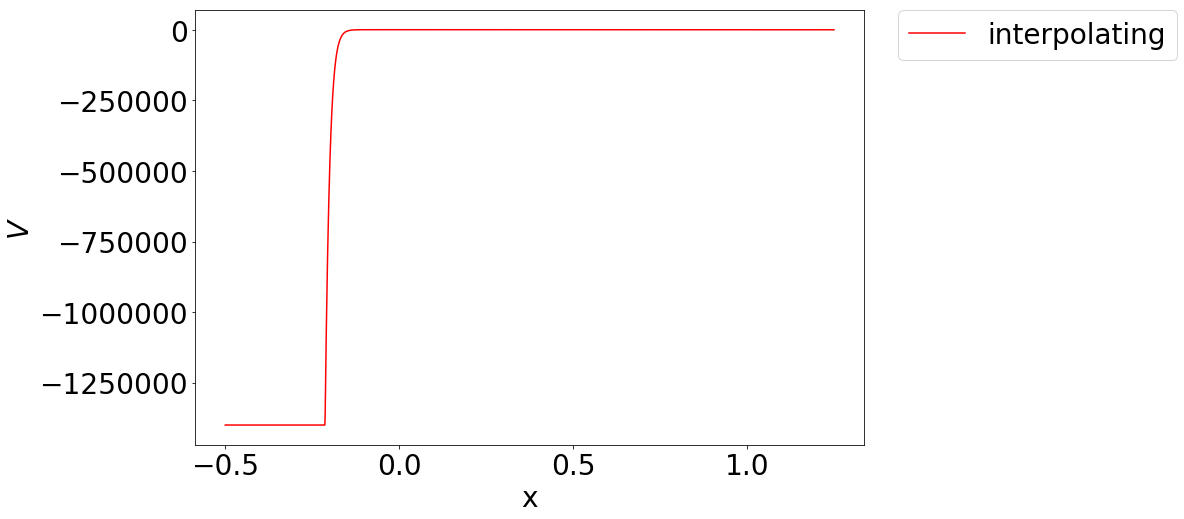

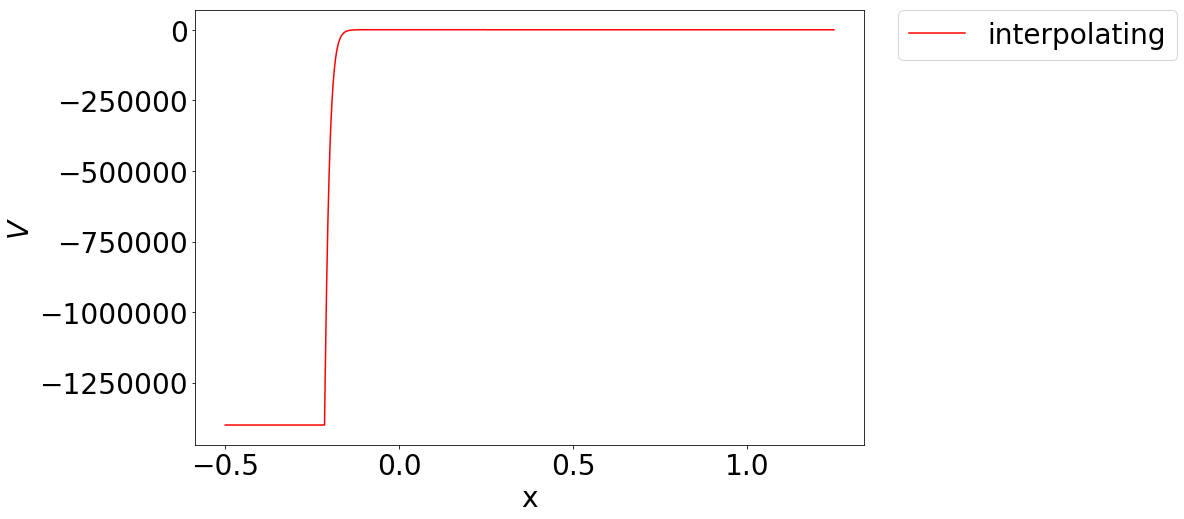

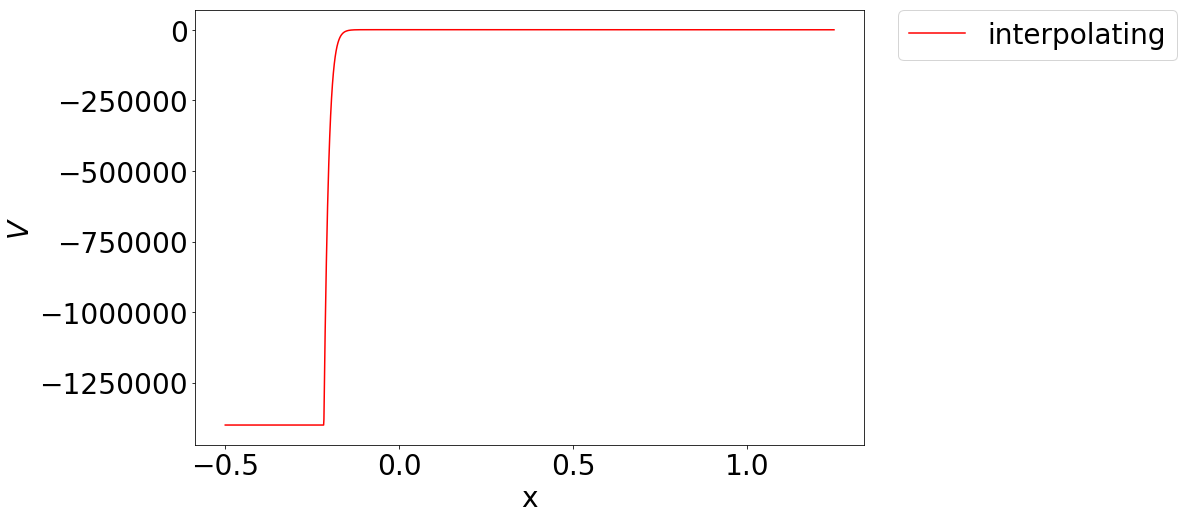

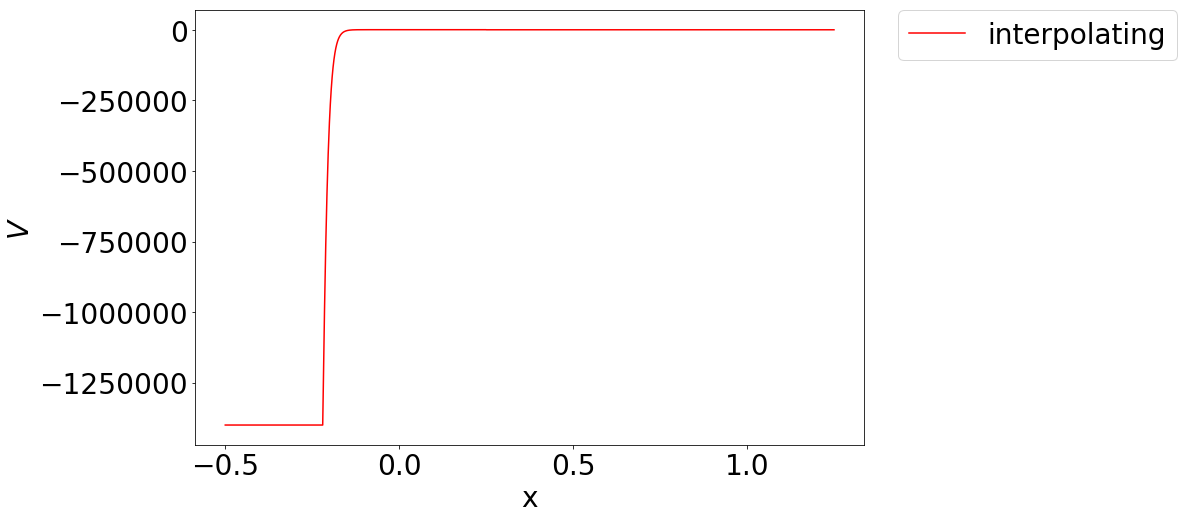

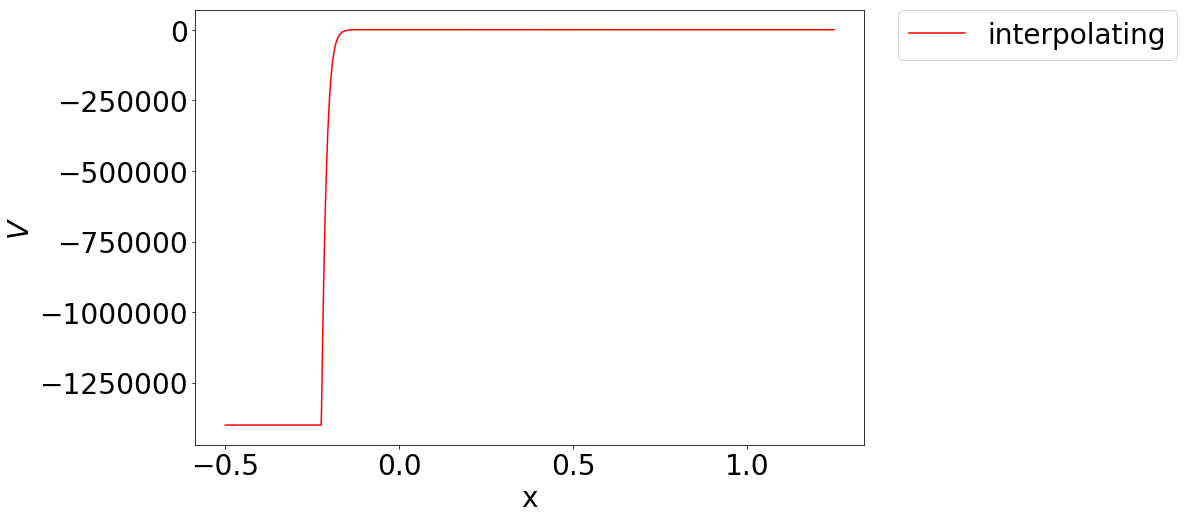

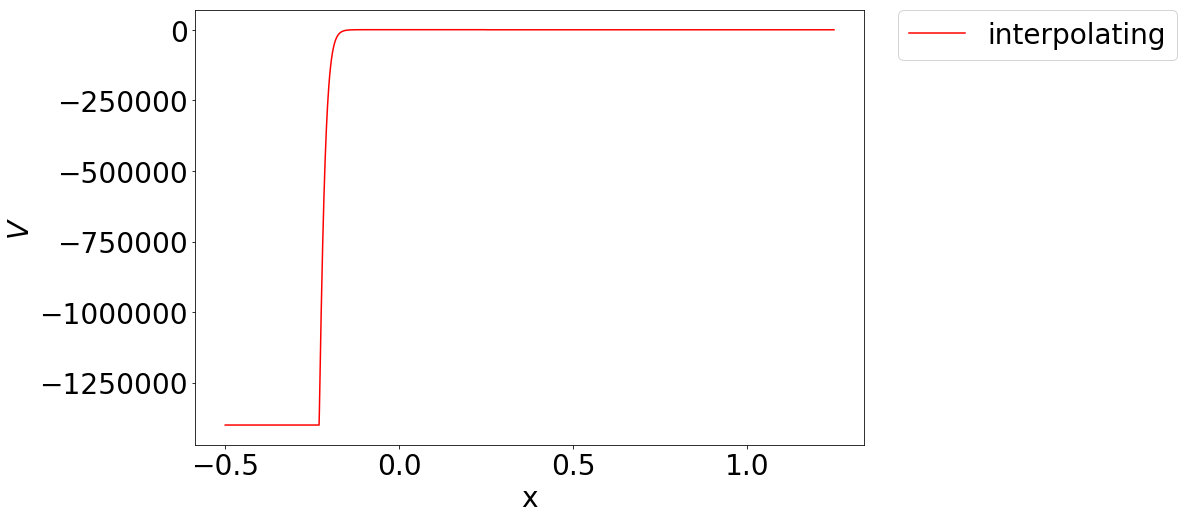

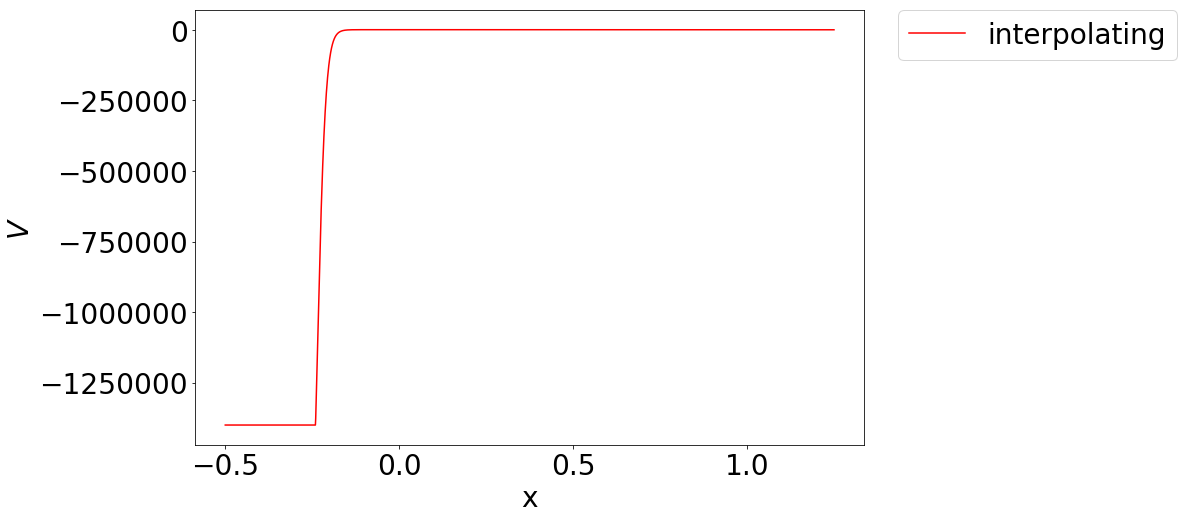

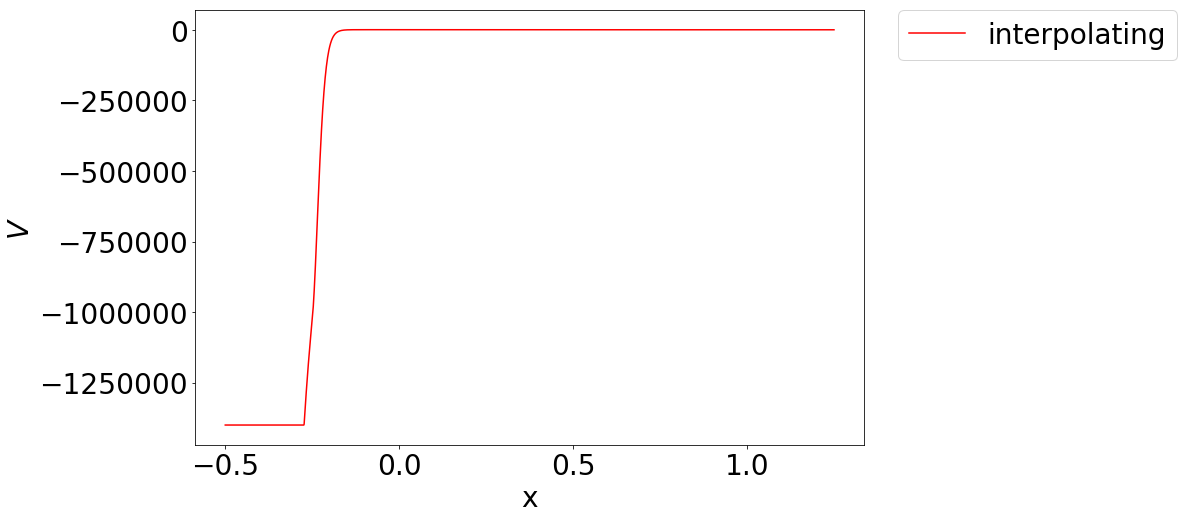

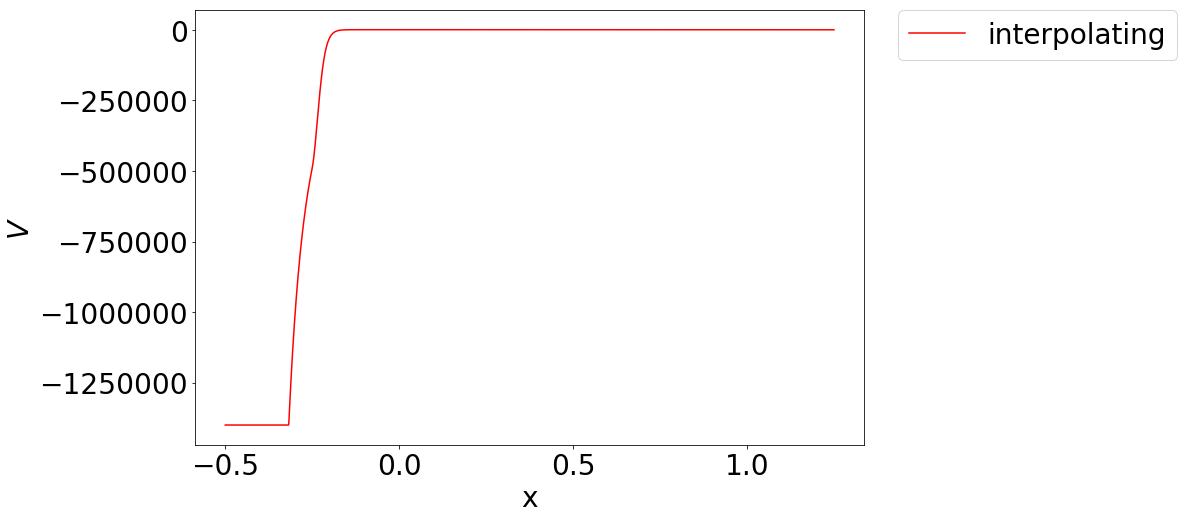

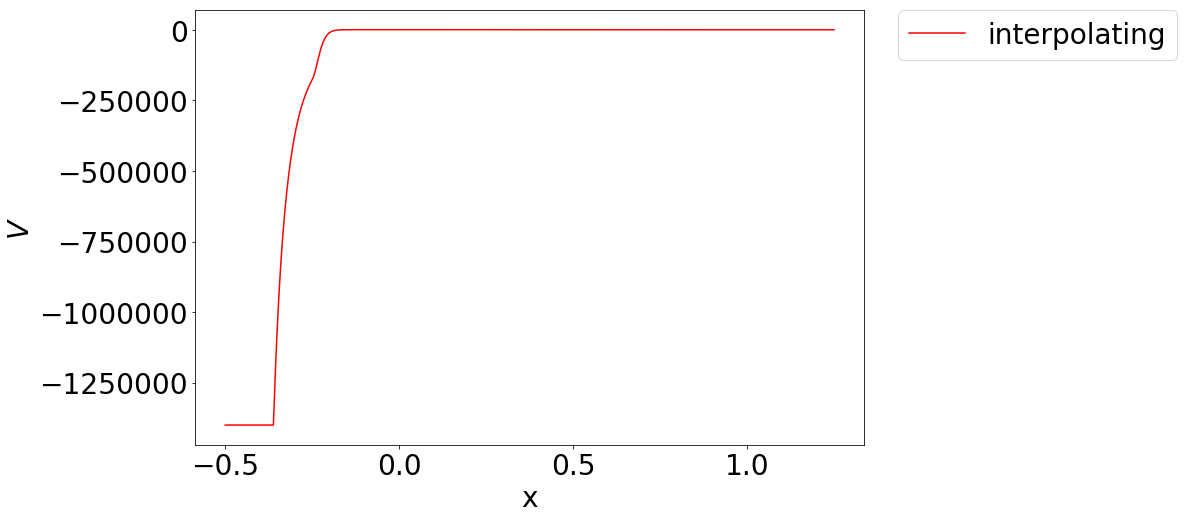

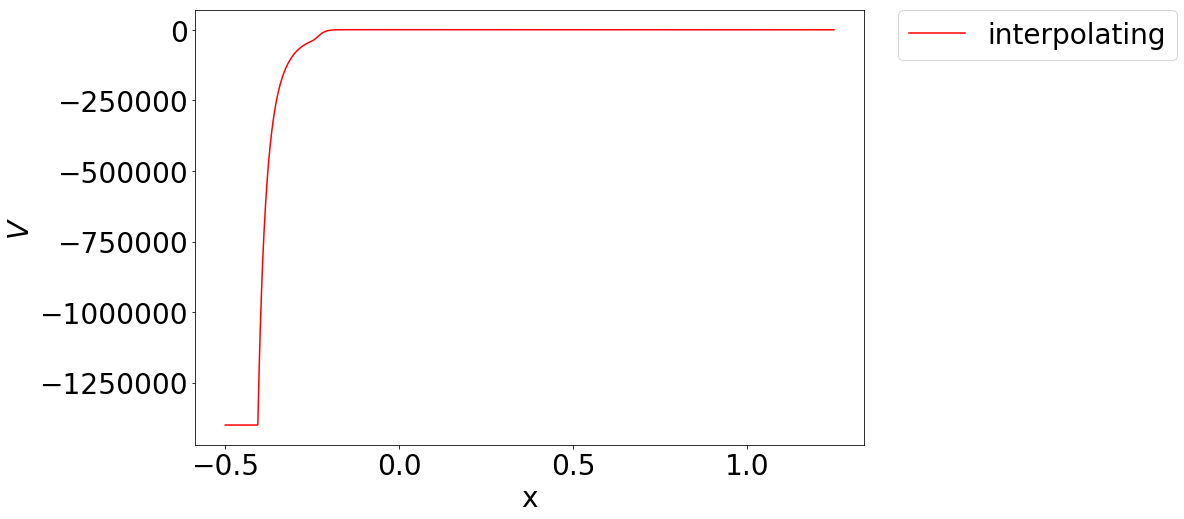

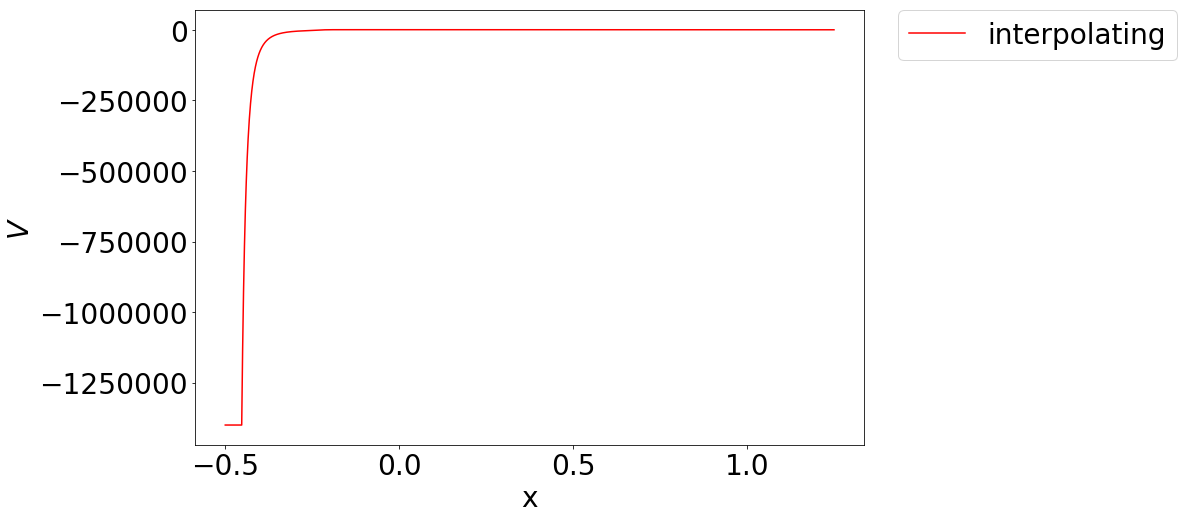

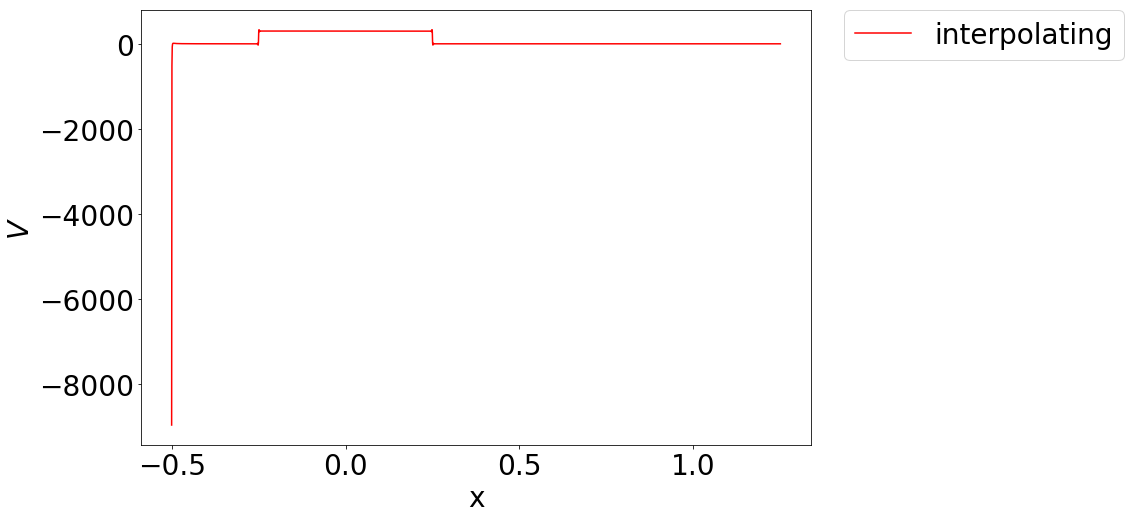

In [49]:
slices=40
for i in range(0,slices):
    #title("Interpolating function for the state density")
    ylabel(r"$V$")
    xlabel("x")
    #ylim([-500,500])
    #xlim([-0.7,0.7])
    plot(xvec,VR[int(i*(size(t)-1)/(slices-1)),:],label="interpolating",c='r')
    legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    show()

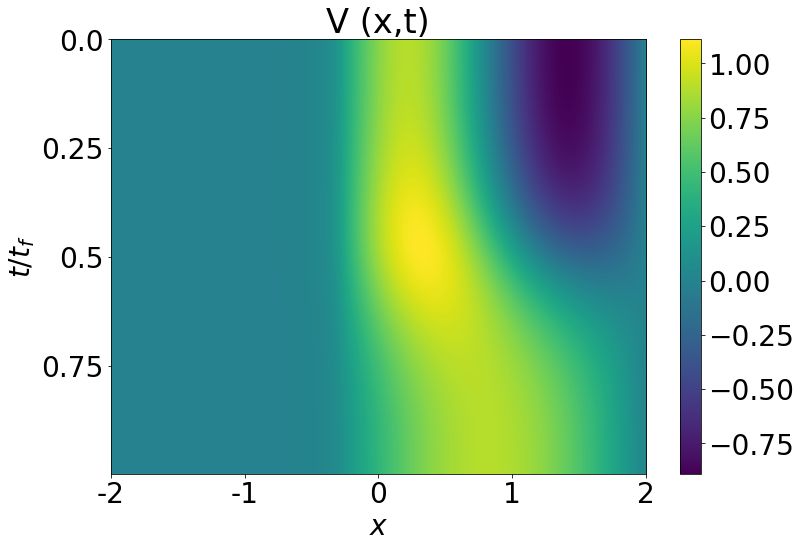

In [50]:
bounds=1
plt.imshow(rhoR[:,bounds:-bounds], interpolation='nearest', aspect='auto')
plt.title('V (x,t)')
plt.ylabel(r'$t/t_{f}$')
plt.xlabel(r'$x$') 
plt.xticks(arange(0,(shape(V)[1]-2*bounds+1),(shape(V)[1]-2*bounds)/4),arange(-2,4))
plt.yticks(arange(0,shape(V)[0],shape(V)[0]/4.0),linspace(0,1,5))
plt.colorbar()

plt.show()

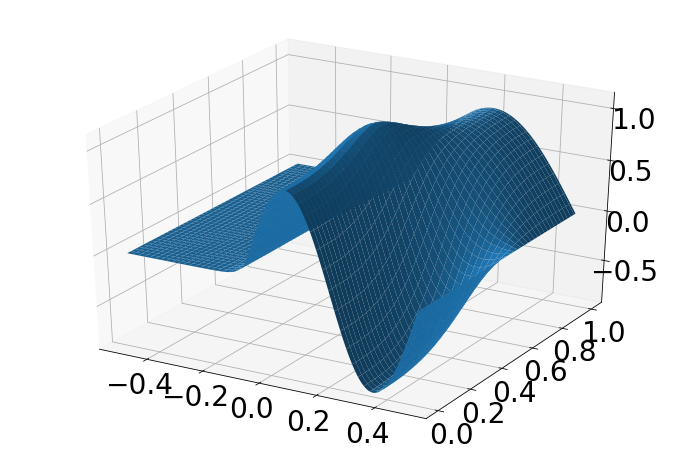

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X,Y= meshgrid(linspace(-0.5,0.5,shape(rhoR)[1]),linspace(0,1,shape(rhoR)[0]))
Z=rhoR


ax.plot_surface(X, Y, Z) 